#Importing all relevant libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Ignore Warnings

import warnings
warnings.filterwarnings("ignore")

#Reading the files

In [4]:
# 'application_data.csv' is stored in 'app_data'
app_data= pd.read_csv('application_data.csv')
app_data_raw = pd.read_csv('application_data.csv') # In case the original dataframe is required again
app_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002.0,1.0,Cash loans,M,N,Y,0.0,202500.0,406597.5,24700.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003.0,0.0,Cash loans,F,N,N,0.0,270000.0,1293502.5,35698.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004.0,0.0,Revolving loans,M,Y,Y,0.0,67500.0,135000.0,6750.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006.0,0.0,Cash loans,F,N,Y,0.0,135000.0,312682.5,29686.5,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007.0,0.0,Cash loans,M,N,Y,0.0,121500.0,513000.0,21865.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
# 'columns_description.csv' is stored in 'coldescr_data'
coldescr_data = pd.read_csv('columns_description.csv', encoding = "ISO-8859-1")
coldescr_data.head()

,Unnamed: 0,Table,Row,Description,Special
0,1,application_data,SK_ID_CURR,ID of loan in our sample,NaN
1,2,application_data,TARGET,Target variable (1 - client with payment diffi...,NaN
2,5,application_data,NAME_CONTRACT_TYPE,Identification if loan is cash or revolving,NaN
3,6,application_data,CODE_GENDER,Gender of the client,NaN
4,7,application_data,FLAG_OWN_CAR,Flag if the client owns a car,NaN


In [6]:
# 'previous_application.csv' is stored in 'prev_data'
prev_data = pd.read_csv('previous_application.csv')
prev_data.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495.0,271877.0,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15.0,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425.0,108129.0,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11.0,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466.0,122040.0,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11.0,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243.0,176158.0,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7.0,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265.0,202054.0,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9.0,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


# Analysing 'application_data.csv'

## Data Cleaning

In [23]:
# Checking number of columns and rows
print(app_data.shape)

(307511, 122)


### Handling missing data

#### Columns with majority null values

In [24]:
# Checking null values in each column
app_data.isnull().sum()

SK_ID_CURR                        0
TARGET                            0
NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
                              ...  
AMT_REQ_CREDIT_BUREAU_DAY     41519
AMT_REQ_CREDIT_BUREAU_WEEK    41519
AMT_REQ_CREDIT_BUREAU_MON     41519
AMT_REQ_CREDIT_BUREAU_QRT     41519
AMT_REQ_CREDIT_BUREAU_YEAR    41519
Length: 122, dtype: int64

There are too many columns. So let's check for columns that have null values greater then 50% of data

In [25]:
# 'perc_null_appdata' stores the percentage of null values in each column where the null values are >50% of the data

perc_null_appdata = app_data.isnull().sum()*100/len(app_data)
perc_null_appdata[perc_null_appdata>50]

OWN_CAR_AGE                 65.990810
EXT_SOURCE_1                56.381073
APARTMENTS_AVG              50.749729
BASEMENTAREA_AVG            58.515956
YEARS_BUILD_AVG             66.497784
COMMONAREA_AVG              69.872297
ELEVATORS_AVG               53.295980
ENTRANCES_AVG               50.348768
FLOORSMIN_AVG               67.848630
LANDAREA_AVG                59.376738
LIVINGAPARTMENTS_AVG        68.354953
LIVINGAREA_AVG              50.193326
NONLIVINGAPARTMENTS_AVG     69.432963
NONLIVINGAREA_AVG           55.179164
APARTMENTS_MODE             50.749729
BASEMENTAREA_MODE           58.515956
YEARS_BUILD_MODE            66.497784
COMMONAREA_MODE             69.872297
ELEVATORS_MODE              53.295980
ENTRANCES_MODE              50.348768
FLOORSMIN_MODE              67.848630
LANDAREA_MODE               59.376738
LIVINGAPARTMENTS_MODE       68.354953
LIVINGAREA_MODE             50.193326
NONLIVINGAPARTMENTS_MODE    69.432963
NONLIVINGAREA_MODE          55.179164
APARTMENTS_M

It is observed and noted here that most of this data pertains to housing information and can be dropped since >50% data is missing

This is still difficult to analyse

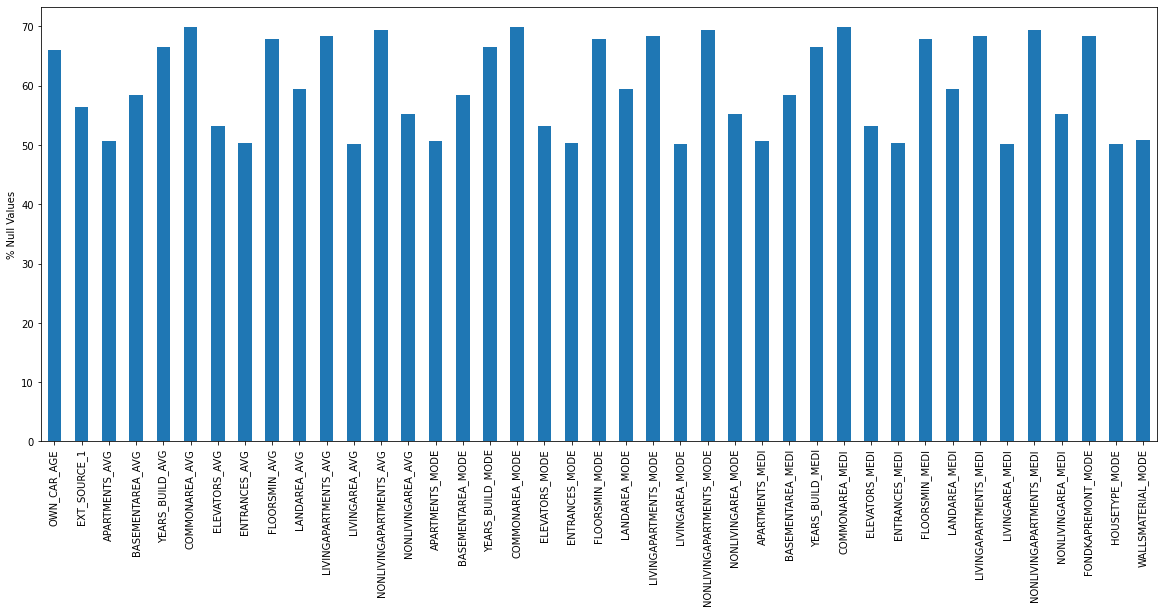

In [26]:
# Plotting a bar plot
plt.figure(figsize=[20,8])
perc_null_appdata[perc_null_appdata>50].plot.bar()
plt.ylabel('% Null Values')
plt.show()

I will not drop any columns right now

#### Columns with very few null values

Check for columns that have less than 5% missing data and store in variable 'less_missing_appdata'

In [27]:
# 'less_missing_appdata' stores the columns and the percentage of null values they have only for those columns that have less than 5% null data

less_missing_appdata = perc_null_appdata[(perc_null_appdata>0) & (perc_null_appdata<=5)]
less_missing_appdata

AMT_ANNUITY                 0.003902
AMT_GOODS_PRICE             0.090403
NAME_TYPE_SUITE             0.420148
CNT_FAM_MEMBERS             0.000650
EXT_SOURCE_2                0.214626
OBS_30_CNT_SOCIAL_CIRCLE    0.332021
DEF_30_CNT_SOCIAL_CIRCLE    0.332021
OBS_60_CNT_SOCIAL_CIRCLE    0.332021
DEF_60_CNT_SOCIAL_CIRCLE    0.332021
DAYS_LAST_PHONE_CHANGE      0.000325
dtype: float64

The columns in the above cell have missing values for less than 0.5% of the data


In [28]:
# Numulative rows which have missing data for any of the columns in "less_missing_appdata"

app_data.isnull().sum(axis=1)[app_data[less_missing_appdata.index].isnull().sum(axis=1)>0] 
# I am checking for all rows in app_data[less_missing_appdata.index] that have even one of the column value as null

64         5
68         5
329       56
349       27
394       11
          ..
306636    49
306725    33
307029    49
307387    11
307402    54
Length: 2980, dtype: int64

In [29]:
# Only 2980 records fit in this criteria. I will check what is the percentage of 2980 to the total number of records we have in application data
2980*100/len(app_data)

0.9690710251015411

Since this data is less than 1% of the entire dataframe, I will drop these rows

In [30]:
# Dropping the rows

for col in less_missing_appdata.index:
  app_data = app_data[~app_data[col].isnull()]

### Cleaning the data based on the datatype of the columns

I will now analyse what are the data types and distribution of the same among the columns

In [31]:
# Distribution of datatypes among the columns
app_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 304531 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 285.8+ MB


There are columns with int, float and object data types and the distribution is as follows - 
1. Object - 16
2. Int - 41
3. Float - 65

#### 1. Analysing columns with object datatype

Now I will check for data cleanliness in columns with object data type to see the following points like - 

1.   Inconsistencies in categorical values in each columns(Eg- Spelling errors, )
2.   Data type misrepresentation(Eg- Float values is shown as object because of ",")



##### Analysing all Object datatype columns using a loop



There are 16 columns with object data type
Running a for-loop to study the data entered under each column having 'object' data type

In [32]:
# For-Loop to check all 'object' datatype columns

for col in range(0,len(app_data.columns)):
  if app_data.iloc[:, col].dtype=='object':
    print(app_data.iloc[:, col].value_counts().sort_values(ascending=False)) # Sorting the values for easy reading
    print("-"*20)

Cash loans         276613
Revolving loans     27918
Name: NAME_CONTRACT_TYPE, dtype: int64
--------------------
F      200482
M      104045
XNA         4
Name: CODE_GENDER, dtype: int64
--------------------
N    200910
Y    103621
Name: FLAG_OWN_CAR, dtype: int64
--------------------
Y    211641
N     92890
Name: FLAG_OWN_REALTY, dtype: int64
--------------------
Unaccompanied      247112
Family              39969
Spouse, partner     11313
Children             3249
Other_B              1757
Other_A               864
Group of people       267
Name: NAME_TYPE_SUITE, dtype: int64
--------------------
Working                 157341
Commercial associate     70794
Pensioner                54841
State servant            21504
Unemployed                  19
Student                     17
Businessman                 10
Maternity leave              5
Name: NAME_INCOME_TYPE, dtype: int64
--------------------
Secondary / secondary special    216582
Higher education                  73821
Incomplet

**My Observations -**
1. There are no repeated values in any column due to spelling errors or any other reasons
2. All the colums are categorical and none are of the datatype object due to error in representing float or int data
3. Missing values are mentioned as 'XNA' in 2 cases - CODE_GENDER and ORGANIZATION_TYPE. 

I will not be dropping the CODE_GENDER missing value rows because I am not yet sure of the impact/relevance of gender on the target variable. 
I will also not drop the ORGANIZATION_TYPE missing value rows because they form >15% of all the rows in the dataframe and dropping them may affect the overall analysis

#### 2. Analysing columns with Int datatype

##### Analysing all Int datatype columns using a loop

In [33]:
# For-Loop to check all 'int' datatype columns

int_cols = [] # int_cols_str stores the names of all columns with int data type

for col in app_data.columns:
  if app_data.loc[:, col].dtype=='int64':
    int_cols.append(col)
    print(app_data.loc[:, col].value_counts().sort_values(ascending=False)) # Sorting the values for easy reading
    print("-"*20)

print(int_cols)

100002    1
100004    1
100007    1
100008    1
100009    1
         ..
456247    1
456238    1
456237    1
456236    1
456255    1
Name: SK_ID_CURR, Length: 304531, dtype: int64
--------------------
0    279864
1     24667
Name: TARGET, dtype: int64
--------------------
0     213277
1      60520
2      26502
3       3680
4        426
5         84
6         21
7          7
14         3
8          2
9          2
12         2
10         2
19         2
11         1
Name: CNT_CHILDREN, dtype: int64
--------------------
-13481    42
-13749    42
-10020    41
-18248    41
-15771    40
          ..
-24919     1
-25135     1
-24972     1
-24252     1
-25061     1
Name: DAYS_BIRTH, Length: 17458, dtype: int64
--------------------
 365243    54852
-200         154
-224         149
-199         149
-230         147
           ...  
-9935          1
-13812         1
-16554         1
-15084         1
-8694          1
Name: DAYS_EMPLOYED, Length: 12556, dtype: int64
--------------------
-4053    168

Observations - 3 types of data here
1. Flags - These columns are categorical having values as either 1 or 0 to denote yes or no
2. Unique ID - each applicant will have a unique ID
3. Continuous data - Numerical data Like count of days and ordered numeric categories like ratings etc

I will be doing outlier analysis only on the continuous data. 

I will identify the flags by the count of unique values they can have i.e 1 or 0, hence less than 2. I will be omitting the only unique ID there is in this dataframe i.e, SK_ID_CURR. 

###### Analysing Flags

In [34]:
# For-Loop to check all 'int' datatype columns of FLAG type

flag_cols = [] # flag cols_str stores the names of all int data type columns that are classified as flags

for col in app_data.columns:
  if (app_data.loc[:, col].dtype=='int64') & (len(app_data.loc[:, col].value_counts())<=2):
    flag_cols.append(str(col))
    print(app_data.loc[:, col].value_counts().sort_values(ascending=False)) # Sorting the values for ease of viewing
    print("-"*20)

print(flag_cols)

0    279864
1     24667
Name: TARGET, dtype: int64
--------------------
1    304531
Name: FLAG_MOBIL, dtype: int64
--------------------
1    249667
0     54864
Name: FLAG_EMP_PHONE, dtype: int64
--------------------
0    243707
1     60824
Name: FLAG_WORK_PHONE, dtype: int64
--------------------
1    303965
0       566
Name: FLAG_CONT_MOBILE, dtype: int64
--------------------
0    218873
1     85658
Name: FLAG_PHONE, dtype: int64
--------------------
0    287209
1     17322
Name: FLAG_EMAIL, dtype: int64
--------------------
0    299916
1      4615
Name: REG_REGION_NOT_LIVE_REGION, dtype: int64
--------------------
0    289099
1     15432
Name: REG_REGION_NOT_WORK_REGION, dtype: int64
--------------------
0    292192
1     12339
Name: LIVE_REGION_NOT_WORK_REGION, dtype: int64
--------------------
0    280713
1     23818
Name: REG_CITY_NOT_LIVE_CITY, dtype: int64
--------------------
0    234297
1     70234
Name: REG_CITY_NOT_WORK_CITY, dtype: int64
--------------------
0    249804
1   

As observed in the output, there are 33 such columns[Flags]

So the count of each type of column becomes - 
1. Flags - 33
2. Unique ID - 1
3. Continuous data - 7 (41-(33+1))

###### Analysing Continuous data


In [35]:
# The columns with continuous data are as follows (defined by variable cont_cols)

cont_cols = list(app_data.loc[:, set.difference(set(int_cols), set(flag_cols))].columns)

In [36]:
# Remove 'SK_ID_CURR' from the list
cont_cols.remove('SK_ID_CURR')
cont_cols

['REGION_RATING_CLIENT_W_CITY',
 'CNT_CHILDREN',
 'HOUR_APPR_PROCESS_START',
 'DAYS_ID_PUBLISH',
 'DAYS_BIRTH',
 'REGION_RATING_CLIENT',
 'DAYS_EMPLOYED']

2    227282
3     43543
1     33706
Name: REGION_RATING_CLIENT_W_CITY, dtype: int64
--------------------
0     213277
1      60520
2      26502
3       3680
4        426
5         84
6         21
7          7
14         3
8          2
9          2
12         2
10         2
19         2
11         1
Name: CNT_CHILDREN, dtype: int64
--------------------
10    37398
11    36885
12    33879
13    30670
14    27390
9     27149
15    24570
16    20157
8     15002
17    14708
7      9063
18     8946
6      5805
19     3808
5      3607
4      2067
3      1217
20     1188
21      404
2       301
22      150
1        86
23       41
0        40
Name: HOUR_APPR_PROCESS_START, dtype: int64
--------------------
-4053    168
-4046    161
-4095    159
-4256    157
-4032    156
        ... 
-5847      1
-6061      1
-6086      1
-6133      1
-6211      1
Name: DAYS_ID_PUBLISH, Length: 6167, dtype: int64
--------------------
-13481    42
-13749    42
-10020    41
-18248    41
-15771    40
          ..
-

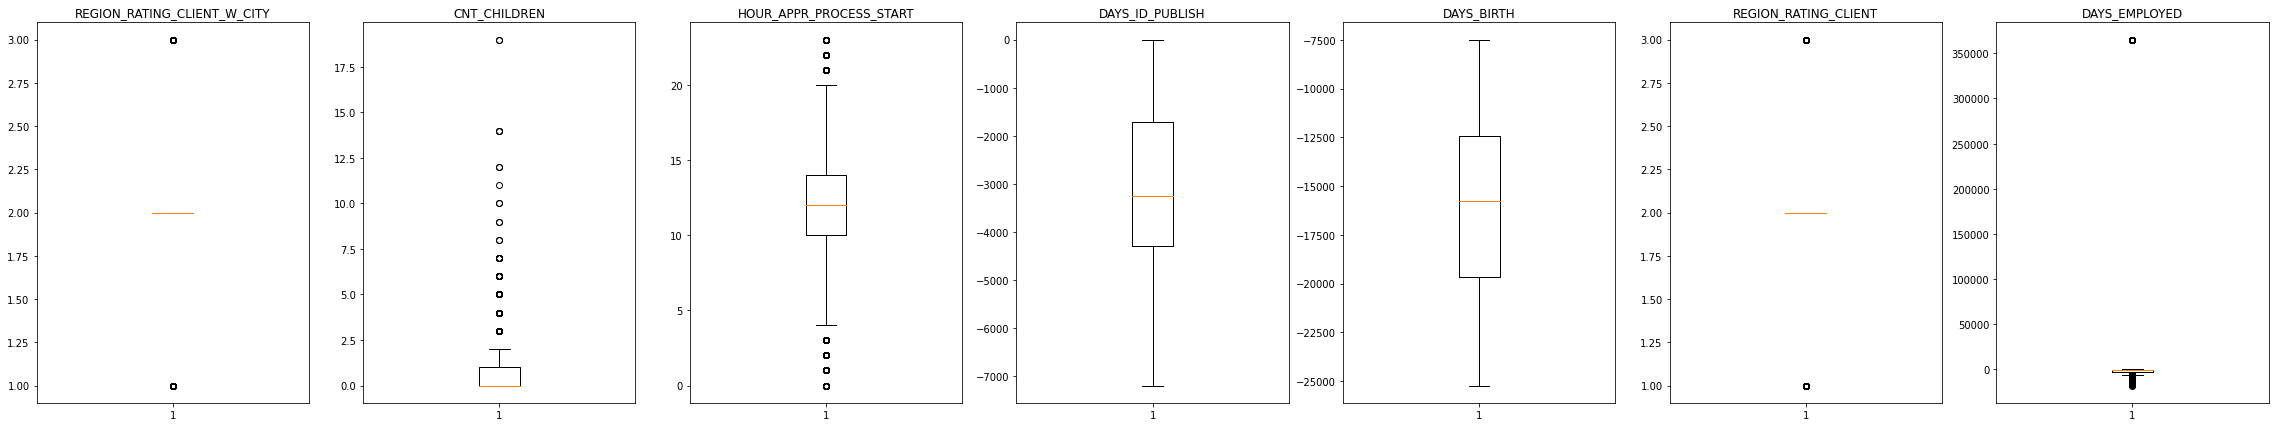

In [37]:
# Analysing cont_cols using For-Loop
plt.figure(figsize=[40,7])

for i, col in enumerate(cont_cols):
  print(app_data[col].value_counts().sort_values(ascending=False))
  plt.subplot(1,7,i+1)
  plt.boxplot(app_data[col])
  plt.title(label=col)
  print('-'*20)

plt.show()

In [38]:
# Converting the DAYS_EMPLOYED and DAYS_BIRTH units to years
app_data['YEARS_EMPLOYED'] = app_data.DAYS_EMPLOYED.apply(lambda x: -x//365)
app_data['YEARS_BIRTH'] = app_data.DAYS_BIRTH.apply(lambda x: -x//365)

In [39]:
# Drop the columns 'DAYS_EMPLOYED' and 'DAYS_BIRTH' as relevant information is stored in 'YEARS_EMPLOYED' and 'YEARS_BIRTH'

app_data = app_data.drop(['DAYS_BIRTH', 'DAYS_EMPLOYED'], axis=1)
app_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 304531 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to YEARS_BIRTH
dtypes: float64(65), int64(41), object(16)
memory usage: 285.8+ MB


In [40]:
# I could see an outlier in the box plot of DAYS_EMPLOYED and will check again with the YEARS_EMPLOYED column
app_data.YEARS_EMPLOYED.value_counts()

-1001    54852
 1       31516
 2       29340
 0       27564
 3       24870
 4       21544
 5       16129
 6       14909
 7       13044
 8       11345
 9        8904
 10       7304
 11       5836
 12       5260
 14       4591
 13       4301
 15       2696
 16       2314
 17       1989
 18       1901
 19       1860
 20       1584
 21       1454
 22       1242
 23       1007
 24        906
 25        813
 27        651
 26        648
 28        607
 29        565
 30        456
 31        435
 34        360
 32        349
 33        330
 35        255
 36        194
 37        138
 39        124
 38        114
 40         58
 41         58
 42         42
 44         30
 43         18
 45         14
 48          4
 46          4
 47          1
 49          1
Name: YEARS_EMPLOYED, dtype: int64

In [41]:
print(app_data.YEARS_EMPLOYED.dtype)
print(app_data.YEARS_BIRTH.dtype)

int64
int64


I can see that Around 18% of the applicants have been employed for nearly 1000 years which is logically impossible.
Hence, I will be replacing this value(1000 Years) in YEARS_EMPLOYED column with NAN

In [42]:
# Replace '-1001' with np.nan
app_data.YEARS_EMPLOYED = app_data.YEARS_EMPLOYED.apply(lambda x: np.nan if x==-1001 else x)

In [43]:
app_data.YEARS_BIRTH.value_counts(normalize=True)*100

38    2.884764
37    2.860464
39    2.850941
40    2.805297
36    2.802342
27    2.749145
41    2.746190
31    2.722876
43    2.704158
42    2.675918
28    2.590212
32    2.576092
44    2.541613
35    2.537673
30    2.536688
33    2.513045
29    2.493014
34    2.482834
54    2.454594
53    2.428324
46    2.372829
45    2.346888
47    2.284168
48    2.280884
56    2.219478
52    2.205030
57    2.204702
51    2.177118
59    2.160043
49    2.158073
55    2.154789
50    2.106190
58    2.039858
60    2.025738
62    1.792921
61    1.762711
63    1.686856
64    1.663213
26    1.477025
25    1.352243
23    1.316451
24    1.264896
65    1.012376
22    0.951627
66    0.680719
67    0.665614
21    0.396676
68    0.279446
69    0.004926
20    0.000328
Name: YEARS_BIRTH, dtype: float64

In the CNT_CHILDREN (Count of children of loan applicant) column I identified some extreme outliers

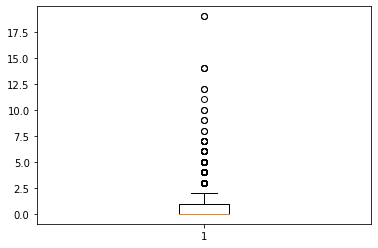

In [44]:
# Plotting a boxplot 
plt.boxplot(app_data.CNT_CHILDREN)
plt.show()

In [45]:
# I will get a more clear idea with absolute values in numerics

print(app_data.CNT_CHILDREN.value_counts())
print(app_data.CNT_CHILDREN.value_counts(normalize=True)*100)

0     213277
1      60520
2      26502
3       3680
4        426
5         84
6         21
7          7
14         3
8          2
9          2
12         2
10         2
19         2
11         1
Name: CNT_CHILDREN, dtype: int64
0     70.034578
1     19.873182
2      8.702562
3      1.208416
4      0.139887
5      0.027583
6      0.006896
7      0.002299
14     0.000985
8      0.000657
9      0.000657
12     0.000657
10     0.000657
19     0.000657
11     0.000328
Name: CNT_CHILDREN, dtype: float64


Age of applicant vs. Count of children

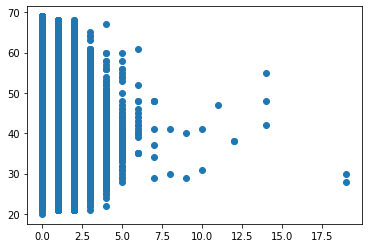

In [46]:
# Scatter plot for CNT_CHILDREN vs. YEAR_BIRTH (age)

plt.scatter(data = app_data, x='CNT_CHILDREN', y='YEARS_BIRTH')

In [47]:
# Percentage of applicants who have more than 4 children

app_data.CNT_CHILDREN[app_data.CNT_CHILDREN>4].value_counts().sum()/len(app_data)*100

0.041375098101671094

There is no corelation between the age of the applicant and the number of children. They also constitute a small part of the entire data(0.04%). Hence, drop all rows with children>4 as this does not reflect the typical family size of a household


In [48]:
# Dropping the rows

app_data = app_data[app_data.CNT_CHILDREN<5]
app_data.CNT_CHILDREN.value_counts()

0    213277
1     60520
2     26502
3      3680
4       426
Name: CNT_CHILDREN, dtype: int64

#### 3. Analysing columns with Float datatype

##### Analysing all Float datatype columns using a loop

There are 66 Columns with data type as float

In [49]:
flt_cols = [] # flt_cols stores the names of all columns with float data type

for col in app_data.columns:
  if app_data.loc[:, col].dtype=='float64':
    flt_cols.append(col)
    print(app_data.loc[:, col].value_counts().sort_values(ascending=False)) # Sorting the values for easy reading
    print("-"*20)

print(flt_cols)

135000.0    35407
112500.0    30680
157500.0    26329
180000.0    24493
90000.0     22225
            ...  
186151.5        1
39339.0         1
130342.5        1
56902.5         1
113062.5        1
Name: AMT_INCOME_TOTAL, Length: 2510, dtype: int64
--------------------
450000.0     9595
675000.0     8786
225000.0     8068
180000.0     7118
270000.0     7008
             ... 
796140.0        1
953919.0        1
705559.5        1
622939.5        1
1391130.0       1
Name: AMT_CREDIT, Length: 5585, dtype: int64
--------------------
9000.0     6165
13500.0    5287
6750.0     2182
10125.0    1938
37800.0    1602
           ... 
68107.5       1
53352.0       1
50287.5       1
61974.0       1
77809.5       1
Name: AMT_ANNUITY, Length: 13652, dtype: int64
--------------------
450000.0    25802
225000.0    25064
675000.0    24767
900000.0    15308
270000.0    11219
            ...  
942201.0        1
517050.0        1
178344.0        1
556794.0        1
743863.5        1
Name: AMT_GOODS_PRICE, L

##### Segregating columns into 2 parts(as listed) and analyse the 2nd part only
1. That have housing information
2. All other columns

Majority of the columns speak about the housing information of the applicant like apartment area, building area etc. 
I will store the column names of all such columns in 'flt_housing_cols'

In [50]:
# Using info from column description to filter the housing columns and store in 'all_housing_cols'

desc = 'Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor'
all_housing_cols = list(coldescr_data[coldescr_data['Description']==desc].Row)
len(all_housing_cols)


47

In [51]:
# 'flt_housing_cols' store column names of float columns containing housing info

flt_housing_cols = list(set.intersection(set(flt_cols), set(all_housing_cols)))
len(flt_housing_cols)

43

In [52]:
# 'flt_other_cols' store column names of float columns besides housing columns

flt_other_cols = list(set.difference(set(flt_cols), set(flt_housing_cols)))
len(flt_other_cols)

23

In [53]:
# Analysing columns defined in 'flt_other_cols'

for col in flt_other_cols:
  if app_data.loc[:, col].dtype=='float64':
    print(app_data.loc[:, col].value_counts().sort_values(ascending=False)) # Sorting the values for easy reading
    print("-"*20)

0.0    261707
1.0      1539
2.0        56
3.0         9
4.0         1
Name: AMT_REQ_CREDIT_BUREAU_HOUR, dtype: int64
--------------------
0.0    261838
1.0      1281
2.0       105
3.0        44
4.0        24
5.0         9
6.0         8
9.0         2
8.0         1
Name: AMT_REQ_CREDIT_BUREAU_DAY, dtype: int64
--------------------
0.0      162787
1.0       48469
2.0       29616
3.0       20175
4.0       14036
5.0        9498
6.0        6414
7.0        4354
8.0        2936
9.0        1989
10.0       1369
11.0        846
12.0        645
13.0        407
14.0        258
15.0        164
16.0        133
17.0         87
18.0         46
19.0         44
20.0         30
21.0         29
22.0         22
23.0         15
25.0         11
24.0         11
27.0          5
26.0          3
30.0          2
28.0          1
29.0          1
47.0          1
348.0         1
Name: OBS_30_CNT_SOCIAL_CIRCLE, dtype: int64
--------------------
0.285898    716
0.262258    416
0.265256    341
0.159679    320
0.265312   

## Top 10 Correlation

Segregate app_data into app_data_1 and app_data_0

1. app_data_1: application data onlt containing rows for which TARGET=1
2. app_data_0: application data onlt containing rows for which TARGET=0

In [54]:
app_data_1 = app_data[app_data.TARGET==1]
app_data_0 = app_data[app_data.TARGET==0]

In [55]:
# Top 10 correlations for Defaulters

app_data_1_corr = app_data_1.corr().unstack()
app_data_1_corr.sort_values(ascending=False).drop_duplicates().head(11)

SK_ID_CURR                SK_ID_CURR                  1.000000
OBS_30_CNT_SOCIAL_CIRCLE  OBS_60_CNT_SOCIAL_CIRCLE    0.998286
BASEMENTAREA_MEDI         BASEMENTAREA_AVG            0.998205
YEARS_BUILD_MEDI          YEARS_BUILD_AVG             0.998087
COMMONAREA_MEDI           COMMONAREA_AVG              0.998083
NONLIVINGAPARTMENTS_AVG   NONLIVINGAPARTMENTS_MEDI    0.998053
FLOORSMIN_AVG             FLOORSMIN_MEDI              0.997810
LIVINGAPARTMENTS_AVG      LIVINGAPARTMENTS_MEDI       0.997638
FLOORSMAX_MEDI            FLOORSMAX_AVG               0.997189
NONLIVINGAPARTMENTS_MODE  NONLIVINGAPARTMENTS_MEDI    0.997003
ENTRANCES_MEDI            ENTRANCES_AVG               0.996670
dtype: float64

In [56]:
# Top 10 correlations for Non-Defaulters

app_data_0_corr = app_data_0.corr().unstack()
app_data_0_corr.sort_values(ascending=False).drop_duplicates().head(11)

SK_ID_CURR                SK_ID_CURR                  1.000000
YEARS_BUILD_AVG           YEARS_BUILD_MEDI            0.998519
OBS_60_CNT_SOCIAL_CIRCLE  OBS_30_CNT_SOCIAL_CIRCLE    0.998514
FLOORSMIN_AVG             FLOORSMIN_MEDI              0.997215
FLOORSMAX_MEDI            FLOORSMAX_AVG               0.997033
ENTRANCES_AVG             ENTRANCES_MEDI              0.996910
ELEVATORS_AVG             ELEVATORS_MEDI              0.996182
COMMONAREA_MEDI           COMMONAREA_AVG              0.995840
LIVINGAREA_MEDI           LIVINGAREA_AVG              0.995578
APARTMENTS_AVG            APARTMENTS_MEDI             0.995152
BASEMENTAREA_AVG          BASEMENTAREA_MEDI           0.994039
dtype: float64

## Data Analysis

Since some columns were dropped and some were added I will check the didtribution of columns across multiple data types again

In [57]:
app_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 304405 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to YEARS_BIRTH
dtypes: float64(66), int64(40), object(16)
memory usage: 285.7+ MB


From the above study I have categorised the 122 columns in the following way - 

1. By Data types
  1. Object (16 Columns) 
  2. Int (40 Columns)
  3. Float (66 Columns)

2. By context
  1. Loan information - Amount, Downpayment etc (Unknown)
  1. Housing Info (47 Columns)
  2. Documents (20 Columns)
  3. Region Rating (6 Columns)
  4. Credit Bureau information (6 Columns)
  5. Social Circle information (4 Columns)
  6. External Source rating (3 Columns)
  7. Personal Information - flagged and non-flagged (Unknown)
  9. All other columns (Unknown)

But First I will see how the target variable (Loan Default - Yes or No) is distributed across the applicants


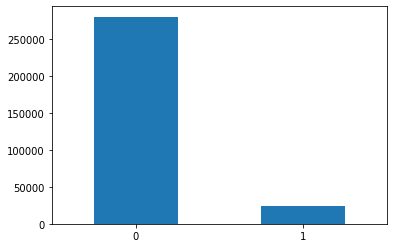

In [58]:
# Plotting a bar chart to visualise how many applicants have defaulted on the loan

app_data.TARGET.value_counts().plot.bar()
plt.xticks(rotation=0)
plt.show()

As seen, the data is extremely imbalanced. Few loan applicants have defaulted on their payments. I will find the imbalance ratio for this

In [59]:
print('Imbalance ratio for TARGET variable is - \n\nDefault : No-Default = ',round(app_data.TARGET.value_counts(normalize=True)[1]*100,2), ':',round(app_data.TARGET.value_counts(normalize=True)[0]*100,2))

Imbalance ratio for TARGET variable is - 

Default : No-Default =  8.1 : 91.9


Analysis based on the context-wise categories of data columns

### 1. Loan Information

Relevant columns are - 
1. AMT_CREDIT 
2. NAME_CONTRACT_TYPE
3. NAME_TYPE_SUITE
4. AMT_GOODS_PRICE
5. AMT_ANNUITY
6. WEEKDAY_APPR_PROCESS_START and HOUR_APPR_PROCESS_START

#### AMT_CREDIT

Distribution of loan amounts(AMT_CREDIT)

In [60]:
print(app_data.AMT_CREDIT.describe().div(1000))
print("(figures are in multiples of 1000's)")


count     304.405000
mean      599.579297
std       402.158632
min        45.000000
25%       270.000000
50%       517.419000
75%       808.650000
max      4050.000000
Name: AMT_CREDIT, dtype: float64
(figures are in multiples of 1000's)


Distribution using a distplot

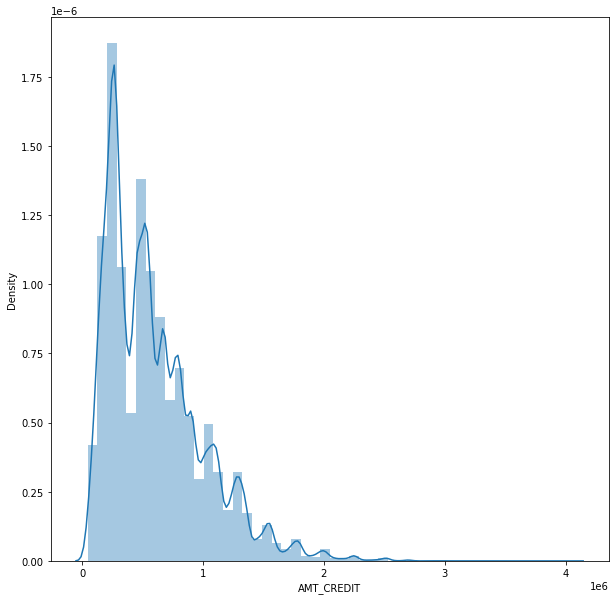

In [61]:
plt.figure(figsize=[10,10])
sns.distplot(app_data.AMT_CREDIT)
plt.show()

Most of the loans are for an amount between 45,000 and 100,000



Distribution using boxplot

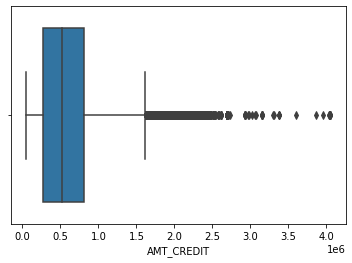

In [62]:
sns.boxplot(app_data.AMT_CREDIT)
plt.show()

Too many outliers. Looking at the 95%ile values

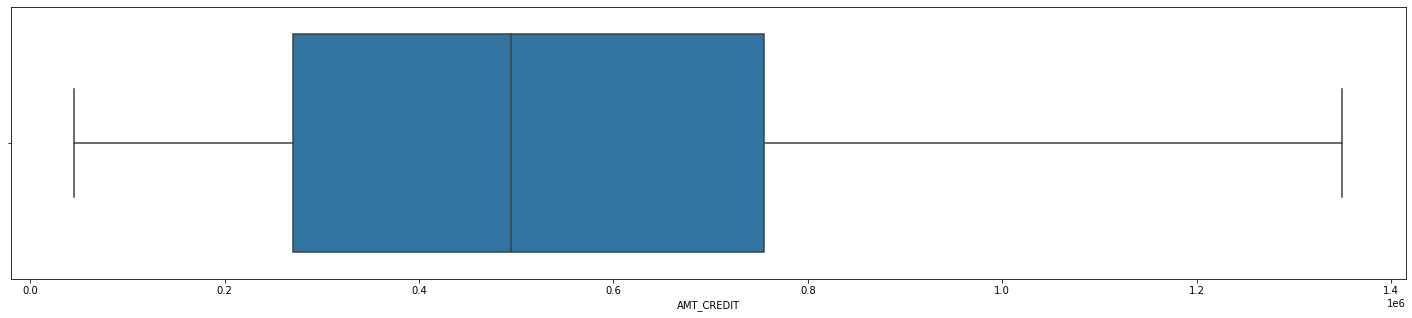

count     304.405000
mean      599.579297
std       402.158632
min        45.000000
25%       270.000000
50%       517.419000
75%       808.650000
max      4050.000000
Name: AMT_CREDIT, dtype: float64
0.95    1350.0
Name: AMT_CREDIT, dtype: float64


In [63]:
plt.figure(figsize=[25,5])
sns.boxplot(app_data.AMT_CREDIT[app_data.AMT_CREDIT < float(app_data.AMT_CREDIT.quantile([0.95]))])
plt.show()

print(app_data.AMT_CREDIT.describe().div(1000))
print(app_data.AMT_CREDIT.quantile([0.95])/1000)

Ther are no outliers below 95% ile

AMT_CREDIT vs TARGET

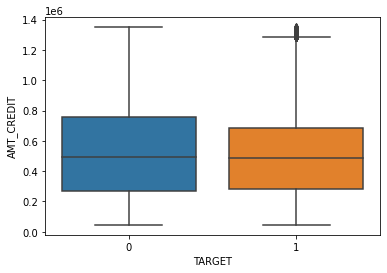

In [64]:
# Plotting the boxplot for AMT_CREDIT for each of the TARGET values
sns.boxplot(data=app_data[app_data.AMT_CREDIT < float(app_data.AMT_CREDIT.quantile([0.95]))], x='TARGET', y='AMT_CREDIT')

In [65]:
# function to find 75th percentile

def Percentile_75(x):
  return np.quantile(x, 0.75)

In [66]:
# Finding the mean, media and 75th percentile of AMT_CREDIT for TARGET values 0 and 1
app_data.groupby(['TARGET']).AMT_CREDIT.aggregate(['mean', 'median', Percentile_75]).astype(int)

,mean,median,Percentile_75
TARGET,,,
0,603197,518562,810000
1,558514,497520,735579


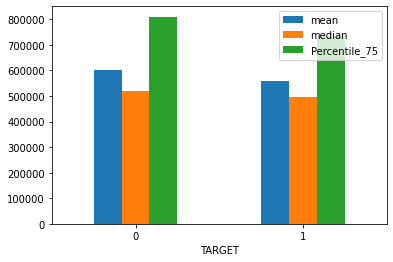

In [67]:
# Plotting the mean, media and 75th percentile of AMT_CREDIT for TARGET values 0 and 1
app_data.groupby(['TARGET']).AMT_CREDIT.aggregate(['mean', 'median', Percentile_75]).astype(int).plot.bar()
plt.xticks(rotation=0)
plt.show()

The mean/median of credit amounts is slightly (not significantly) lower for the group of applicants who have defaulted on their payments

#### NAME_CONTRACT_TYPE

Distribution of categorical values

In [68]:
app_data.NAME_CONTRACT_TYPE.value_counts(normalize=True).mul(100).sort_values()

Revolving loans     9.169035
Cash loans         90.830965
Name: NAME_CONTRACT_TYPE, dtype: float64

Observations - Most of the loans are Cash loans. Less than 10% are Revolving loans

NAME_CONTRACT_TYPE vs TARGET

In [69]:
print(app_data.groupby(['NAME_CONTRACT_TYPE']).TARGET.mean().mul(100))

NAME_CONTRACT_TYPE
Cash loans         8.357143
Revolving loans    5.531869
Name: TARGET, dtype: float64


Observations - Revolving loans have a lesser default rate of 5.5% as against the default rate of 8.35% for Cash loans

NAME_CONTRACT_TYPE vs AMT_CREDIT

In [70]:
app_data.groupby(['NAME_CONTRACT_TYPE']).AMT_CREDIT.aggregate(['mean', 'median', Percentile_75]).astype(int)

,mean,median,Percentile_75
NAME_CONTRACT_TYPE,,,
Cash loans,627815,540000,835380
Revolving loans,319859,270000,348750


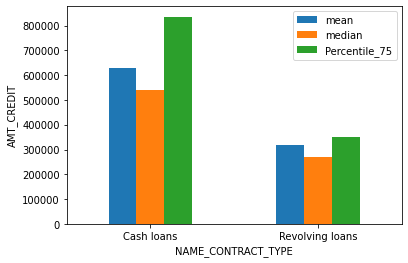

In [71]:
app_data.groupby(['NAME_CONTRACT_TYPE']).AMT_CREDIT.aggregate(['mean', 'median', Percentile_75]).astype(int).plot.bar()
plt.xticks(rotation=0)
plt.ylabel('AMT_CREDIT')
plt.show()

Observations - Cash loans have a higher Credit Amount than Revolving loans

#### AMT_GOODS_PRICE

In [72]:
# Value distribution

print(app_data.AMT_GOODS_PRICE.describe().div(1000))
print('Amounts are in multiples of 1000')

count     304.405000
mean      538.518780
std       369.068745
min        40.500000
25%       238.500000
50%       450.000000
75%       679.500000
max      4050.000000
Name: AMT_GOODS_PRICE, dtype: float64
Amounts are in multiples of 1000


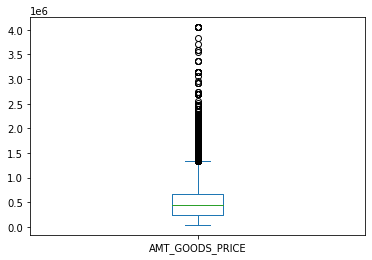

In [73]:
# Plotting a boxplot

app_data.AMT_GOODS_PRICE.plot.box()
plt.show()

Too many outliers. Taking values less than 95%

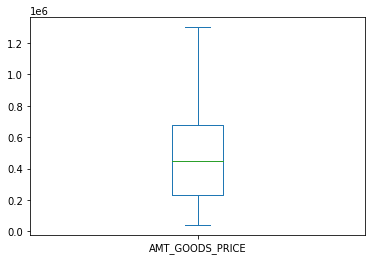

In [74]:
# Plotting a boxplot for AMT_GOODS_PRICE for values less than 95%-ile

app_data[app_data.AMT_GOODS_PRICE < np.quantile(app_data.AMT_GOODS_PRICE, 0.95)].AMT_GOODS_PRICE.plot.box()

##### AMT_GOODS_PRICE vs TARGET

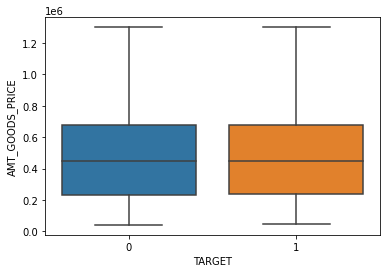

In [75]:
# plotting a boxplot for each of TARGET value 0/1

sns.boxplot(data=app_data[app_data.AMT_GOODS_PRICE < np.quantile(app_data.AMT_GOODS_PRICE, 0.95)], x='TARGET', y='AMT_GOODS_PRICE')
plt.show()

Observations - No visible difference

In [76]:
# checking the quantiles for both groups

app_data.groupby(['TARGET']).AMT_GOODS_PRICE.aggregate(['mean', 'median', Percentile_75])

,mean,median,Percentile_75
TARGET,,,
0,542849.779783,450000.0,688500.0
1,489368.059876,450000.0,675000.0


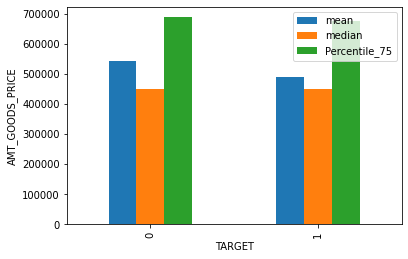

In [77]:
# Plotting a bar chart for the quantiles

app_data.groupby(['TARGET']).AMT_GOODS_PRICE.aggregate(['mean', 'median', Percentile_75]).plot.bar()
plt.ylabel('AMT_GOODS_PRICE')
plt.show()

Observations - The Values are similar

##### AMT_GOODS_PRICE vs AMT_CREDIT

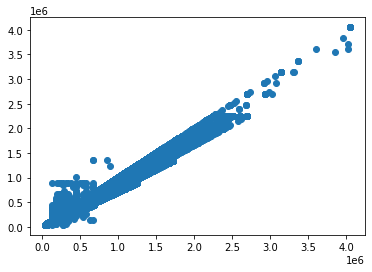

In [78]:
# Plotting a scatter plot to identify any trends

plt.scatter(data=app_data, x='AMT_CREDIT', y='AMT_GOODS_PRICE')
plt.show()

##### AMT_GOODS_PRICE vs AMT_CREDIT vs TARGET

<function matplotlib.pyplot.show(*args, **kw)>

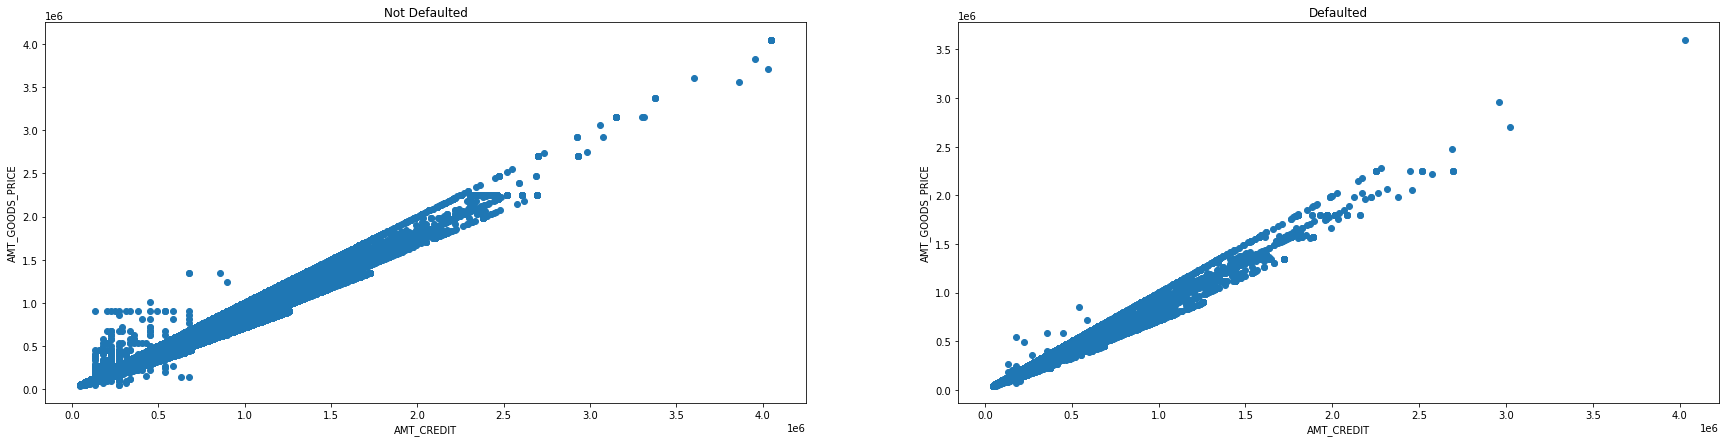

In [79]:
# Plotting a scatter plot to identify any trends
plt.figure(figsize=[30,7])

plt.subplot(1,2,1)
plt.scatter(data=app_data[app_data.TARGET==0], x='AMT_CREDIT', y='AMT_GOODS_PRICE')
plt.xlabel('AMT_CREDIT')
plt.ylabel('AMT_GOODS_PRICE')
plt.title(label='Not Defaulted')

plt.subplot(1,2,2)
plt.scatter(data=app_data[app_data.TARGET==1], x='AMT_CREDIT', y='AMT_GOODS_PRICE')
plt.xlabel('AMT_CREDIT')
plt.ylabel('AMT_GOODS_PRICE')
plt.title(label='Defaulted')

plt.show

Observations - There are lesser non-defaulter than defaulters for lower values of AMT_GOODS_CREDIT and AMT_CREDIT

#### AMT_ANNUITY

In [80]:
# Value distribution

print(app_data.AMT_ANNUITY.describe().div(1000))
print('Amounts are in multiples of 1000')

count    304.405000
mean      27.146541
std       14.480451
min        1.615500
25%       16.573500
50%       24.939000
75%       34.641000
max      258.025500
Name: AMT_ANNUITY, dtype: float64
Amounts are in multiples of 1000


##### Outlier analysis

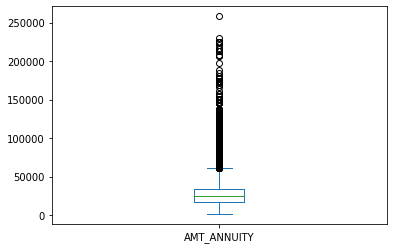

In [81]:
# Check for outliers using boxplot

app_data.AMT_ANNUITY.plot.box()

Too many outliers. Take 95%-ile values

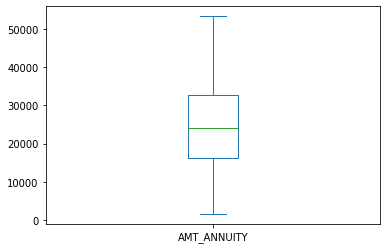

In [82]:
# Plotting boxplot only for values under 95%-ile

app_data[app_data.AMT_ANNUITY < np.quantile(app_data.AMT_ANNUITY, 0.95)].AMT_ANNUITY.plot.box()

##### AMT_ANNUITY vs TARGET

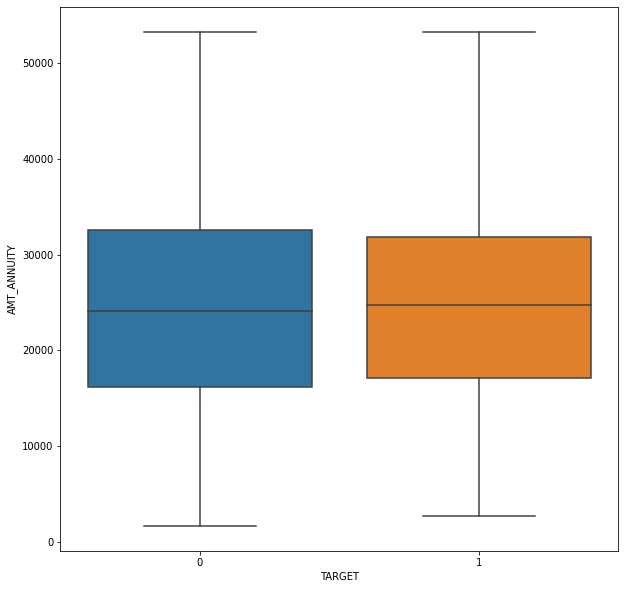

In [83]:
# Plotting a scatter plot
plt.figure(figsize=[10,10])
sns.boxplot(data=app_data[app_data.AMT_ANNUITY < np.quantile(app_data.AMT_ANNUITY, 0.95)], x='TARGET', y='AMT_ANNUITY')
plt.show()

In [84]:
app_data[app_data.AMT_ANNUITY < np.quantile(app_data.AMT_ANNUITY, 0.95)].groupby(['TARGET']).AMT_ANNUITY.aggregate(['mean', 'median', Percentile_75])

,mean,median,Percentile_75
TARGET,,,
0,25131.307221,24088.5,32602.5
1,25267.350946,24750.0,31887.0


Observation - No impact

No outliers so limit the analysis to less than 95%-ile values

##### AMT_ANNUITY vs AMT_CREDIT

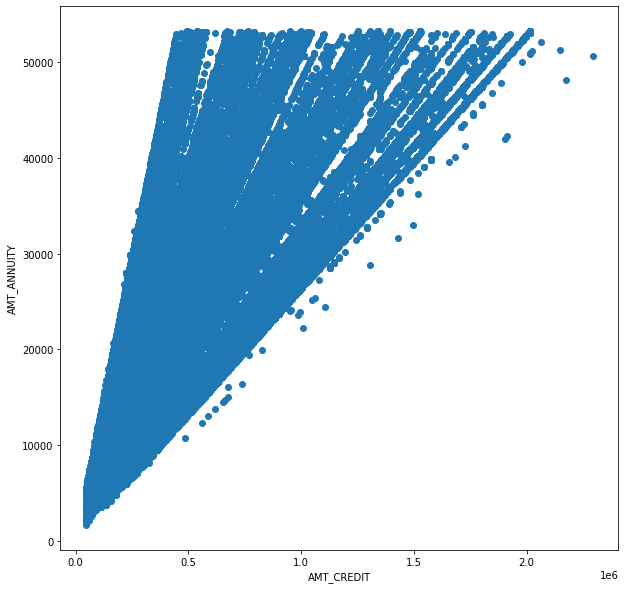

In [85]:
# Plotting a scatter plot
plt.figure(figsize=[10,10])
plt.scatter(data=app_data[app_data.AMT_ANNUITY < np.quantile(app_data.AMT_ANNUITY, 0.95)], x='AMT_CREDIT', y='AMT_ANNUITY')
plt.xlabel('AMT_CREDIT')
plt.ylabel('AMT_ANNUITY')
plt.show()

Observation - Loan Amount increases as the annuity amount increases

##### AMT_ANNUITY vs AMT_CREDIT vs TARGET

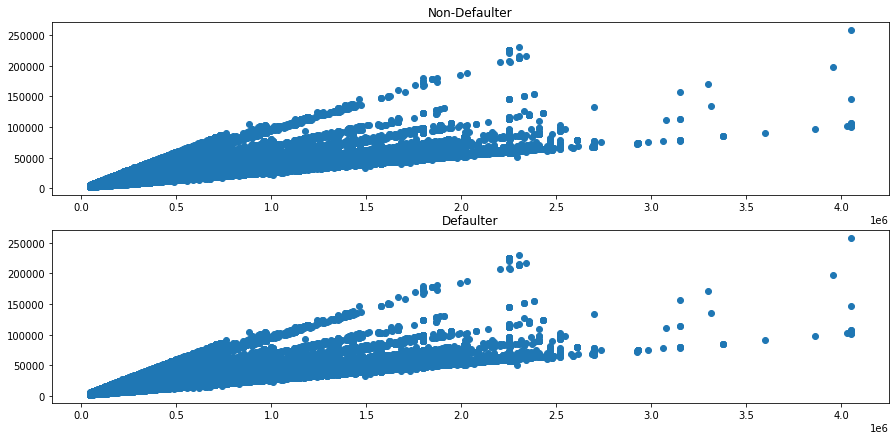

In [86]:
# Plotting a scatter plot for a group of non-defaulters and defaulters

plt.figure(figsize=[15,7])

plt.subplot(2,1,1)
plt.scatter(data=app_data[app_data.TARGET==0], x='AMT_CREDIT', y='AMT_ANNUITY')
plt.title(label='Non-Defaulter')

plt.subplot(2,1,2)
plt.scatter(data=app_data[app_data.TARGET==0], x='AMT_CREDIT', y='AMT_ANNUITY')
plt.title(label='Defaulter')

plt.show()

Observation - No impact

#### WEEKDAY_APPR_PROCESS_START and HOUR_APPR_PROCESS_START


##### WEEKDAY_APPR_PROCESS_START

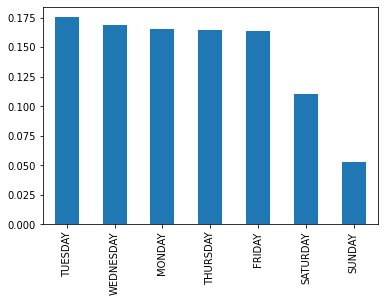

In [87]:
# Categorical value distribution

app_data.WEEKDAY_APPR_PROCESS_START.value_counts(normalize=True).plot.bar()

Observation - Applicants during the weekday are of similar count. Lesser applicants applied on weekends

WEEKDAY_APPR_PROCESS_START vs Target

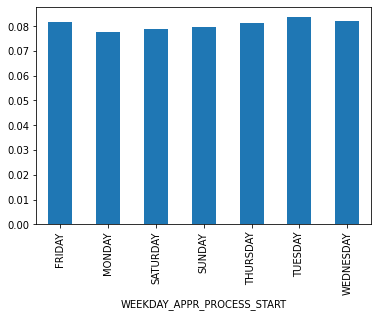

In [88]:
# plotting a bar chart

app_data.groupby(['WEEKDAY_APPR_PROCESS_START']).TARGET.mean().plot.bar()

Observations - No visibile trend

##### HOUR_APPR_PROCESS_START vs TARGET

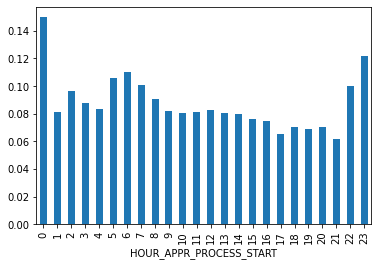

In [89]:
# plotting a bar chart
app_data.groupby(['HOUR_APPR_PROCESS_START']).TARGET.mean().plot.bar()

Observations - No visibile trend

### 2. Housing info (47 Columns)

In [90]:
# The column names of all columns containing housing information was stored in 'all_housing_cols
# Let's have a look

print(all_housing_cols)
print('No of columns -', len(all_housing_cols))

['APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMAX_AVG', 'FLOORSMIN_AVG', 'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG', 'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG', 'APARTMENTS_MODE', 'BASEMENTAREA_MODE', 'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BUILD_MODE', 'COMMONAREA_MODE', 'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMAX_MODE', 'FLOORSMIN_MODE', 'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE', 'LIVINGAREA_MODE', 'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE', 'APARTMENTS_MEDI', 'BASEMENTAREA_MEDI', 'YEARS_BEGINEXPLUATATION_MEDI', 'YEARS_BUILD_MEDI', 'COMMONAREA_MEDI', 'ELEVATORS_MEDI', 'ENTRANCES_MEDI', 'FLOORSMAX_MEDI', 'FLOORSMIN_MEDI', 'LANDAREA_MEDI', 'LIVINGAPARTMENTS_MEDI', 'LIVINGAREA_MEDI', 'NONLIVINGAPARTMENTS_MEDI', 'NONLIVINGAREA_MEDI', 'FONDKAPREMONT_MODE', 'HOUSETYPE_MODE', 'TOTALAREA_MODE', 'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE']
No of columns - 47


APARTMENTS_AVG                  50.780703
BASEMENTAREA_AVG                58.550287
YEARS_BEGINEXPLUATATION_AVG     48.813916
YEARS_BUILD_AVG                 66.522232
COMMONAREA_AVG                  69.894056
ELEVATORS_AVG                   53.335852
ENTRANCES_AVG                   50.383864
FLOORSMAX_AVG                   49.795503
FLOORSMIN_AVG                   67.875363
LANDAREA_AVG                    59.405726
LIVINGAPARTMENTS_AVG            68.379626
LIVINGAREA_AVG                  50.225850
NONLIVINGAPARTMENTS_AVG         69.458452
NONLIVINGAREA_AVG               55.217884
APARTMENTS_MODE                 50.780703
BASEMENTAREA_MODE               58.550287
YEARS_BEGINEXPLUATATION_MODE    48.813916
YEARS_BUILD_MODE                66.522232
COMMONAREA_MODE                 69.894056
ELEVATORS_MODE                  53.335852
ENTRANCES_MODE                  50.383864
FLOORSMAX_MODE                  49.795503
FLOORSMIN_MODE                  67.875363
LANDAREA_MODE                   59

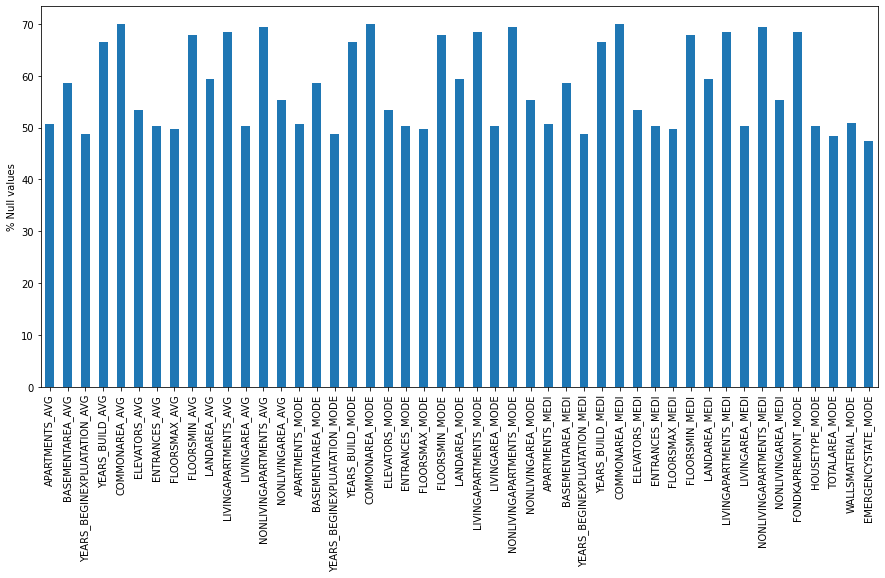


min is 47.43121827828058
max is 69.89405561669486


In [91]:
# Check null values

print(app_data[all_housing_cols].isnull().sum()*100/len(app_data))
print()

# bar plot
plt.figure(figsize=[15,7])
app_data[all_housing_cols].isnull().sum().mul(100).div(len(app_data)).plot.bar()
plt.ylabel('% Null values')
plt.show()

print()
print('min is', min(app_data[all_housing_cols].isnull().sum()*100/len(app_data)))
print('max is', max(app_data[all_housing_cols].isnull().sum()*100/len(app_data)))

Since for all columns 47%-70% of the data is missing, drop these columns

In [92]:
# Dropping the columns

app_data.drop(all_housing_cols, axis=1, inplace=True)

### 3. Documents (20 Columns)

All columns containing document information have column name starting with 'FLAG_DOCUMENT_'
I will use this condition to filter the column names

In [93]:
# Store all document column headers in 'docs_cols'

docs_cols = list(filter(lambda x: x.startswith('FLAG_DOCUMENT_') ,app_data.columns))
print(docs_cols) # To manualy verify the data
print(len(docs_cols)) # To manualy verify the data

['FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21']
20


0    0.999957
1    0.000043
Name: FLAG_DOCUMENT_2, dtype: float64
--------------------------------------------------
1    0.71281
0    0.28719
Name: FLAG_DOCUMENT_3, dtype: float64
--------------------------------------------------
0    0.999918
1    0.000082
Name: FLAG_DOCUMENT_4, dtype: float64
--------------------------------------------------
0    0.985296
1    0.014704
Name: FLAG_DOCUMENT_5, dtype: float64
--------------------------------------------------
0    0.911907
1    0.088093
Name: FLAG_DOCUMENT_6, dtype: float64
--------------------------------------------------
0    0.999862
1    0.000138
Name: FLAG_DOCUMENT_7, dtype: float64
--------------------------------------------------
0    0.918323
1    0.081677
Name: FLAG_DOCUMENT_8, dtype: float64
--------------------------------------------------
0    0.99615
1    0.00385
Name: FLAG_DOCUMENT_9, dtype: float64
--------------------------------------------------
0    0.99998
1    0.00002
Name: FLAG_DOCUMENT_10, dtype: float64
---

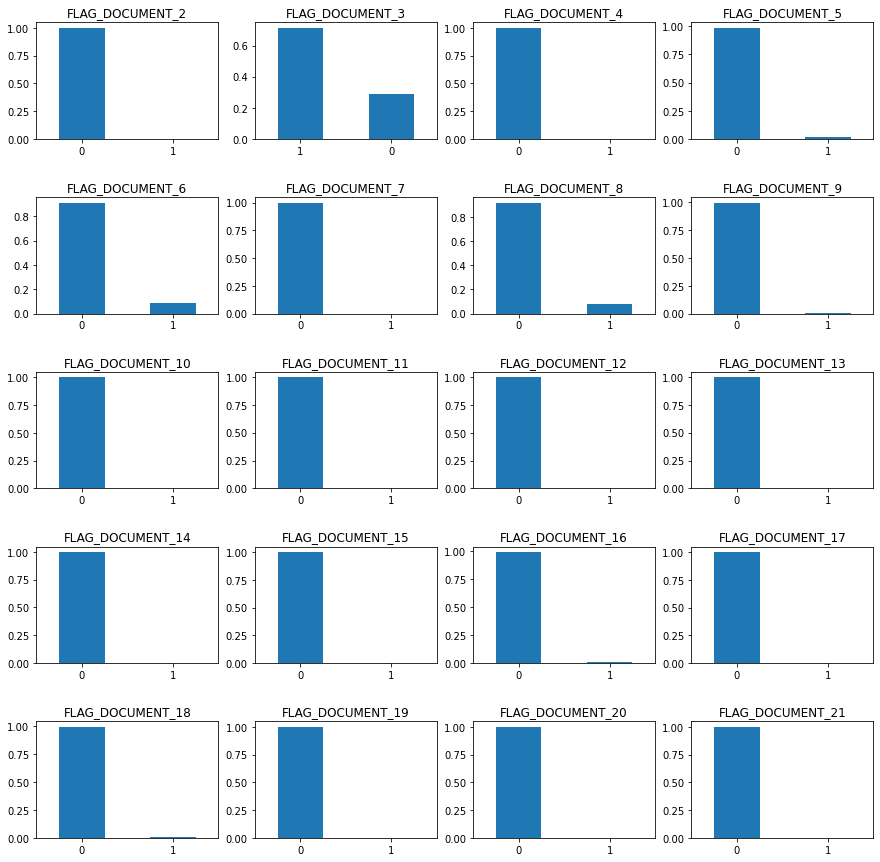

In [94]:
# Check document submissions across applicants using bar plots for each document

plt.figure(figsize=[15,15])

for i, col in enumerate(docs_cols):
  plt.subplot(5,4, i+1)
  plt.subplots_adjust(hspace=0.5, wspace=0.2)
  print(app_data[col].value_counts(normalize=True))
  app_data[col].value_counts(normalize=True).plot.bar()
  plt.title(label=col)
  plt.xticks(rotation=0)
  print('-'*50)
plt.show()

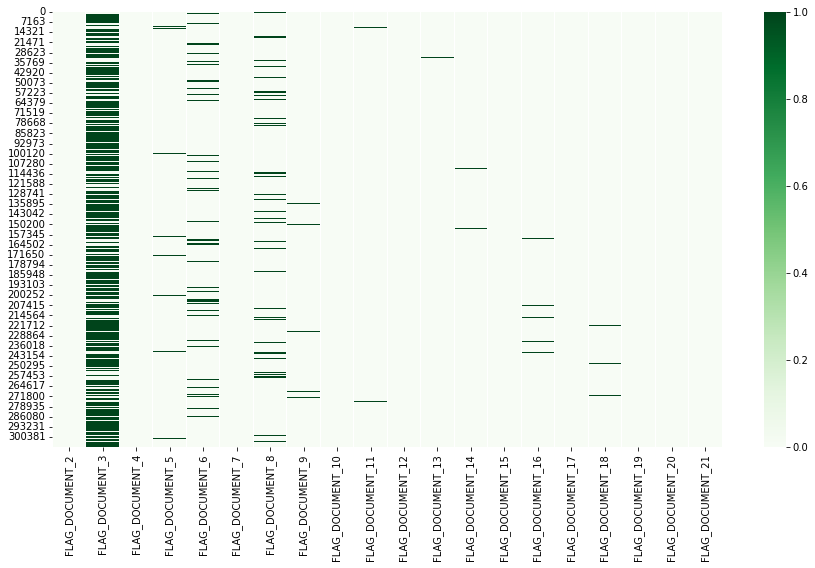

In [95]:
# Using a heatmap to visualise all the data in one figure
plt.figure(figsize=[15,8])
sns.heatmap(app_data[docs_cols], cmap='Greens')

As seen in the heatap and the bar plots, most applicants have not submitted any document except DOCUMENT_3


#### FLAG_DOCUMENT_3 vs TARGET

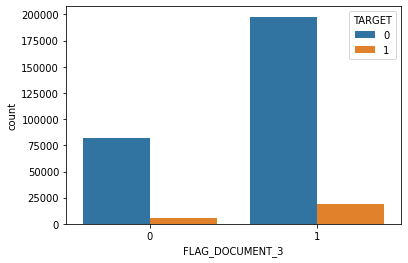

In [96]:
sns.countplot(app_data.FLAG_DOCUMENT_3, hue=app_data.TARGET)
plt.show()

1.   Only 1.78% of applicants who did not submit DOCUMENT_3 have defaulted on their payments
2.   Only 6.31% of applicants who submitted DOCUMENT_3 have defaulted on their payments

The trend is similar, so no major impact observed here. I will drop the column 'FLAG_DOCUMENT_3' as well


In [97]:
# Dropping the columns - 'FLAG_DOCUMENT_3'

app_data.drop(docs_cols, axis=1, inplace=True)
app_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 304405 entries, 0 to 307510
Data columns (total 55 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   304405 non-null  int64  
 1   TARGET                       304405 non-null  int64  
 2   NAME_CONTRACT_TYPE           304405 non-null  object 
 3   CODE_GENDER                  304405 non-null  object 
 4   FLAG_OWN_CAR                 304405 non-null  object 
 5   FLAG_OWN_REALTY              304405 non-null  object 
 6   CNT_CHILDREN                 304405 non-null  int64  
 7   AMT_INCOME_TOTAL             304405 non-null  float64
 8   AMT_CREDIT                   304405 non-null  float64
 9   AMT_ANNUITY                  304405 non-null  float64
 10  AMT_GOODS_PRICE              304405 non-null  float64
 11  NAME_TYPE_SUITE              304405 non-null  object 
 12  NAME_INCOME_TYPE             304405 non-null  object 
 13 

### 4. Region Rating (6 Columns)


#### Checking the columns that are now remaining in app_data

In [98]:
# Store the column headers in a variable 'region_cols'
region_cols = ['REGION_POPULATION_RELATIVE', 'REGION_RATING_CLIENT','REGION_RATING_CLIENT_W_CITY', 'REG_REGION_NOT_LIVE_REGION','REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION','REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY','LIVE_CITY_NOT_WORK_CITY']

In [99]:
# Check what data is stored in these columns
app_data[region_cols].head()

,REGION_POPULATION_RELATIVE,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY
0,0.018801,2,2,0,0,0,0,0,0
1,0.003541,1,1,0,0,0,0,0,0
2,0.010032,2,2,0,0,0,0,0,0
3,0.008019,2,2,0,0,0,0,0,0
4,0.028663,2,2,0,0,0,0,1,1


Observation - All region columns have information stored in form of flags(1/0 referring to Yes/No respectively)

Check null values in these columns

In [100]:
app_data[region_cols].isnull().sum()

REGION_POPULATION_RELATIVE     0
REGION_RATING_CLIENT           0
REGION_RATING_CLIENT_W_CITY    0
REG_REGION_NOT_LIVE_REGION     0
REG_REGION_NOT_WORK_REGION     0
LIVE_REGION_NOT_WORK_REGION    0
REG_CITY_NOT_LIVE_CITY         0
REG_CITY_NOT_WORK_CITY         0
LIVE_CITY_NOT_WORK_CITY        0
dtype: int64

Observation - No null values. 

#### Distribution of responses for categorical value columns

'REGION_POPULATION_RELATIVE' contains normalised numeric data while the remaining columns contain categoric data. So I will exclude this column for now

2    73.818433
3    15.755983
1    10.425584
Name: REGION_RATING_CLIENT, dtype: float64
--------------------------------------------------
2    74.633465
3    14.296743
1    11.069792
Name: REGION_RATING_CLIENT_W_CITY, dtype: float64
--------------------------------------------------
0    98.484256
1     1.515744
Name: REG_REGION_NOT_LIVE_REGION, dtype: float64
--------------------------------------------------
0    94.931424
1     5.068576
Name: REG_REGION_NOT_WORK_REGION, dtype: float64
--------------------------------------------------
0    95.947833
1     4.052167
Name: LIVE_REGION_NOT_WORK_REGION, dtype: float64
--------------------------------------------------
0    92.178512
1     7.821488
Name: REG_CITY_NOT_LIVE_CITY, dtype: float64
--------------------------------------------------
0    76.943874
1    23.056126
Name: REG_CITY_NOT_WORK_CITY, dtype: float64
--------------------------------------------------
0    82.035775
1    17.964225
Name: LIVE_CITY_NOT_WORK_CITY, dtype: floa

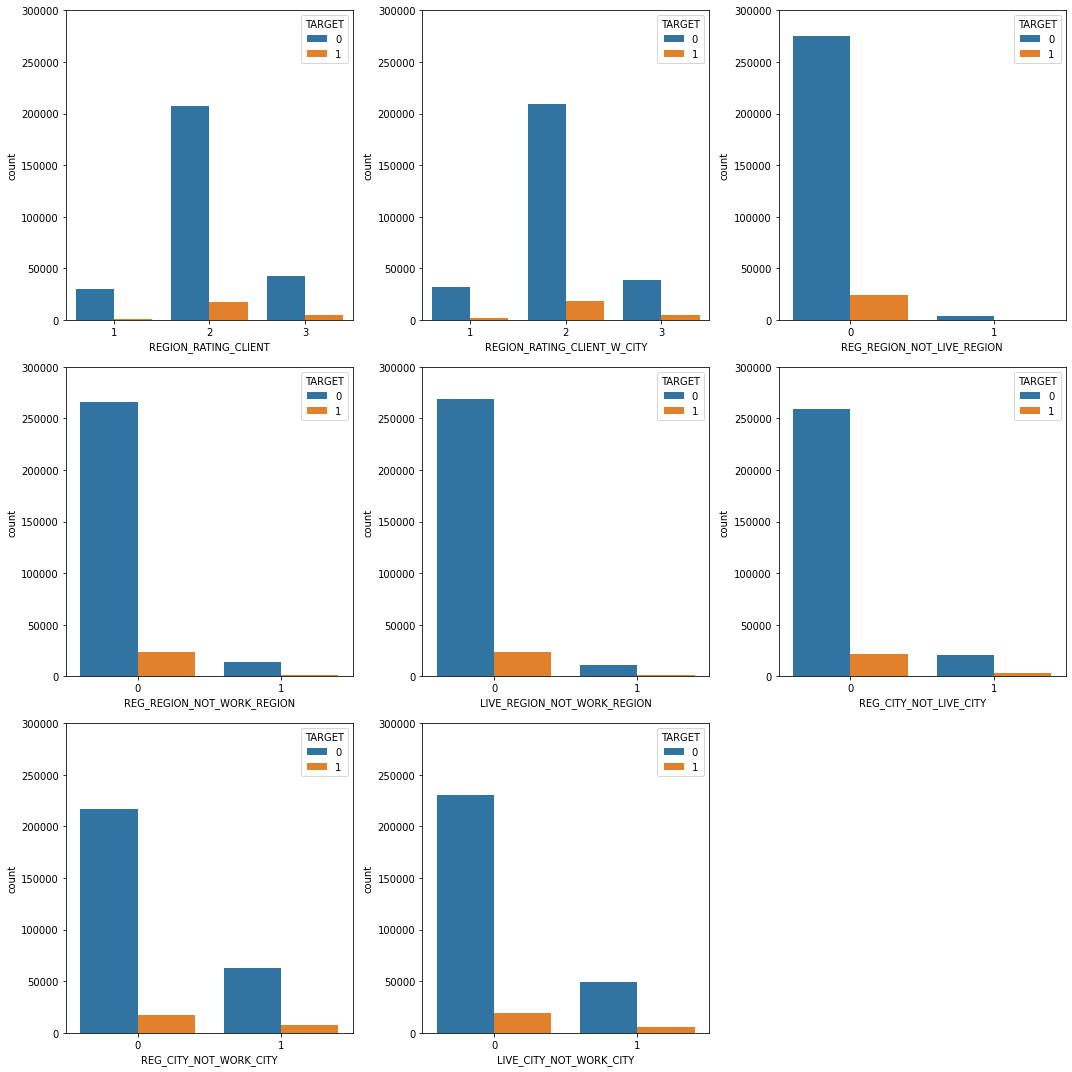

In [101]:
# value distriution for Categorical value columns using countplot

fig = plt.figure(figsize=[15,15])

for i, col in enumerate(region_cols[1:]):
  
  print(app_data[col].value_counts(normalize=True)*100)
  plt.subplot(3, 3, i+1, ylim=(0, 300000))
  plt.subplots_adjust(hspace = 1.0)
  sns.countplot(app_data[col], hue=app_data["TARGET"])
  plt.xticks(rotation=0)
  plt.tight_layout()

  print('-'*50)


Observations -

There are two types of categorical data here - 
1. REGION_RATING_CLIENT and REGION_RATING_CLIENT_W_CITY which are ordered categories rated as 1/2/3
  * I will drop the columns REGION_RATING_CLIENT as the trend is similar for these columns and  I will analyse further
2. All other data that are of type 0/1 (Flags)
  * The trend is similar for these columns so I will analyse further





In [102]:
# Dropping the column REGION_RATING_CLIENT
app_data.drop('REGION_RATING_CLIENT', axis=1, inplace=True) 

#### Flag type columns vs TARGET

REG_REGION_NOT_LIVE_REGION 

TARGET=0
 0    98.504758
1     1.495242
Name: REG_REGION_NOT_LIVE_REGION, dtype: float64
TARGET=1
 0    98.251592
1     1.748408
Name: REG_REGION_NOT_LIVE_REGION, dtype: float64
--------------------------------------------------


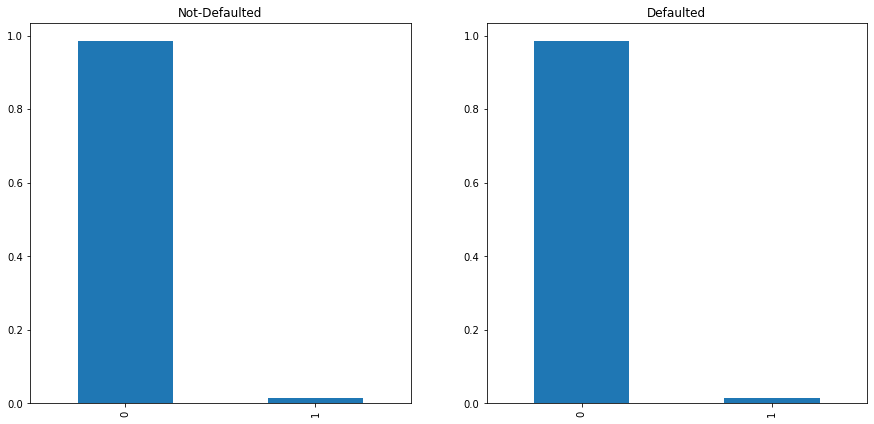

REG_REGION_NOT_WORK_REGION 

TARGET=0
 0    94.97773
1     5.02227
Name: REG_REGION_NOT_WORK_REGION, dtype: float64
TARGET=1
 0    94.405906
1     5.594094
Name: REG_REGION_NOT_WORK_REGION, dtype: float64
--------------------------------------------------


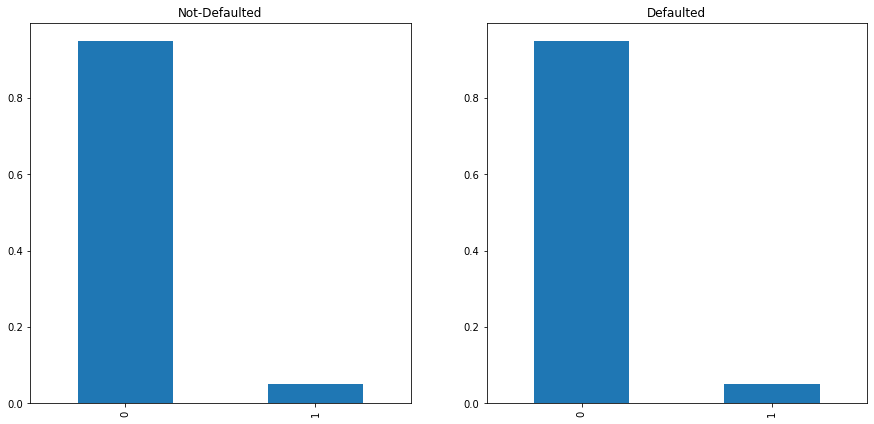

LIVE_REGION_NOT_WORK_REGION 

TARGET=0
 0    95.965384
1     4.034616
Name: LIVE_REGION_NOT_WORK_REGION, dtype: float64
TARGET=1
 0    95.748651
1     4.251349
Name: LIVE_REGION_NOT_WORK_REGION, dtype: float64
--------------------------------------------------


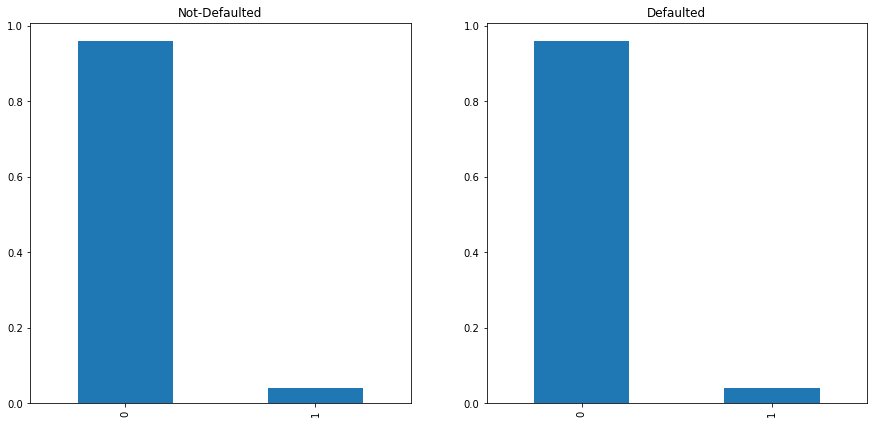

REG_CITY_NOT_LIVE_CITY 

TARGET=0
 0    92.535227
1     7.464773
Name: REG_CITY_NOT_LIVE_CITY, dtype: float64
TARGET=1
 0    88.130299
1    11.869701
Name: REG_CITY_NOT_LIVE_CITY, dtype: float64
--------------------------------------------------


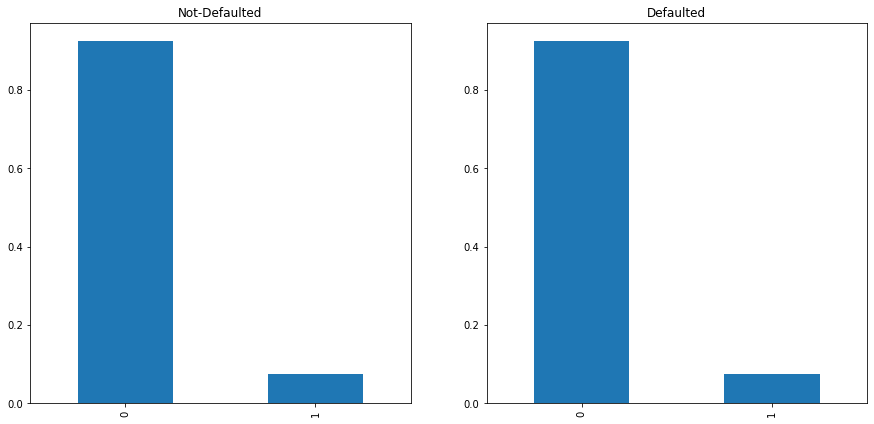

REG_CITY_NOT_WORK_CITY 

TARGET=0
 0    77.58352
1    22.41648
Name: REG_CITY_NOT_WORK_CITY, dtype: float64
TARGET=1
 0    69.6848
1    30.3152
Name: REG_CITY_NOT_WORK_CITY, dtype: float64
--------------------------------------------------


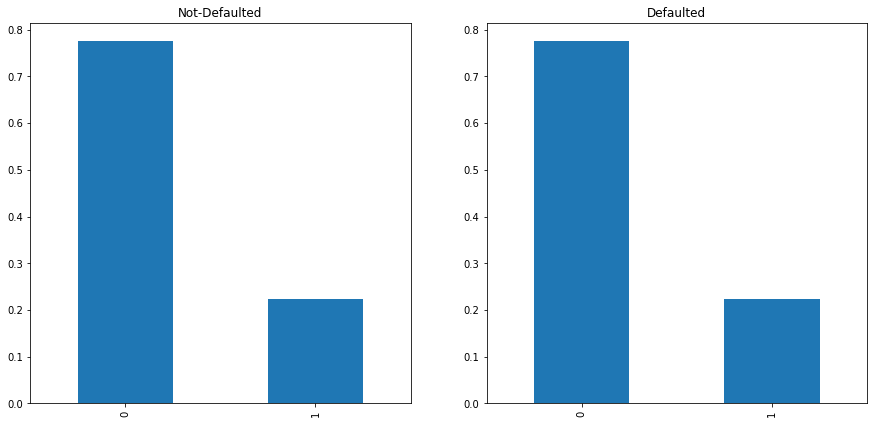

LIVE_CITY_NOT_WORK_CITY 

TARGET=0
 0    82.406686
1    17.593314
Name: LIVE_CITY_NOT_WORK_CITY, dtype: float64
TARGET=1
 0    77.826457
1    22.173543
Name: LIVE_CITY_NOT_WORK_CITY, dtype: float64
--------------------------------------------------


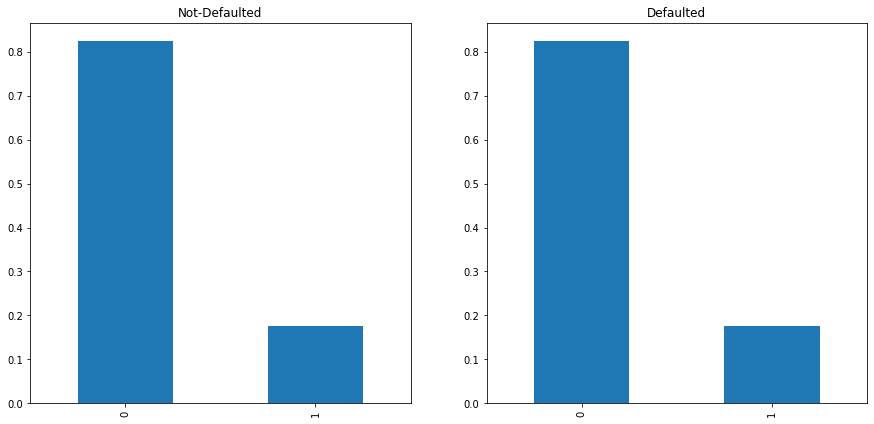

In [103]:
# Segmenting data based on TARGET and analyse count of value distribution for the columns 



for i, col in enumerate(region_cols[3:]):
  
  print(col, '\n')
  print('TARGET=0\n', app_data[app_data.TARGET==0][col].value_counts(normalize=True)*100)
  print('TARGET=1\n', app_data[app_data.TARGET==1][col].value_counts(normalize=True)*100)
  print('-'*50)

  plt.figure(figsize=[15,7])

  plt.subplot(1,2,1)
  app_data[app_data.TARGET==0][col].value_counts(normalize=True).plot.bar()
  plt.title('Not-Defaulted')

  plt.subplot(1,2,2)
  app_data[app_data.TARGET==0][col].value_counts(normalize=True).plot.bar()
  plt.title('Defaulted')
  
  plt.show()

REG_REGION_NOT_LIVE_REGION 

Percentage of applicants within the group that have responded 1 to this column and have defaulted on their payments -  9.341135674035545
Percentage of applicants within the group that have responded 0 to this column and have defaulted on their payments -  8.078961676634721
--------------------------------------------------
REG_REGION_NOT_WORK_REGION 

Percentage of applicants within the group that have responded 1 to this column and have defaulted on their payments -  8.937714693110376
Percentage of applicants within the group that have responded 0 to this column and have defaulted on their payments -  8.053263938873817
--------------------------------------------------
LIVE_REGION_NOT_WORK_REGION 

Percentage of applicants within the group that have responded 1 to this column and have defaulted on their payments -  8.496149169031211
Percentage of applicants within the group that have responded 0 to this column and have defaulted on their payments -  8.0812

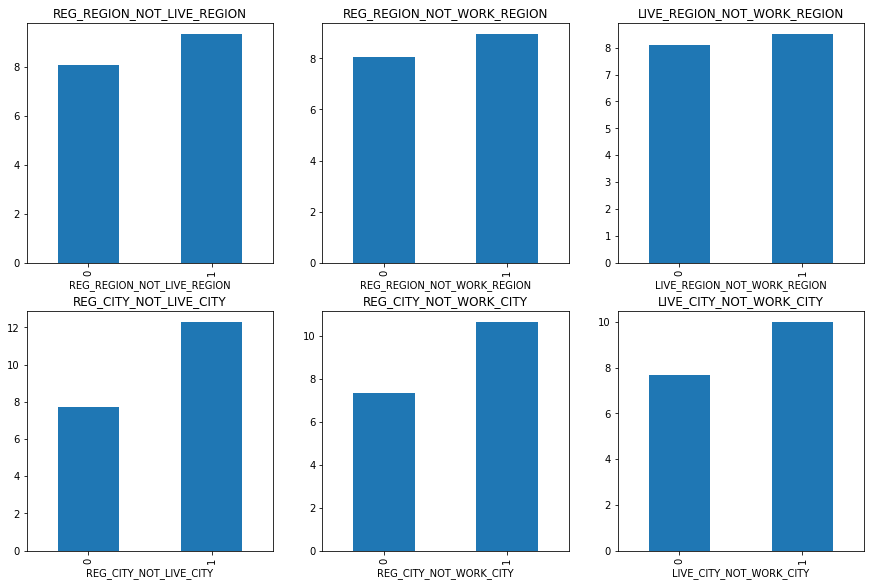

In [104]:
# Rate of defaulters in each category of the columns

fig = plt.figure(figsize=[15,15])

for i, col in enumerate(region_cols[3:]):
  
  print(col, '\n')
  print('Percentage of applicants within the group that have responded 1 to this column and have defaulted on their payments - ', app_data[app_data[col]==1].TARGET.mean()*100)
  print('Percentage of applicants within the group that have responded 0 to this column and have defaulted on their payments - ', app_data[app_data[col]==0].TARGET.mean()*100)
  print('-'*50)

  plt.subplot(3,3,i+1)
  app_data.groupby([col]).TARGET.mean().mul(100).plot.bar()
  plt.title(label=col)

plt.show()


Observations - 
1. The columns 'REG_REGION_NOT_WORK_REGION', 'REG_REGION_NOT_LIVE_REGION' and 'LIVE_REGION_NOT_WORK_REGION' show almost identical default rates of 8-9% So I will drop these columns
2. Columns 'REG_CITY_NOT_WORK_CITY' and 'REG_CITY_NOT_LIVE_CITY' have a higher default rates when the cities are different (Applicant has responded 1)
3. I also notice a slight increase in payment defaults when the LIVE_CITY_NOT_WORK_CITY (Living city and working city) are different. But not very significant, so I will drop this as well


In [105]:
# Dropping the columns REG_REGION_NOT_WORK_REGION, REG_REGION_NOT_LIVE_REGION, LIVE_REGION_NOT_WORK_REGION, LIVE_CITY_NOT_WORK_CITY
app_data.drop(['REG_REGION_NOT_WORK_REGION', 'REG_REGION_NOT_LIVE_REGION', 'LIVE_REGION_NOT_WORK_REGION', 'LIVE_CITY_NOT_WORK_CITY'], axis=1, inplace=True)

#### Region/City rating vs TARGET

Among all the loan applicants, the distribution of region with city based on rating is
2    74.633465
3    14.296743
1    11.069792
Name: REGION_RATING_CLIENT_W_CITY, dtype: float64
-------------------------------------------------- 

Among the loan applicants who HAVE NOT DEFAULTED, the distribution of region with city based on rating is
2    74.765330
3    13.776032
1    11.458639
Name: REGION_RATING_CLIENT_W_CITY, dtype: float64
-------------------------------------------------- 

Among the loan applicants who HAVE DEFAULTED, the distribution of region with city based on rating is
2    73.136992
3    20.206077
1     6.656931
Name: REGION_RATING_CLIENT_W_CITY, dtype: float64
-------------------------------------------------- 



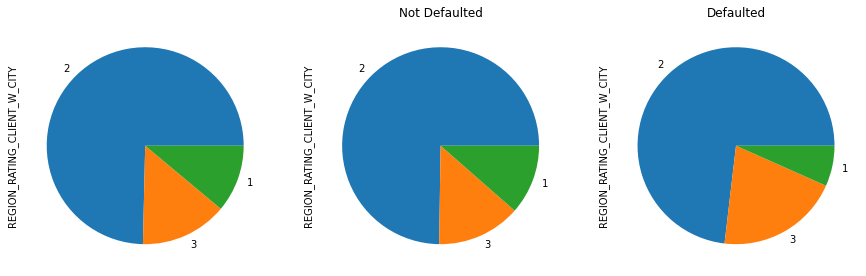

In [106]:


fig = plt.figure(figsize=[15,15])

print('Among all the loan applicants, the distribution of region with city based on rating is')
print(app_data.REGION_RATING_CLIENT_W_CITY.value_counts(normalize=True)*100)
plt.subplot(1, 3, 1)
app_data.REGION_RATING_CLIENT_W_CITY.value_counts(normalize=True).plot.pie()
print('-'*50, '\n')

print('Among the loan applicants who HAVE NOT DEFAULTED, the distribution of region with city based on rating is')
print(app_data[app_data.TARGET==0].REGION_RATING_CLIENT_W_CITY.value_counts(normalize=True)*100)
plt.subplot(1, 3, 2)
app_data[app_data.TARGET==0].REGION_RATING_CLIENT_W_CITY.value_counts(normalize=True).plot.pie()
plt.title(label='Not Defaulted')
print('-'*50, '\n')

print('Among the loan applicants who HAVE DEFAULTED, the distribution of region with city based on rating is')
print(app_data[app_data.TARGET==1].REGION_RATING_CLIENT_W_CITY.value_counts(normalize=True)*100)
plt.subplot(1, 3, 3)
app_data[app_data.TARGET==1].REGION_RATING_CLIENT_W_CITY.value_counts(normalize=True).plot.pie()
plt.title(label='Defaulted')
print('-'*50, '\n')

plt.show()

Observations - 

1. For Rating 2, the trend is similar across both cases and on an overall level
2. Within the group of applicants who have defaulted on their payments, I notice that the ratio of applicants in region of rating 1 and 3 slightly moves towards 3, which are the lower rated cities/regions. 

Hence it may be possible that the chances of an applicant having difficulties with payments are high if he/she is from a region/city with rating 3

##### REGION_RATING_CLIENT_W_CITY vs TARGET

REGION_RATING_CLIENT_W_CITY
1     4.869870
2     7.935718
3    11.445312
Name: TARGET, dtype: float64


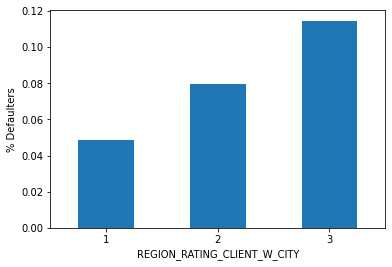

In [107]:
# REGION_RATING_CLIENT_W_CITY
print(app_data.groupby(['REGION_RATING_CLIENT_W_CITY']).TARGET.mean()*100)

app_data.groupby(['REGION_RATING_CLIENT_W_CITY']).TARGET.mean().plot.bar()
plt.ylabel('% Defaulters')
plt.xticks(rotation=0)
plt.show()

Observations - 

1. Region/City with Category 1 has lowest percentage of loan applicants who have had difficulty with their payments
2. Region/City with Category 3 has highest percentage of loan applicants who have had difficulty with their payments
3. Category 2 falls in between

##### REGION_RATING_CLIENT_W_CITY vs AMT_CREDIT vs TARGET



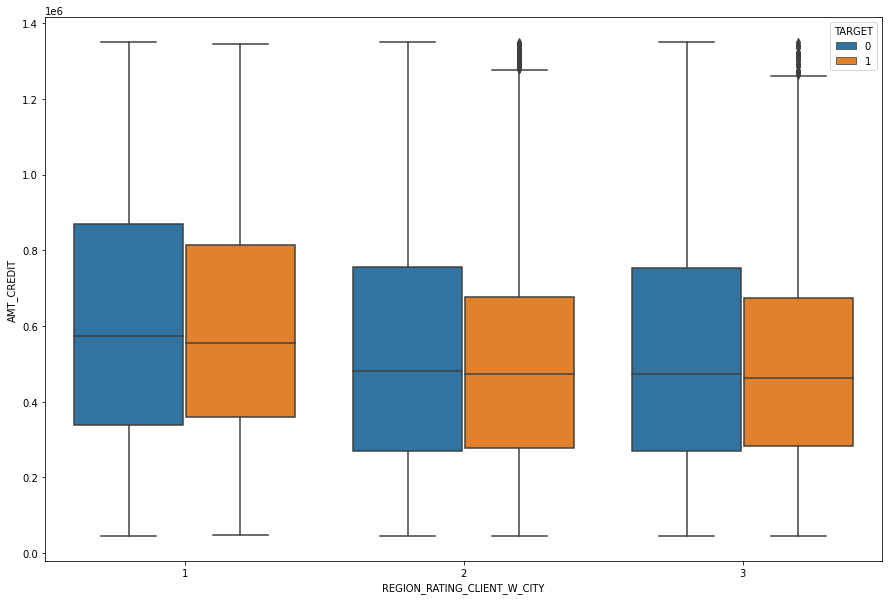

In [108]:
# Distribution of Amount across all Region rating categories

plt.figure(figsize=[15,10])

sns.boxplot(data=app_data[app_data.AMT_CREDIT<np.quantile(app_data.AMT_CREDIT, 0.95)], x='REGION_RATING_CLIENT_W_CITY', y='AMT_CREDIT', hue='TARGET')
plt.show()

Observations -
1. Applicants from Region/Cities with Rating=1 have taken loans of higher amount than Region/Cities of Rating 2 and 3
2. More applicants who have not defaulted have taken loans of higher amount than those who have defaulted

#### REGION_POPULATION_RELATIVE vs TARGET

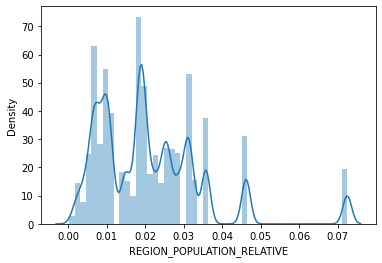

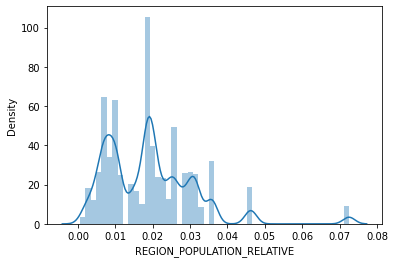

In [109]:
# Distribution graph

sns.distplot(app_data[app_data.TARGET==0].REGION_POPULATION_RELATIVE)
plt.show()
sns.distplot(app_data[app_data.TARGET==1].REGION_POPULATION_RELATIVE)
plt.show()

The trend is similar across both the TARGET data (0/1)

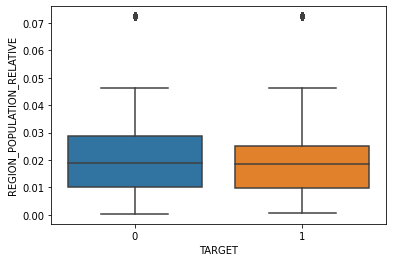

In [110]:
# Boxplot

sns.boxplot(data=app_data, x='TARGET', y='REGION_POPULATION_RELATIVE')
plt.show()

Observation - The quantiles of 25, 50 and 100 are smiliar for both data sets, lets drill down on the quantiles 60, 75 and 90

In [111]:

print(app_data[app_data.TARGET==0].REGION_POPULATION_RELATIVE.quantile([0.6, 0.75, 0.9])*100)
print('-'*50)
print(app_data[app_data.TARGET==1].REGION_POPULATION_RELATIVE.quantile([0.6, 0.75, 0.9])*100)
print('-'*50)
print(app_data.REGION_POPULATION_RELATIVE.quantile([0.6, 0.75, 0.9])*100)

0.60    2.0713
0.75    2.8663
0.90    3.5792
Name: REGION_POPULATION_RELATIVE, dtype: float64
--------------------------------------------------
0.60    2.0246
0.75    2.5164
0.90    3.1329
Name: REGION_POPULATION_RELATIVE, dtype: float64
--------------------------------------------------
0.60    2.0713
0.75    2.8663
0.90    3.5792
Name: REGION_POPULATION_RELATIVE, dtype: float64


The trend is similar, but I dont know its effect on other aspects of the loan

#### REGION_POPULATION_RELATIVE vs REGION_RATING_CLIENT_W_CITY

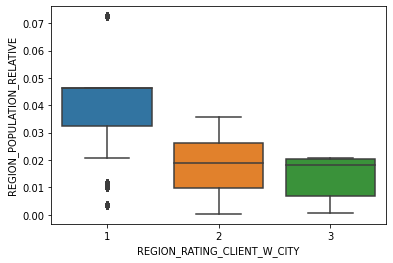

In [112]:
sns.boxplot(data=app_data, x='REGION_RATING_CLIENT_W_CITY', y='REGION_POPULATION_RELATIVE')
plt.show()

Observation - Lower the rating, higher is the general populatation of the region/city

### 5. Credit Bureau information

In [113]:
# Storing the relevant columns in 'credit_cols'
credit_cols =['AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR']

0.0    99.390457
1.0     0.584478
2.0     0.021268
3.0     0.003418
4.0     0.000380
Name: AMT_REQ_CREDIT_BUREAU_HOUR, dtype: float64
--------------------------------------------------
0.0    99.440208
1.0     0.486495
2.0     0.039877
3.0     0.016710
4.0     0.009115
5.0     0.003418
6.0     0.003038
9.0     0.000760
8.0     0.000380
Name: AMT_REQ_CREDIT_BUREAU_DAY, dtype: float64
--------------------------------------------------
0.0    96.774929
1.0     3.103163
2.0     0.074816
3.0     0.021268
4.0     0.012153
6.0     0.007596
5.0     0.003418
8.0     0.001899
7.0     0.000760
Name: AMT_REQ_CREDIT_BUREAU_WEEK, dtype: float64
--------------------------------------------------
0.0     83.493726
1.0     12.515571
2.0      2.025354
3.0      0.751200
4.0      0.406742
5.0      0.225208
6.0      0.127985
7.0      0.111275
9.0      0.077475
8.0      0.068740
10.0     0.049371
11.0     0.044054
12.0     0.029243
13.0     0.026964
14.0     0.014811
15.0     0.013292
16.0     0.008735
17.0

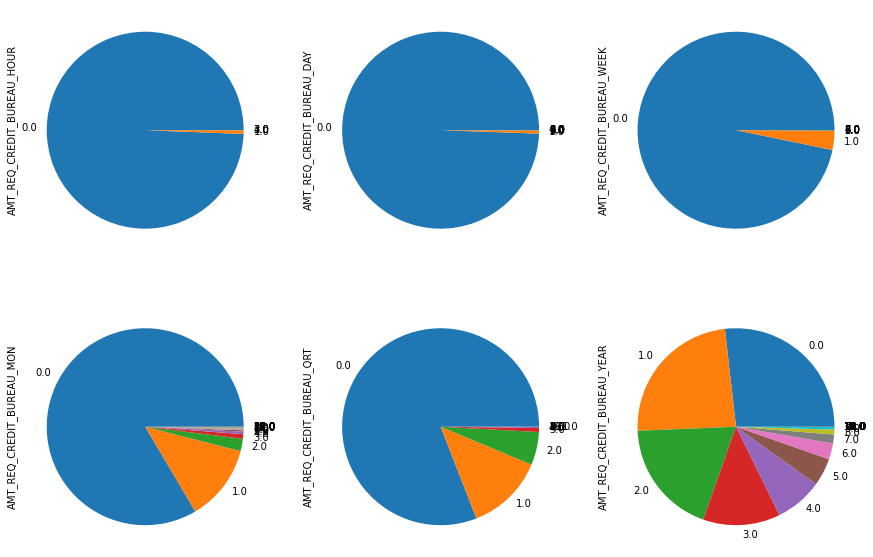

In [114]:
plt.figure(figsize=[15,10])

for i, col in enumerate(credit_cols):
  print(app_data[col].value_counts(normalize=True)*100)

  plt.subplot(2,3,i+1)
  app_data[col].value_counts(normalize=True).plot.pie()
  print('-'*50)

plt.show()

Most responses for AMT_REQ_CREDIT_BUREAU_HOUR and AMT_REQ_CREDIT_BUREAU_DAY is zero(0), hence I will drop these columns

In [115]:
# Dropping the columns

app_data.drop(['AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY'], axis=1, inplace=True)

#### Credit data vs TARGET

AMT_REQ_CREDIT_BUREAU_WEEK
6.0     5.000000
3.0     7.142857
0.0     7.741543
1.0     7.795863
2.0     9.644670
5.0    11.111111
4.0    12.500000
Name: TARGET, dtype: float64
AMT_REQ_CREDIT_BUREAU_MON
12.0    1.298701
14.0    2.564103
15.0    2.857143
8.0     3.314917
9.0     3.431373
11.0    3.448276
13.0    4.225352
6.0     5.341246
3.0     5.409505
4.0     5.602241
7.0     5.802048
5.0     6.576728
2.0     7.069192
17.0    7.142857
1.0     7.740859
0.0     7.818548
10.0    8.461538
Name: TARGET, dtype: float64
AMT_REQ_CREDIT_BUREAU_QRT
1.0       6.595985
3.0       7.407407
0.0       7.874075
2.0       8.380592
5.0       9.523810
4.0      12.076271
7.0      14.285714
6.0      22.222222
19.0    100.000000
Name: TARGET, dtype: float64
AMT_REQ_CREDIT_BUREAU_YEAR
13.0      5.263158
11.0      6.666667
12.0      6.896552
0.0       7.179800
1.0       7.343581
3.0       7.978325
2.0       8.121939
4.0       8.265708
5.0       8.347245
8.0       8.593012
6.0       9.092223
7.0       9.237575


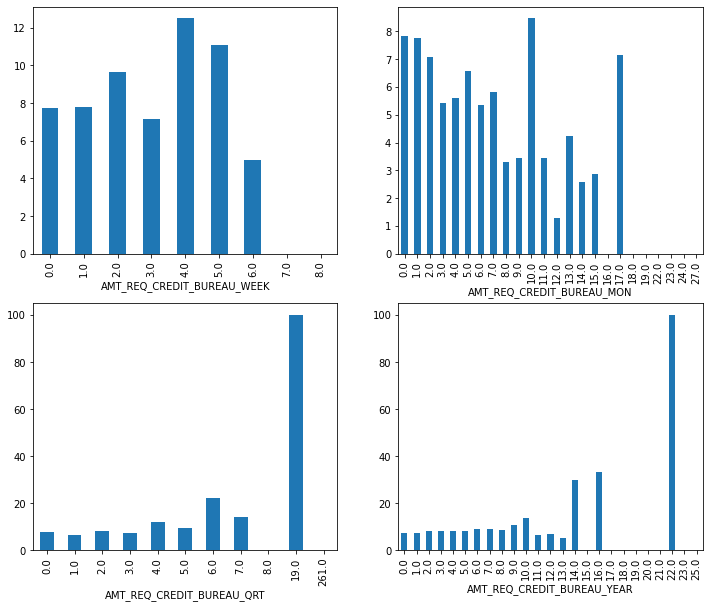

In [116]:
# I will now analyse the credit data against the TARGET variable
# Checking the percentage of applicants who have had payment difficulties 
plt.figure(figsize=[12,10])

for i, col in enumerate(credit_cols[2:]):

  print(app_data.groupby(col).TARGET.mean().mul(100).sort_values()[app_data.groupby(col).TARGET.mean().mul(100).sort_values()!=0])
  plt.subplot(2,2, i+1)
  app_data.groupby(col).TARGET.mean().mul(100).plot.bar()

plt.show()

No notable observation

Since there is no visible relation between these columns and the TARGET variable and most of the applicants have responded zero(0) to this parameter meaning that they dont have any credit enquiry, I will be dropping all the columns except AMT_REQ_CREDIT_BUREAU_YEAR

In [117]:
#Dropping all columns

app_data.drop(['AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_WEEK'], axis=1, inplace=True)
app_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 304405 entries, 0 to 307510
Data columns (total 45 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   304405 non-null  int64  
 1   TARGET                       304405 non-null  int64  
 2   NAME_CONTRACT_TYPE           304405 non-null  object 
 3   CODE_GENDER                  304405 non-null  object 
 4   FLAG_OWN_CAR                 304405 non-null  object 
 5   FLAG_OWN_REALTY              304405 non-null  object 
 6   CNT_CHILDREN                 304405 non-null  int64  
 7   AMT_INCOME_TOTAL             304405 non-null  float64
 8   AMT_CREDIT                   304405 non-null  float64
 9   AMT_ANNUITY                  304405 non-null  float64
 10  AMT_GOODS_PRICE              304405 non-null  float64
 11  NAME_TYPE_SUITE              304405 non-null  object 
 12  NAME_INCOME_TYPE             304405 non-null  object 
 13 

### AMT_REQ_CREDIT_BUREAU_YEAR vs AMT_CREDIT vs TARGET



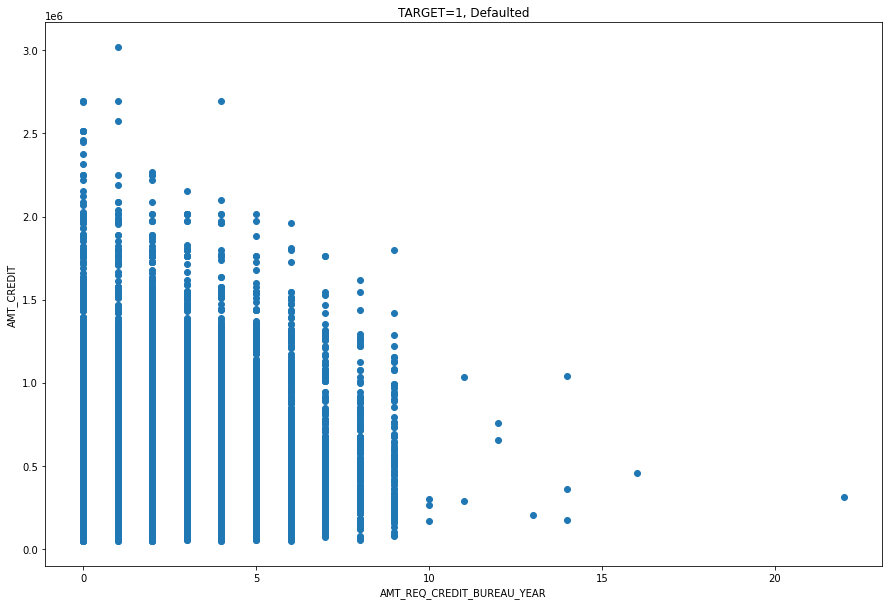

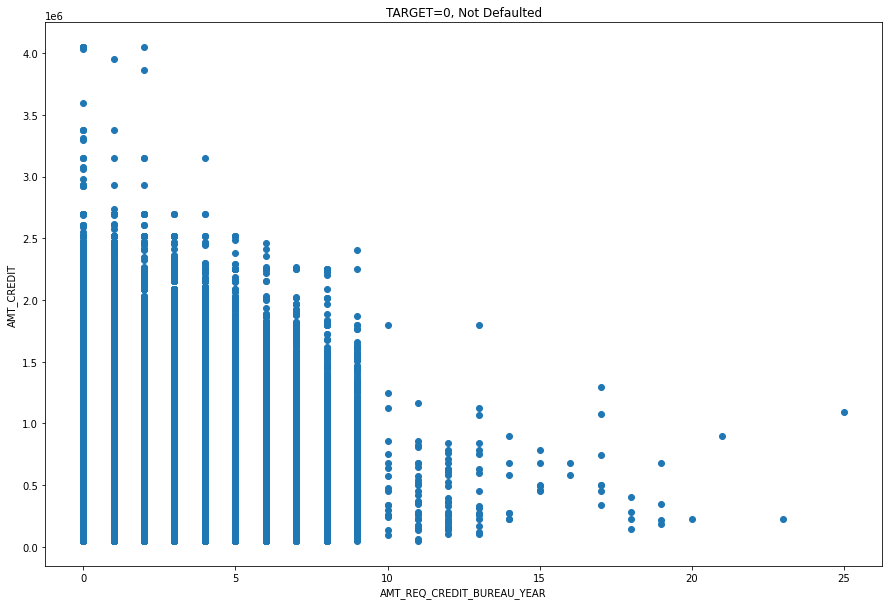

In [118]:
plt.figure(figsize=[15,10])
plt.scatter(data=app_data[app_data.TARGET==1], x='AMT_REQ_CREDIT_BUREAU_YEAR', y='AMT_CREDIT')
plt.title('TARGET=1, Defaulted')
plt.xlabel('AMT_REQ_CREDIT_BUREAU_YEAR')
plt.ylabel('AMT_CREDIT')
plt.show()

plt.figure(figsize=[15,10])
plt.scatter(data=app_data[app_data.TARGET==0], x='AMT_REQ_CREDIT_BUREAU_YEAR', y='AMT_CREDIT')
plt.title('TARGET=0, Not Defaulted')
plt.xlabel('AMT_REQ_CREDIT_BUREAU_YEAR')
plt.ylabel('AMT_CREDIT')
plt.show() 

Observations - 
1. As AMT_REQ_CREDIT_BUREAU_YEAR increase, the AMT_CREDIT also increases
2. Applicants who defaulted did not have more than enquiries 10 enquiries in the past year(Except few)

### 6. Social Circle information

In [119]:
# Storing all column headers related to Social circle information in 'social_cols'

social_cols = ['OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE']

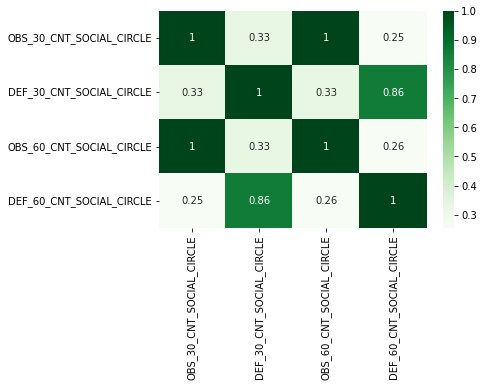

In [120]:
# Checking for correlations between these columns using a heatmap

sns.heatmap(app_data[social_cols].corr(), annot=True, cmap='Greens')

Observations - 

There is high correlation between
1. DEF_30_CNT_SOCIAL_CIRCLE and DEF_60_CNT_SOCIAL_CIRCLE
2. OBS_30_CNT_SOCIAL_CIRCLE and OBS_60_CNT_SOCIAL_CIRCLE

So I will only analyse DEF_60_CNT_SOCIAL_CIRCLE and OBS_60_CNT_SOCIAL_CIRCLE

#### DEF_60_CNT_SOCIAL_CIRCLE

0.0     91.591794
1.0      7.127347
2.0      1.033163
3.0      0.195463
4.0      0.044020
5.0      0.006570
6.0      0.000986
7.0      0.000329
24.0     0.000329
Name: DEF_60_CNT_SOCIAL_CIRCLE, dtype: float64
--------------------------------------------------


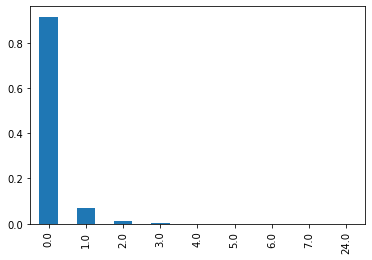

In [121]:
# Distribution of values

print(app_data['DEF_60_CNT_SOCIAL_CIRCLE'].value_counts(normalize=True)*100)
print('-'*50)
app_data['DEF_60_CNT_SOCIAL_CIRCLE'].value_counts(normalize=True).plot.bar()

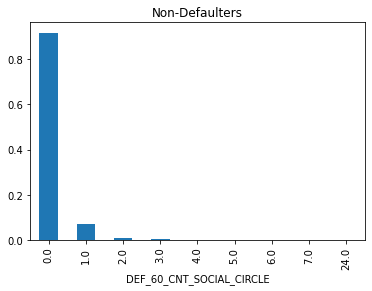

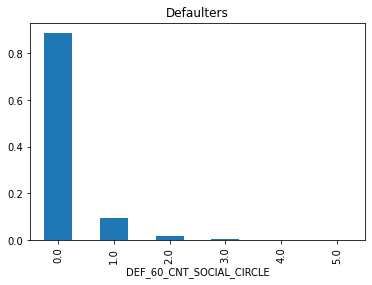

In [122]:
# Distribution of values for Defaulters and non-defaulters

app_data[app_data.TARGET==0].DEF_60_CNT_SOCIAL_CIRCLE.value_counts(normalize=True).plot.bar()
plt.title('Non-Defaulters')
plt.xlabel('DEF_60_CNT_SOCIAL_CIRCLE')
plt.show()
app_data[app_data.TARGET==1].DEF_60_CNT_SOCIAL_CIRCLE.value_counts(normalize=True).plot.bar()
plt.xlabel('DEF_60_CNT_SOCIAL_CIRCLE')
plt.title('Defaulters')
plt.show()

Observations - Trend is same for defaulters and non-defaulters

#### OBS_60_CNT_SOCIAL_CIRCLE

0.0      0.537238
1.0      0.159511
2.0      0.097147
3.0      0.065922
4.0      0.045472
5.0      0.030903
6.0      0.020745
7.0      0.014152
8.0      0.009379
9.0      0.006386
10.0     0.004359
11.0     0.002730
12.0     0.002024
13.0     0.001304
14.0     0.000782
15.0     0.000539
16.0     0.000450
17.0     0.000237
18.0     0.000161
19.0     0.000145
20.0     0.000099
21.0     0.000092
22.0     0.000066
23.0     0.000043
24.0     0.000039
25.0     0.000036
27.0     0.000016
29.0     0.000007
28.0     0.000003
47.0     0.000003
344.0    0.000003
30.0     0.000003
26.0     0.000003
Name: OBS_60_CNT_SOCIAL_CIRCLE, dtype: float64
--------------------------------------------------


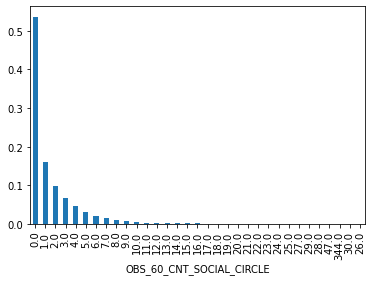

In [123]:
# Distribution of values
print(app_data['OBS_60_CNT_SOCIAL_CIRCLE'].value_counts(normalize=True))
print('-'*50)
app_data['OBS_60_CNT_SOCIAL_CIRCLE'].value_counts(normalize=True).plot.bar()
plt.xlabel('OBS_60_CNT_SOCIAL_CIRCLE')
plt.show()

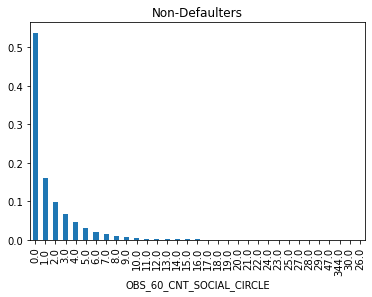

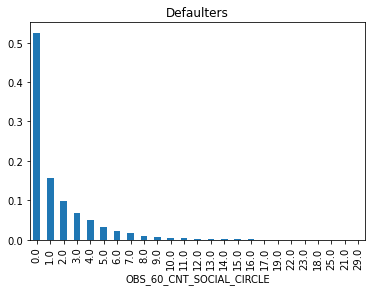

In [124]:
# Distribution of values for Defaulters and non-defaulters

app_data[app_data.TARGET==0].OBS_60_CNT_SOCIAL_CIRCLE.value_counts(normalize=True).plot.bar()
plt.title('Non-Defaulters')
plt.xlabel('OBS_60_CNT_SOCIAL_CIRCLE')
plt.show()
app_data[app_data.TARGET==1].OBS_60_CNT_SOCIAL_CIRCLE.value_counts(normalize=True).plot.bar()
plt.title('Defaulters')
plt.xlabel('OBS_60_CNT_SOCIAL_CIRCLE')
plt.show()

The trend is similar to the analysis of DEF_60_CNT_SOCIAL_CIRCLE



### 7. External Source Rating

In [125]:
# Storing the column headers of external source data in 'ext_cols'

ext_cols=['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']

In [126]:
# Generic study of the data

for col in ext_cols:
  print(app_data[col].describe())
  print('-'*50)

count    132831.000000
mean          0.501992
std           0.211062
min           0.014568
25%           0.333962
50%           0.505823
75%           0.674932
max           0.962693
Name: EXT_SOURCE_1, dtype: float64
--------------------------------------------------
count    3.044050e+05
mean     5.142266e-01
std      1.911256e-01
min      8.173617e-08
25%      3.921290e-01
50%      5.658164e-01
75%      6.635487e-01
max      8.549997e-01
Name: EXT_SOURCE_2, dtype: float64
--------------------------------------------------
count    244176.000000
mean          0.510779
std           0.194848
min           0.000527
25%           0.370650
50%           0.535276
75%           0.669057
max           0.896010
Name: EXT_SOURCE_3, dtype: float64
--------------------------------------------------


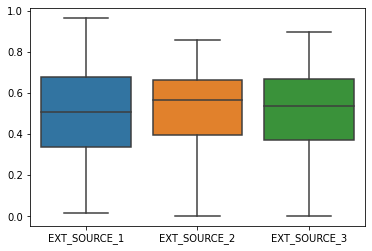

In [127]:
# boxplot to see value distribution 

sns.boxplot(data=app_data[ext_cols])
plt.show()

Distibution curve of normalised values of External data sources


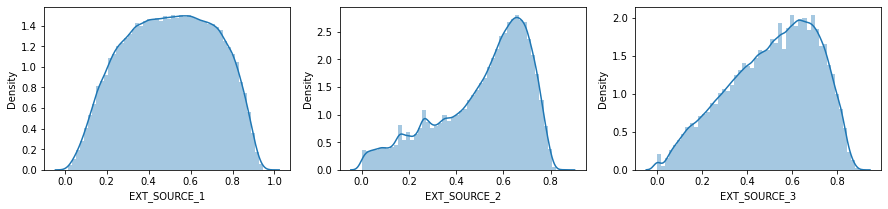

In [128]:
# Distribution plot to check the distribution of values

plt.figure(figsize=[15,3])

print('Distibution curve of normalised values of External data sources')
for i, col in enumerate(ext_cols):

  plt.subplot(1,3,i+1)
  sns.distplot(app_data[col])

plt.show()
print()

EXT_SOURCE vs TARGET

Distibution curve of normalised values of External data sources with payment difficulties (TARGET = 1)


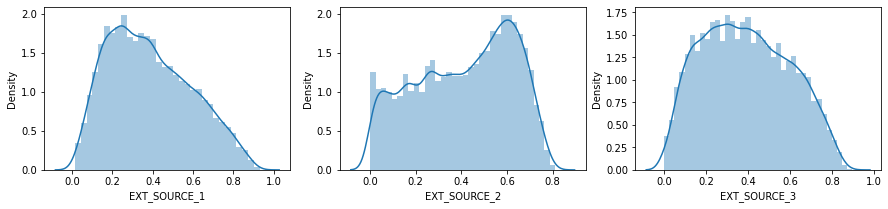


Distibution curve of normalised values of External data sources without payment difficulties (TARGET = 0)


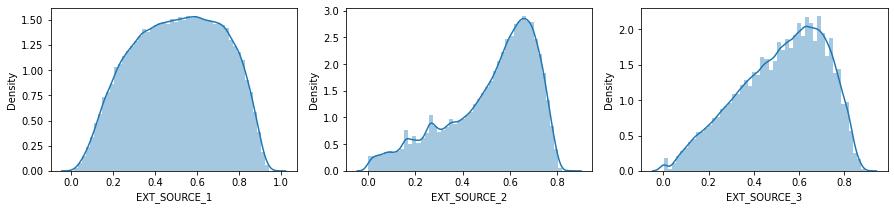

In [129]:
print('Distibution curve of normalised values of External data sources with payment difficulties (TARGET = 1)')
plt.figure(figsize=[15,3])
for i, col in enumerate(ext_cols):

  plt.subplot(1,3,i+1)
  sns.distplot(app_data[app_data.TARGET==1][col])

plt.show()
print()

print('Distibution curve of normalised values of External data sources without payment difficulties (TARGET = 0)')
plt.figure(figsize=[15,3])
for i, col in enumerate(ext_cols):

  plt.subplot(1,3,i+1)
  sns.distplot(app_data[app_data.TARGET==0][col])

plt.show()

Observations - 

Based on the score of all three external sources, applicants with a higher score align with the overall trend of score showing that they are less likely to have difficulty with payment

Whereas, applicants with payment difficulties have a distribution curve that shows an opposite trend of the distribution curve of scores of the external sources

Defaulters tend to have a lower rating of external source 1 and 3

### 8. Personal Information

In [130]:
# Storing all personal info column headers in 'personal_cols'

personal_cols = ['CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_HOUSING_TYPE', 'NAME_FAMILY_STATUS', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OWN_CAR_AGE', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'ORGANIZATION_TYPE', 'DAYS_LAST_PHONE_CHANGE', 'YEARS_EMPLOYED', 'YEARS_BIRTH']

Within personal information I have categorised the data into the following categories - 
1. Gender and Age
2. Asset details
3. Family details
4. Income and occupation
5. Education
6. Housing

#### 1. Gender and Age

##### Gender

F      65.835975
M      34.162711
XNA     0.001314
Name: CODE_GENDER, dtype: float64


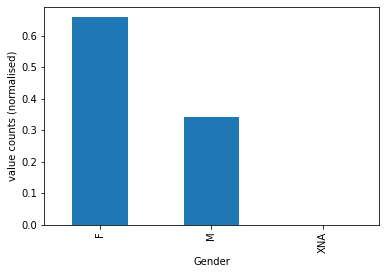

In [131]:
# Distribution of gender

print(app_data.CODE_GENDER.value_counts(normalize=True)*100)
app_data.CODE_GENDER.value_counts(normalize=True).plot.bar()
plt.ylabel('value counts (normalised)')
plt.xlabel('Gender')
plt.show()


Observation - 

Female applicants are significantly more than male applicants

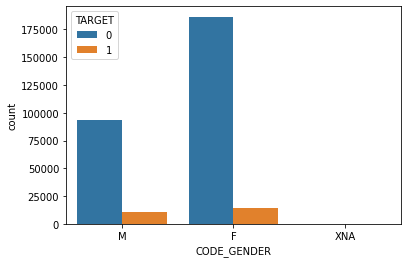

In [132]:
sns.countplot(app_data.CODE_GENDER, hue=app_data.TARGET)
plt.show()

Check for which gender has a higher percentage of applicants who have had difficulty with payments

In [133]:
print('Default rates within each gender category are -\n')
app_data.groupby(['CODE_GENDER']).TARGET.mean()*100

Default rates within each gender category are -



CODE_GENDER
F       7.012195
M      10.191071
XNA     0.000000
Name: TARGET, dtype: float64

Observations - 
Male applicants have a higher default rate than female applicants

##### Age

Distribution of age of applicants

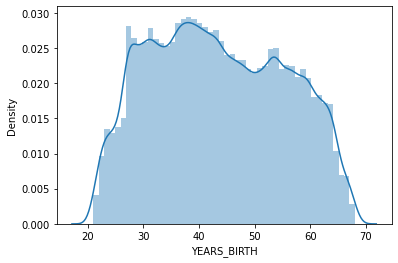

In [134]:
# Visualise using distribution curve
sns.distplot(app_data.YEARS_BIRTH)
plt.show()

Observation - The age of applicants is rather evenly distributed between 30-60 years

count    304405.00000
mean         43.44700
std          11.95047
min          20.00000
25%          34.00000
50%          43.00000
75%          53.00000
max          69.00000
Name: YEARS_BIRTH, dtype: float64
-------------------------------------------------- 



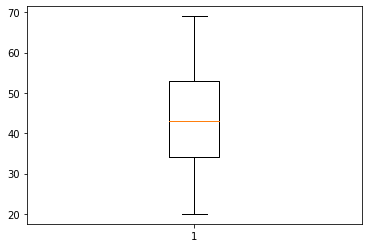

In [135]:
# Check the quantiles for age using describe() and boxplot to identify outliers

print(app_data.YEARS_BIRTH.describe())
print('-'*50, '\n')

plt.boxplot(app_data.YEARS_BIRTH)
plt.show()

Observation - 
1. There are no outliers
2. The mean and median values align, so it indicates an even distribution

Check for trends between age and payment defaults (TARGET)

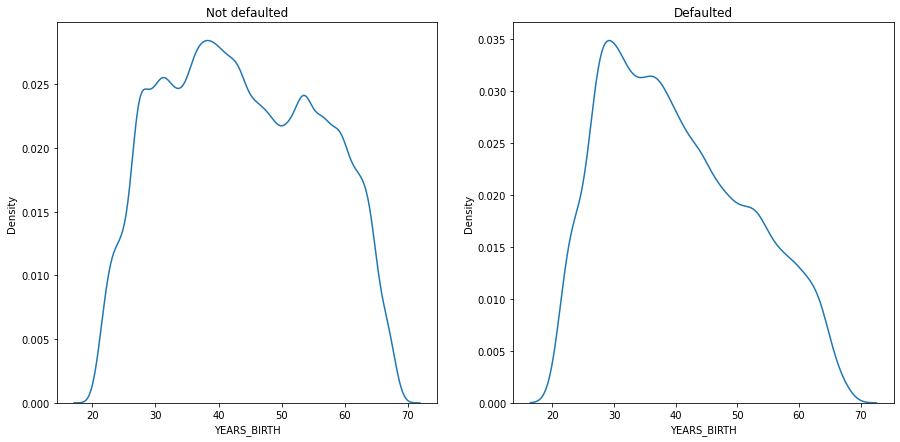

In [136]:
# Age vs TARGET

plt.figure(figsize=[15,7])

plt.subplot(1,2,1)
sns.distplot(app_data[app_data.TARGET==0].YEARS_BIRTH, hist=False)
plt.title(label ='Not defaulted')

plt.subplot(1,2,2)
sns.distplot(app_data[app_data.TARGET==1].YEARS_BIRTH, hist=False)
plt.title(label ='Defaulted')

plt.show()

Observations - 
Applicants of the younger age group tend default on their payments more than their older counterparts. 
As seen in the second plot(right) titled 'Defaulted', the age of the defaulters is inclined towards the younger applicants

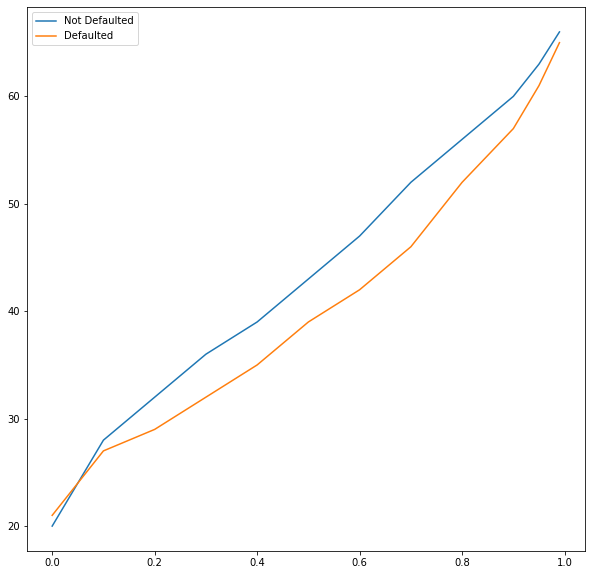

In [137]:
# Line plot to confirm the above observation

plt.figure(figsize=[10,10])
plt.subplot()
app_data[app_data.TARGET==0].YEARS_BIRTH.quantile([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.95, 0.99]).plot()
app_data[app_data.TARGET==1].YEARS_BIRTH.quantile([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.95, 0.99]).plot()
plt.legend(['Not Defaulted', 'Defaulted'])

plt.show()

As seen by the curve labelled as 'Defaulted', there is a dip in the age of the loan applicants. This confirms my observation

##### CODE_GENDER vs YEARS_BIRTH

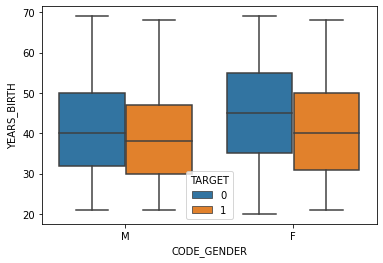

In [138]:
# Boxplot to see distribution of age between the genders

sns.boxplot(data=app_data[~(app_data.CODE_GENDER=='XNA')], x='CODE_GENDER', y='YEARS_BIRTH', hue='TARGET')
plt.show()

Observations - 

1. Median age of Female applicants is more than the median age of Male applicants
2. For both genders, distribution of defaulters is towards lower age and distribution of non-defaulters is towards higher age

#### 2. Asset Details

Categorised as

1. Car
2. Phones and email
3. Realty

##### 1. Car

They relevant columns are - FLAG_OWN_CAR and OWN_CAR_AGE

In [139]:
# FLAG_OWN_CAR

app_data.FLAG_OWN_CAR.value_counts(normalize=True)

N    0.659772
Y    0.340228
Name: FLAG_OWN_CAR, dtype: float64

Observation - Most applicant do not own a car

FLAG_OWN_CAR
N    8.525279
Y    7.269690
Name: TARGET, dtype: float64 
 --------------------------------------------------


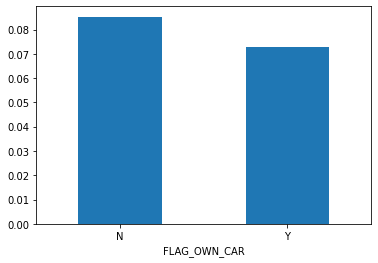

In [140]:
print(app_data.groupby(['FLAG_OWN_CAR']).TARGET.mean()*100, '\n', '-'*50)
app_data.groupby(['FLAG_OWN_CAR']).TARGET.mean().plot.bar()
plt.xticks(rotation=0)
plt.show()

Observation - Applicants who do not own a car have a slightly higher default rate

In [141]:
# OWN_CAR_AGE

app_data.OWN_CAR_AGE.describe()

count    103565.000000
mean         12.070709
std          11.937623
min           0.000000
25%           5.000000
50%           9.000000
75%          15.000000
max          91.000000
Name: OWN_CAR_AGE, dtype: float64

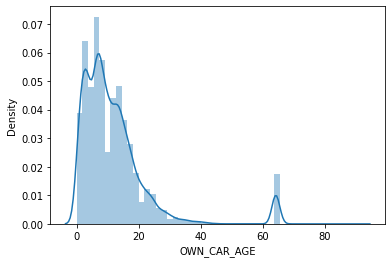

In [142]:
# Distribution of OWN_CAR_AGE

sns.distplot(app_data.OWN_CAR_AGE)

OWN_CAR_AGE vs TARGET

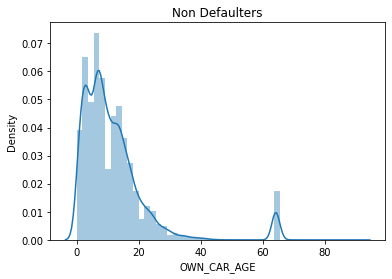

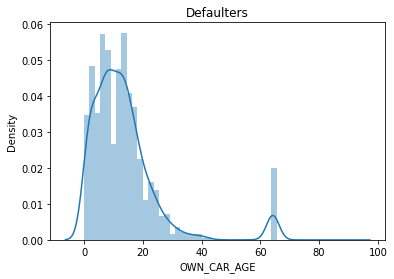

In [143]:
# Distribution for defaulters and non defaulters
sns.distplot(app_data[app_data.TARGET==0].OWN_CAR_AGE)
plt.title('Non Defaulters')
plt.show()

sns.distplot(app_data[app_data.TARGET==1].OWN_CAR_AGE)
plt.title('Defaulters')
plt.show()

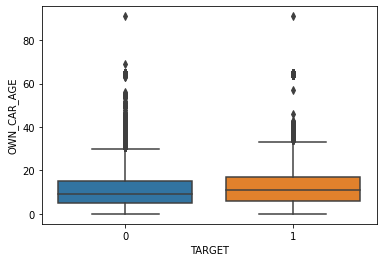

In [144]:
# Boxplot 
sns.boxplot(data=app_data, x='TARGET', y='OWN_CAR_AGE')

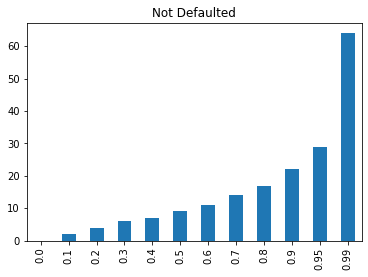

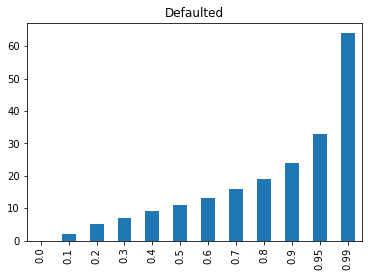

In [145]:
app_data[app_data.TARGET==0].OWN_CAR_AGE.quantile([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.95, 0.99]).plot.bar()
plt.title(label="Not Defaulted")
plt.show()
app_data[app_data.TARGET==1].OWN_CAR_AGE.quantile([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.95, 0.99]).plot.bar()
plt.title(label="Defaulted")
plt.show()

In [146]:
print(app_data[app_data.TARGET==0].OWN_CAR_AGE.quantile([0.6, 0.7, 0.8, 0.9, 0.95, 0.99]))
print(app_data[app_data.TARGET==1].OWN_CAR_AGE.quantile([0.6, 0.7, 0.8, 0.9, 0.95, 0.99]))

0.60    11.0
0.70    14.0
0.80    17.0
0.90    22.0
0.95    29.0
0.99    64.0
Name: OWN_CAR_AGE, dtype: float64
0.60    13.0
0.70    16.0
0.80    19.0
0.90    24.0
0.95    33.0
0.99    64.0
Name: OWN_CAR_AGE, dtype: float64


No trend observed

##### 2. Phones and email

In [147]:
# Identifying and storing the relevant columns
phone_cols = ['FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'DAYS_LAST_PHONE_CHANGE']

FLAG_MOBIL

In [148]:
# Data distribution

for col in phone_cols:
  print('Null Values are - ', app_data[col].isnull().sum())
  print('Value distribution is - \n', app_data[col].value_counts(normalize=True)*100, '\n', '-'*100)

Null Values are -  0
Value distribution is - 
 1    100.0
Name: FLAG_MOBIL, dtype: float64 
 ----------------------------------------------------------------------------------------------------
Null Values are -  0
Value distribution is - 
 1    81.978614
0    18.021386
Name: FLAG_EMP_PHONE, dtype: float64 
 ----------------------------------------------------------------------------------------------------
Null Values are -  0
Value distribution is - 
 0    80.030551
1    19.969449
Name: FLAG_WORK_PHONE, dtype: float64 
 ----------------------------------------------------------------------------------------------------
Null Values are -  0
Value distribution is - 
 1    99.814392
0     0.185608
Name: FLAG_CONT_MOBILE, dtype: float64 
 ----------------------------------------------------------------------------------------------------
Null Values are -  0
Value distribution is - 
 0    71.870042
1    28.129958
Name: FLAG_PHONE, dtype: float64 
 ----------------------------------------

Observations - 

FLAG_MOBIL - everyone has submitted the details. No impact on TARGET. Drop this column

DAYS_LAST_PHONE_CHANGE vs TARGET

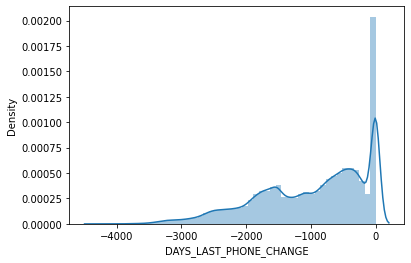

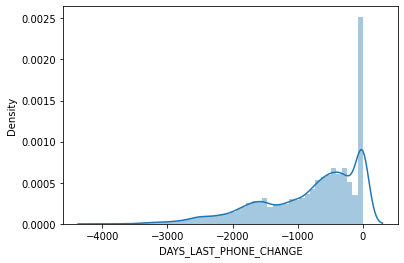

In [149]:
sns.distplot(app_data[app_data.TARGET==0].DAYS_LAST_PHONE_CHANGE)
plt.show()

sns.distplot(app_data[app_data.TARGET==1].DAYS_LAST_PHONE_CHANGE)
plt.show()

DAYS_LAST_PHONE_CHANGE has no impace on TARGET variable. Drop this column as well

Check the impact of all other columns on TARGET

In [150]:
for col in phone_cols[1:-1]:

  default_rate = app_data.groupby([col]).TARGET.mean()*100
  print(default_rate)
  print('-'*75)

FLAG_EMP_PHONE
0    5.408509
1    8.689345
Name: TARGET, dtype: float64
---------------------------------------------------------------------------
FLAG_WORK_PHONE
0    7.713337
1    9.640061
Name: TARGET, dtype: float64
---------------------------------------------------------------------------
FLAG_CONT_MOBILE
0    7.964602
1    8.098341
Name: TARGET, dtype: float64
---------------------------------------------------------------------------
FLAG_PHONE
0    8.505503
1    7.057189
Name: TARGET, dtype: float64
---------------------------------------------------------------------------
FLAG_EMAIL
0    8.109012
1    7.917076
Name: TARGET, dtype: float64
---------------------------------------------------------------------------


Similar trends seen for applicants who have and have not submitted the above details (FLAG_EMP_PHONE, FLAG_WORK_PHONE, FLAG_CONT_PHONE, FLAG_PHONE, FLAG_EMAIL). No impact on TARGET. 
Will drop these columns as well

In [151]:
# dropping all columns

app_data.drop(phone_cols, axis=1, inplace=True)

##### 3. Realty

Relevant column is FLAG_OWN_REALTY

In [152]:
# Distribution of data
app_data.FLAG_OWN_REALTY.value_counts(normalize=True)*100

Y    69.496887
N    30.503113
Name: FLAG_OWN_REALTY, dtype: float64

Observation - Most applicant do not own a house/flat

FLAG_OWN_REALTY
N    8.376681
Y    7.975817
Name: TARGET, dtype: float64 
 --------------------------------------------------


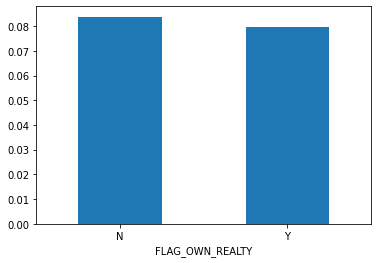

In [153]:
# FLAG_OWN_REALTY vs TARGET

print(app_data.groupby(['FLAG_OWN_REALTY']).TARGET.mean()*100, '\n', '-'*50)
app_data.groupby(['FLAG_OWN_REALTY']).TARGET.mean().plot.bar()
plt.xticks(rotation=0)
plt.show()

Observation - Applicants who do not own Realty have a slightly higher default rate

#### 3. Family Details

Relevant columns are - CNT_CHILDREN, NAME_FAMILY_STATUS, CNT_FAM_MEMBERS

###### NAME_FAMILY_STATUS 

In [154]:
# NAME_FAMILY_STATUS distribution

app_data.NAME_FAMILY_STATUS.value_counts(normalize=True)*100

Married                 63.913208
Single / not married    14.740888
Civil marriage           9.682167
Separated                6.433534
Widow                    5.230203
Name: NAME_FAMILY_STATUS, dtype: float64

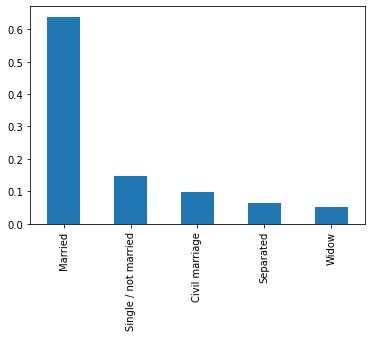

In [155]:
app_data.NAME_FAMILY_STATUS.value_counts(normalize=True).plot.bar()

Observation - Most applicants are Married

Default rate for each of the family status

In [156]:
app_data.groupby(['NAME_FAMILY_STATUS']).TARGET.mean()*100

NAME_FAMILY_STATUS
Civil marriage          9.965053
Married                 7.578834
Separated               8.210784
Single / not married    9.874755
Widow                   5.841342
Name: TARGET, dtype: float64

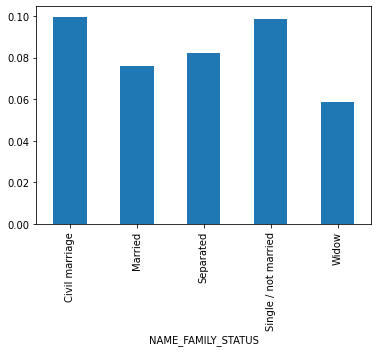

In [157]:
app_data.groupby(['NAME_FAMILY_STATUS']).TARGET.mean().plot.bar()

Observations - 
1. Civil Marriage and Single/Not Married have a slightly higher default rate
2. Marrier and separated have default rates lesser than that of civil marriage and single/not married
3. Widow have the lowest default rate

###### CNT_CHILDREN

In [158]:
# Distribution of values
app_data.CNT_CHILDREN.value_counts(normalize=True)*100

0    70.063567
1    19.881408
2     8.706164
3     1.208916
4     0.139945
Name: CNT_CHILDREN, dtype: float64

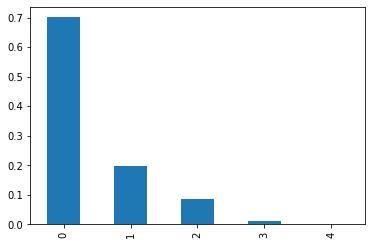

In [159]:
app_data.CNT_CHILDREN.value_counts(normalize=True).plot.bar()

Observation - There is a downward trend 
Most applicants have 0 children (~70%). The rate keeps decreasing as the countof children increases from 1 to 4

In [160]:
app_data.groupby(['CNT_CHILDREN']).TARGET.mean()*100

CNT_CHILDREN
0     7.739231
1     8.944151
2     8.754056
3     9.701087
4    12.910798
Name: TARGET, dtype: float64

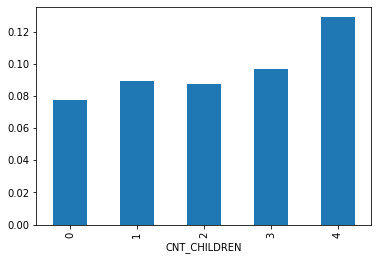

In [161]:
app_data.groupby(['CNT_CHILDREN']).TARGET.mean().plot.bar()

Observations - More the number of children, higher is the default rate

7.73% of Applicant with 0 children have defaulted in payments and this percentage increases as count of children increases from 1-4.
12.9% of Applicant with 4 children have defaulted in payments

###### CNT_FAM_MEMBERS

In [162]:
app_data.CNT_FAM_MEMBERS.value_counts(normalize=True)*100

2.0    51.546131
1.0    22.037417
3.0    17.114042
4.0     8.039947
5.0     1.130730
6.0     0.131732
Name: CNT_FAM_MEMBERS, dtype: float64

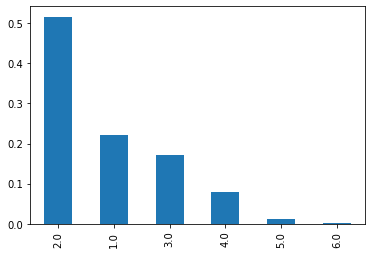

In [163]:
app_data.CNT_FAM_MEMBERS.value_counts(normalize=True).plot.bar()

In [164]:
app_data.groupby(['CNT_FAM_MEMBERS']).TARGET.mean()*100

CNT_FAM_MEMBERS
1.0     8.407495
2.0     7.605045
3.0     8.781864
4.0     8.674512
5.0     9.471238
6.0    13.466334
Name: TARGET, dtype: float64

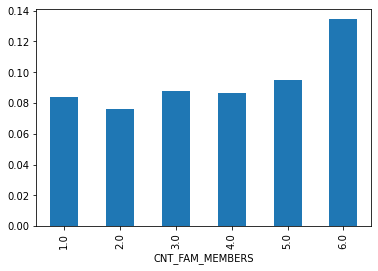

In [165]:
app_data.groupby(['CNT_FAM_MEMBERS']).TARGET.mean().plot.bar()

###### CNT_CHILDREN vs. CNT_FAM_MEMBERS

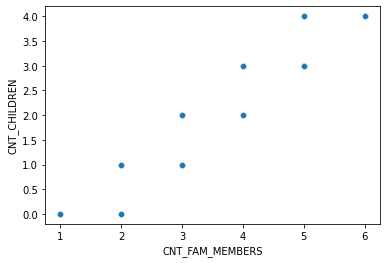

,CNT_FAM_MEMBERS,CNT_CHILDREN
CNT_FAM_MEMBERS,1.000000,0.876789
CNT_CHILDREN,0.876789,1.000000


In [166]:
sns.scatterplot(data=app_data, x='CNT_FAM_MEMBERS', y='CNT_CHILDREN')
plt.show()
print()
app_data[['CNT_FAM_MEMBERS', 'CNT_CHILDREN']].corr()

CNT_CHILDREN and CNT_FAM_MEMBERS are linearly correlated

##### NAME_TYPE_SUITE vs TARGET

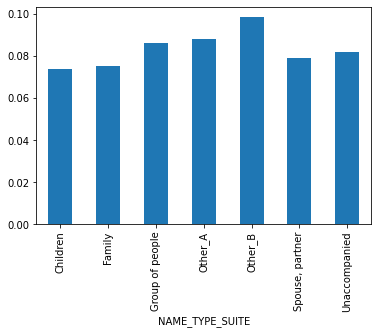

In [167]:
# Categorical value distribution

app_data.groupby(['NAME_TYPE_SUITE']).TARGET.mean().plot.bar()

Observations - No visibile trend

#### 4. Income and occupation

Relevant columns are - AMT_INCOME_TOTAL, NAME_INCOME_TYPE, OCCUPATION_TYPE, ORGANIZATION_TYPE, YEARS_EMPLOYED



##### Categorical values

Maternity leave          0.001643
Businessman              0.003285
Student                  0.005585
Unemployed               0.006242
State servant            7.060331
Pensioner               18.013830
Commercial associate    23.249618
Working                 51.659467
Name: NAME_INCOME_TYPE, dtype: float64



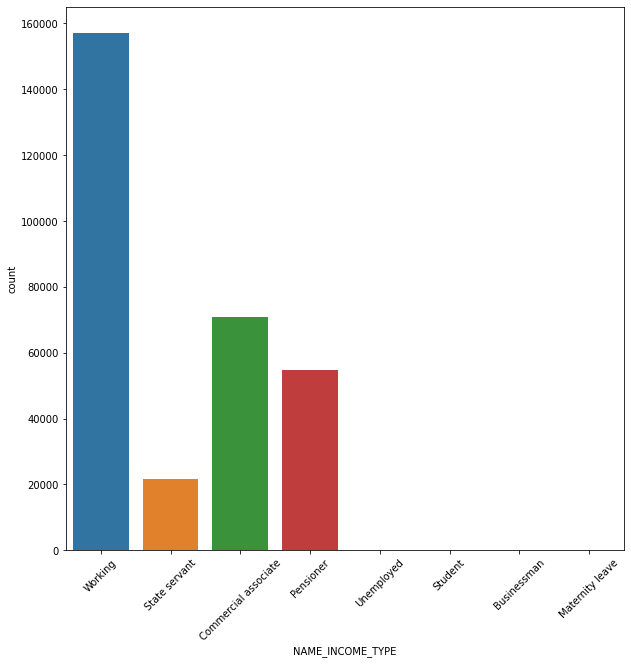

--------------------------------------------------
IT staff                  0.244496
HR staff                  0.266984
Realty agents             0.355022
Secretaries               0.618657
Waiters/barmen staff      0.637796
Low-skill Laborers        0.992818
Private service staff     1.257410
Cleaning staff            2.204774
Cooking staff             2.821518
Security staff            3.187545
Medicine staff            4.044957
Accountants               4.640169
High skill tech staff     5.385620
Drivers                   8.826752
Managers                 10.098995
Core staff               13.035344
Sales staff              15.206147
Laborers                 26.174994
Name: OCCUPATION_TYPE, dtype: float64



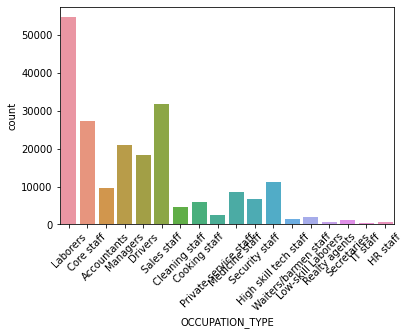

--------------------------------------------------
Industry: type 8           0.007884
Trade: type 5              0.015768
Industry: type 13          0.021025
Trade: type 4              0.021025
Religion                   0.027595
Industry: type 10          0.035808
Industry: type 6           0.036465
Transport: type 1          0.065373
Cleaning                   0.083441
Legal Services             0.099538
Mobile                     0.103152
Trade: type 1              0.111693
Industry: type 12          0.120892
Culture                    0.122534
Realtor                    0.127462
Advertising                0.140602
Industry: type 2           0.150129
Emergency                  0.181337
Telecom                    0.186594
Industry: type 5           0.193821
Insurance                  0.194149
Trade: type 6              0.205647
Industry: type 4           0.286132
Electricity                0.308799
Hotel                      0.315041
Industry: type 1           0.339679
Transport: ty

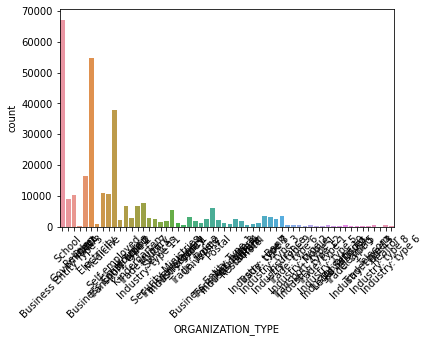

--------------------------------------------------


In [168]:
# Categorical data
plt.figure(figsize=[10,10])

for col in ['NAME_INCOME_TYPE', 'OCCUPATION_TYPE', 'ORGANIZATION_TYPE']:
  print(app_data[col].value_counts(normalize=True).mul(100).sort_values())
  print()
  sns.countplot(app_data[col])
  plt.xticks(rotation=45)

  plt.show()
  print('-'*50)

Observations - 
1. Most of the loan applicants are of working income type
2. Unemployed, Student, Businessman and Maternity leave are in total <1% of the entire data

NAME_INCOME_TYPE
Businessman              0.000000
Student                  0.000000
Pensioner                5.394365
State servant            5.764936
Commercial associate     7.518404
Working                  9.616925
Maternity leave         40.000000
Unemployed              42.105263
Name: TARGET, dtype: float64



<Figure size 720x720 with 0 Axes>

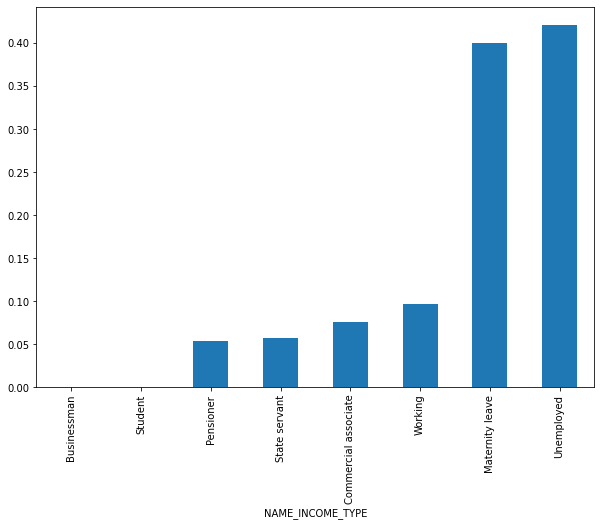

--------------------------------------------------
OCCUPATION_TYPE
Accountants               4.866983
HR staff                  6.093190
High skill tech staff     6.174485
Managers                  6.249112
Core staff                6.327999
Private service staff     6.544901
IT staff                  6.653620
Medicine staff            6.695056
Secretaries               7.115236
Realty agents             7.951482
Sales staff               9.628394
Cleaning staff            9.635417
Cooking staff            10.513821
Laborers                 10.605784
Security staff           10.762534
Drivers                  11.367086
Waiters/barmen staff     11.402851
Low-skill Laborers       17.301205
Name: TARGET, dtype: float64



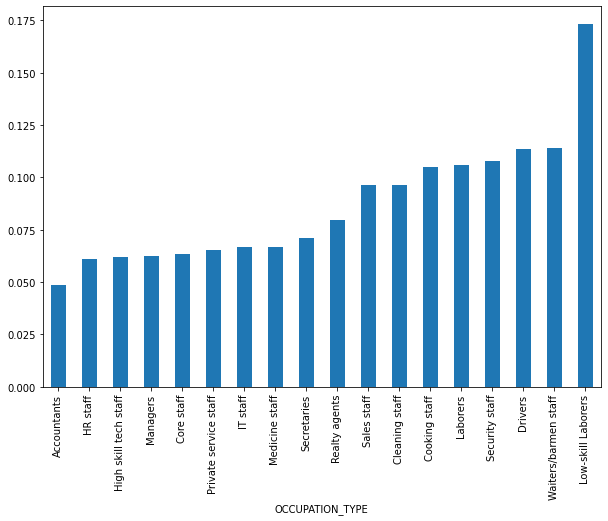

--------------------------------------------------
ORGANIZATION_TYPE
Trade: type 4              3.125000
Industry: type 12          3.804348
Trade: type 6              4.472843
Transport: type 1          4.522613
Security Ministries        4.869298
University                 4.958047
Police                     5.045278
Military                   5.174396
Bank                       5.254582
XNA                        5.407869
Culture                    5.630027
Insurance                  5.752961
Religion                   5.952381
School                     5.956433
Trade: type 5              6.250000
Industry: type 10          6.422018
Hotel                      6.465068
Services                   6.598334
Medicine                   6.600451
Industry: type 9           6.646617
Electricity                6.702128
Emergency                  6.884058
Industry: type 5           6.949153
Trade: type 2              7.001603
Government                 7.017374
Kindergarten               7.04

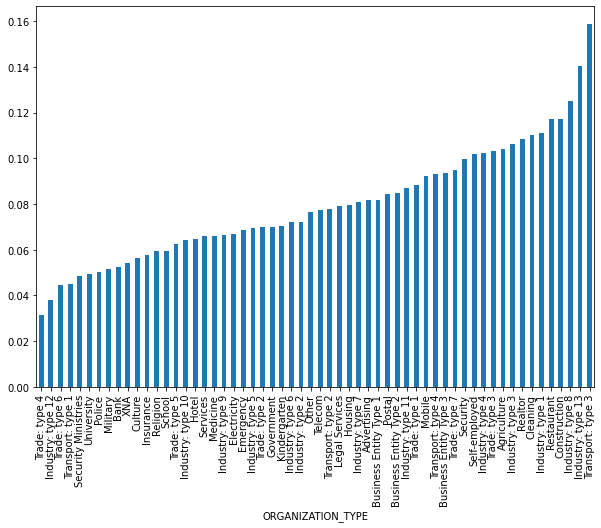

--------------------------------------------------


In [169]:
# Categorical data
plt.figure(figsize=[10,10])

for col in ['NAME_INCOME_TYPE', 'OCCUPATION_TYPE', 'ORGANIZATION_TYPE']:
  if i==2:
    plt.figure(figsize=[10,7])

  print(app_data.groupby([col]).TARGET.mean().sort_values().mul(100))
  print()
  app_data.groupby([col]).TARGET.mean().sort_values().plot.bar()
  plt.show()
  print('-'*50)

Observations - 
1. NAME_INCOME_TYPE - Default rates are highest for unemployed and decreased in the order Maternity>Working>Commercial associate>State Servant> Pensioner
2. There is no pattern evident in the occupation type and organisation type columns to derive any inferences

##### Numeric Values

###### AMT_INCOME_TOTAL

Checking the distribution of the values and looking for outliers


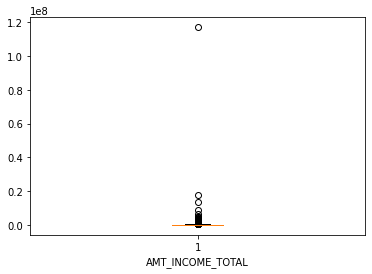

In [170]:
plt.boxplot(app_data.AMT_INCOME_TOTAL)
plt.xlabel('AMT_INCOME_TOTAL')
plt.show()

Too many outliers, lets look at the quantiles

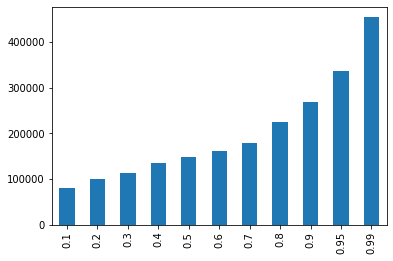

In [171]:
app_data.AMT_INCOME_TOTAL.quantile([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.95, 0.99]).plot.bar()
plt.show()


Substantial increase after  90%-ile.  Consider only 90 Percentile

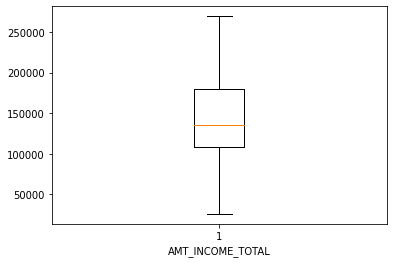

In [172]:
nin_income = float(app_data.AMT_INCOME_TOTAL.quantile([0.90]))
nin_income_df = app_data[app_data.AMT_INCOME_TOTAL < nin_income]
plt.boxplot(app_data[app_data.AMT_INCOME_TOTAL < nin_income].AMT_INCOME_TOTAL)
plt.xlabel('AMT_INCOME_TOTAL')
plt.show()

AMT_INCOME_TOTAL vs TARGET

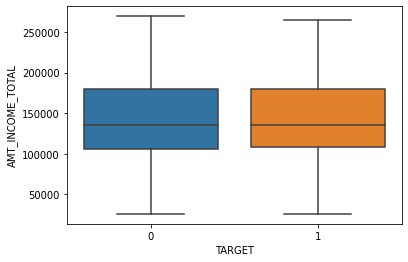

In [173]:
sns.boxplot(data=nin_income_df, x='TARGET', y='AMT_INCOME_TOTAL')

Range of income is similar and the quantiles align as well. Slight  difference in the max value

I will bin the incomes and check for variation in default rates in internvals of 50000

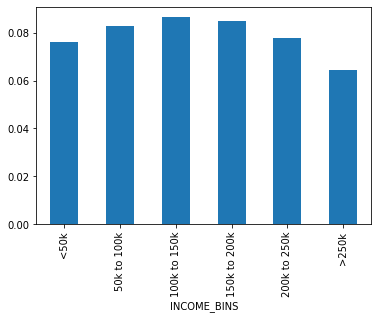

In [174]:
app_data['INCOME_BINS'] = pd.cut(x=app_data.AMT_INCOME_TOTAL, bins=[1,50000,100000,150000,200000,250000,9999999999999999], labels=['<50k', '50k to 100k', '100k to 150k', '150k to 200k', '200k to 250k', '>250k'])
app_data.groupby(['INCOME_BINS']).TARGET.mean().plot.bar()

There is only slight variation in the default rates

NAME_INCOME_TYPE vs AMT_INCOME_TOTAL 

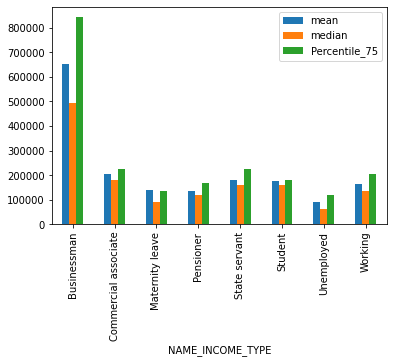

In [175]:
# Bar plot to show mean, median and 75th Percentile of AMT_INCOME_TOTAL across NAME_INCOME_TYPE
app_data.groupby(['NAME_INCOME_TYPE']).AMT_INCOME_TOTAL.aggregate(['mean', 'median', Percentile_75]).plot.bar()
plt.show()

Observations - 
1. Businessman has more income than other categories
2. Unemployed applicants have the 

###### YEARS_EMPLOYED

Checking the distribution of YEARS_EMPLOYED

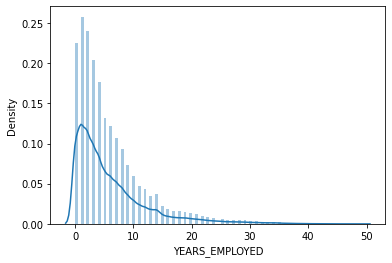

In [176]:
sns.distplot(app_data.YEARS_EMPLOYED, bins=100)

YEARS_EMPLOYED vs TARGET

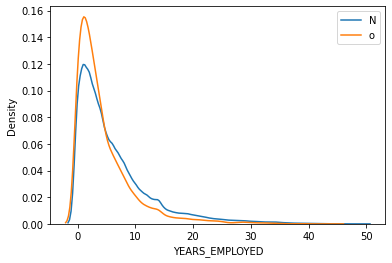

In [177]:
# Distribution of YEARS_EMPLOYED

sns.distplot(app_data[app_data.TARGET==0].YEARS_EMPLOYED, hist=False)
plt.legend('Defaulted')
sns.distplot(app_data[app_data.TARGET==1].YEARS_EMPLOYED, hist=False)
plt.legend('Not Defaulted')
plt.show()

Most applicants have been employed for 1 to 10 years and there is an exponential decrease in the number of applicants who have been employed for more than even 4-5 years

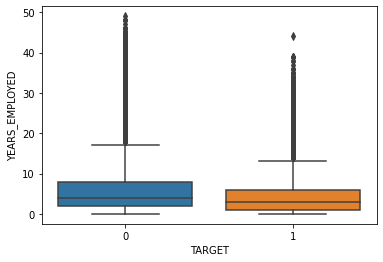

In [178]:
# Boxplot

sns.boxplot(data=app_data, x='TARGET', y='YEARS_EMPLOYED')
plt.show()

Although there are outliers, they are evenly distribute. As seen in the distribution curve as well. So will not exclude them

As observed above, while the median values are similar for both groups, there is variation in the other quantile values

YEARS_EMPLOYED vs TARGET

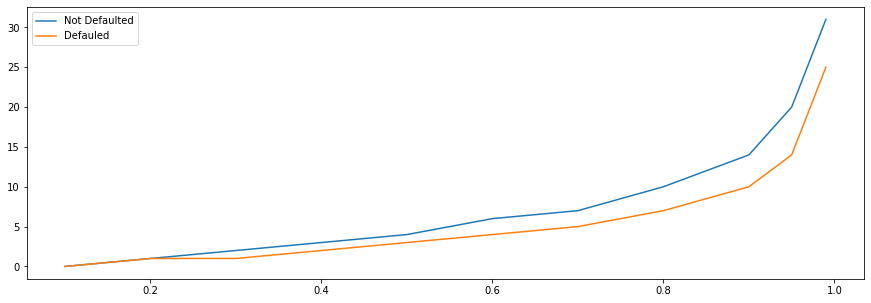

In [179]:
plt.figure(figsize=[15,5])

app_data[app_data.TARGET==0].YEARS_EMPLOYED.quantile([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.95, 0.99]).plot()
app_data[app_data.TARGET==1].YEARS_EMPLOYED.quantile([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.95, 0.99]).plot()
plt.legend(['Not Defaulted', 'Defauled'])

plt.show()



Evident from the values, applicants who have been employed for longer are less likely to default on their payments

#### 5. Education

Relevant columns are - NAME_EDUCATION_TYPE

Secondary / secondary special    71.115455
Higher education                 24.245331
Incomplete higher                 3.341929
Lower secondary                   1.244066
Academic degree                   0.053219
Name: NAME_EDUCATION_TYPE, dtype: float64


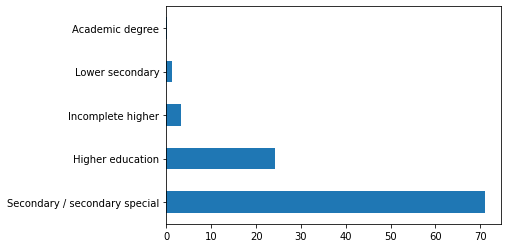

In [180]:
# Checking categorical value distribution
print(app_data.NAME_EDUCATION_TYPE.value_counts(normalize=True).mul(100))
app_data.NAME_EDUCATION_TYPE.value_counts(normalize=True).mul(100).plot.barh()
plt.show()

Observations - 
1. Negligible percentage of applicants have an Academic degree
2. 71% of applicants have completed Secondary / secondary special education
3. 24% of applicants have completed Higher education education
4. Very few applicants are from the group that have incomplete higher or just completed lower education

I will neglect Lower secondary and Academic degree in further analysis since there is no substantial data

Segment the data for defaulters and non-defaulters and check

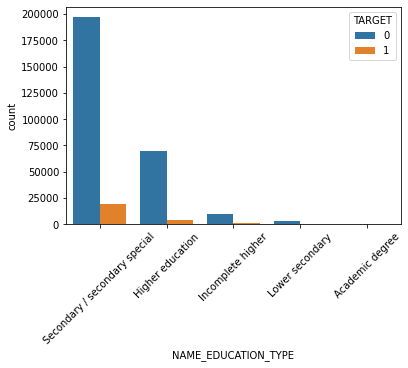

In [181]:
sns.countplot(app_data.NAME_EDUCATION_TYPE, hue=app_data.TARGET)
plt.xticks(rotation=45)
plt.show()

Default rates for each Education type category

NAME_EDUCATION_TYPE
Academic degree                   1.851852
Higher education                  5.380467
Incomplete higher                 8.502900
Lower secondary                  10.905730
Secondary / secondary special     8.961146
Name: TARGET, dtype: float64


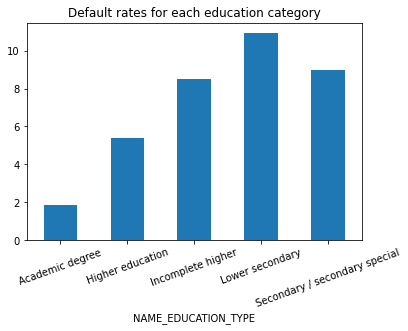

In [182]:
print(app_data.groupby(['NAME_EDUCATION_TYPE']).TARGET.mean().mul(100))
app_data.groupby(['NAME_EDUCATION_TYPE']).TARGET.mean().mul(100).plot.bar()
plt.title(label='Default rates for each education category')
plt.xticks(rotation=20)
plt.show()

Observations - Higher the level the information, less is the default rate

1. Applicants who have completed only Lower secondary education show the highest default rates (~10%)
2. Applicants who have completed Secondary / secondary special or incomplete higher education also have a high default rate of 8-9%
3. Higher education applicants have a low default rate and Academic degree appliants even more

#### 6. Housing

Relevant columns are - NAME_HOUSING_TYPE

In [183]:
app_data.NAME_HOUSING_TYPE.describe()

count                304405
unique                    6
top       House / apartment
freq                 270124
Name: NAME_HOUSING_TYPE, dtype: object

Distibution of categorical values

House / apartment      270124
With parents            14693
Municipal apartment     11074
Rented apartment         4828
Office apartment         2583
Co-op apartment          1103
Name: NAME_HOUSING_TYPE, dtype: int64
--------------------------------------------------
House / apartment      88.738358
With parents            4.826793
Municipal apartment     3.637917
Rented apartment        1.586045
Office apartment        0.848541
Co-op apartment         0.362346
Name: NAME_HOUSING_TYPE, dtype: float64
--------------------------------------------------


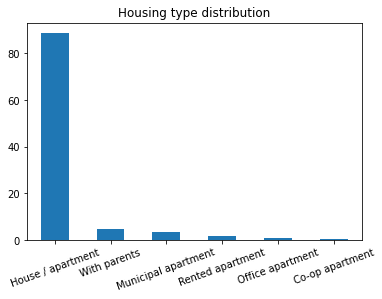

In [184]:
print(app_data.NAME_HOUSING_TYPE.value_counts())
print('-'*50)
print(app_data.NAME_HOUSING_TYPE.value_counts(normalize=True).mul(100))
print('-'*50)
app_data.NAME_HOUSING_TYPE.value_counts(normalize=True).mul(100).plot.bar()
plt.xticks(rotation=20)
plt.title(label='Housing type distribution')
plt.show()

Observations - 
1. Most applicants(89%) have their own house/apartment or live in a co-op apartment, and other categories have a substantially low percentage of applicants
2. Around 6% of applicants live in housing provided by a 3rd party like parents or government or rented
3. A very small percentage of applicants live in office provided apartments

Impact of housing type on default rates

NAME_HOUSING_TYPE
Office apartment        6.581494
House / apartment       7.821223
Co-op apartment         7.887579
Municipal apartment     8.506411
With parents           11.767508
Rented apartment       12.344656
Name: TARGET, dtype: float64
--------------------------------------------------


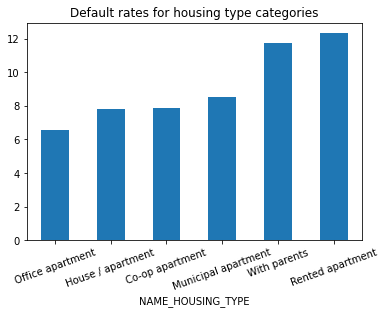

In [185]:
print(app_data.groupby(['NAME_HOUSING_TYPE']).TARGET.mean().mul(100).sort_values())
print('-'*50)
app_data.groupby(['NAME_HOUSING_TYPE']).TARGET.mean().mul(100).sort_values().plot.bar()
plt.xticks(rotation=20)
plt.title(label='Default rates for housing type categories')
plt.show()

1. Applicants living with parents or in rented apartments have a high default rate of ~12%
2. Applicants living in Muncipal apartments have a default rate of 8.5%
3. The applicants of other categories have a lesser default rate of ~7%
4. Applicants living in office apartments have the lowest default rate of 6.5%

# Analysing 'previous_application.csv'

## Data Cleaning

In [186]:
# Checking Data types and Non-null ccunts
prev_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

Previous data contains 37 columns out of the data type breakdown is - 


1.   Float - 15 columns
2.   Int - 6 columns
3.   Object - 16 columns

There is no need for the columns 'SK_ID_PREV'. Drop this column

There are inconsistencies in the number of non-null values

In [187]:
# Dropping the columnn 'SK_ID_PREV'

prev_data.drop(['SK_ID_PREV'], axis=1, inplace=True)

### Handling Null values

In [188]:
prev_data.isnull().sum()[prev_data.isnull().sum()>0].mul(100).div(len(prev_data)).sort_values(ascending=False)

RATE_INTEREST_PRIMARY        99.643698
RATE_INTEREST_PRIVILEGED     99.643698
AMT_DOWN_PAYMENT             53.636480
RATE_DOWN_PAYMENT            53.636480
NAME_TYPE_SUITE              49.119754
DAYS_FIRST_DRAWING           40.298129
DAYS_FIRST_DUE               40.298129
DAYS_LAST_DUE_1ST_VERSION    40.298129
DAYS_LAST_DUE                40.298129
DAYS_TERMINATION             40.298129
NFLAG_INSURED_ON_APPROVAL    40.298129
AMT_GOODS_PRICE              23.081773
AMT_ANNUITY                  22.286665
CNT_PAYMENT                  22.286366
PRODUCT_COMBINATION           0.020716
AMT_CREDIT                    0.000060
dtype: float64

Over 99% the data in Columns 'RATE_INTEREST_PRIVILEGED' and 'RATE_INTEREST_PRIMARY' have null values. Hence drop these columns

In [189]:
# Dropping columns
prev_data.drop(['RATE_INTEREST_PRIVILEGED', 'RATE_INTEREST_PRIMARY'], axis=1, inplace=True)

Check for columns that have very less null values. There are some columns which have less than 1% missing values. 
Identify those columns and drop the rows that have missing values for these columns

In [190]:
# Columns having Less than 1% missing 
a = prev_data.isnull().sum().mul(100).div(len(prev_data))
a[(a<1) & (a>0)]

AMT_CREDIT             0.000060
PRODUCT_COMBINATION    0.020716
dtype: float64

In [191]:
# Drop these rows which have missing values for 'AMT_CREDIT' and 'PRODUCT_COMBINATION'

prev_data = prev_data[~prev_data.AMT_CREDIT.isnull()]
prev_data = prev_data[~prev_data.PRODUCT_COMBINATION.isnull()]

In [192]:
prev_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1669867 entries, 0 to 1670213
Data columns (total 34 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_CURR                   1669867 non-null  int64  
 1   NAME_CONTRACT_TYPE           1669867 non-null  object 
 2   AMT_ANNUITY                  1297978 non-null  float64
 3   AMT_APPLICATION              1669867 non-null  float64
 4   AMT_CREDIT                   1669867 non-null  float64
 5   AMT_DOWN_PAYMENT             774370 non-null   float64
 6   AMT_GOODS_PRICE              1284699 non-null  float64
 7   WEEKDAY_APPR_PROCESS_START   1669867 non-null  object 
 8   HOUR_APPR_PROCESS_START      1669867 non-null  int64  
 9   FLAG_LAST_APPL_PER_CONTRACT  1669867 non-null  object 
 10  NFLAG_LAST_APPL_IN_DAY       1669867 non-null  int64  
 11  RATE_DOWN_PAYMENT            774370 non-null   float64
 12  NAME_CASH_LOAN_PURPOSE       1669867 non-n

### Merging Data

In [193]:
# Finding common columns in previous data and application data
common_cols = list(set(prev_data) & set(app_data_raw))  # common_cols is a list of common column headers between previous data and application data
common_cols

['AMT_CREDIT',
 'AMT_GOODS_PRICE',
 'WEEKDAY_APPR_PROCESS_START',
 'HOUR_APPR_PROCESS_START',
 'NAME_TYPE_SUITE',
 'NAME_CONTRACT_TYPE',
 'SK_ID_CURR',
 'AMT_ANNUITY']

Only 2 columns would be required from app_data - 'SK_ID_CURR' and 'TARGET

In [194]:
# Merging 'app_data_raw' with 'prev_data' into 'merged_data'

merged_data = pd.merge(left=app_data_raw[['SK_ID_CURR', 'TARGET']], right=prev_data, how='left', on='SK_ID_CURR')
merged_data.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1429841 entries, 0 to 1429840
Data columns (total 35 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_CURR                   1429841 non-null  int64  
 1   TARGET                       1429841 non-null  int64  
 2   NAME_CONTRACT_TYPE           1413387 non-null  object 
 3   AMT_ANNUITY                  1106482 non-null  float64
 4   AMT_APPLICATION              1413387 non-null  float64
 5   AMT_CREDIT                   1413387 non-null  float64
 6   AMT_DOWN_PAYMENT             664161 non-null   float64
 7   AMT_GOODS_PRICE              1094176 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1413387 non-null  object 
 9   HOUR_APPR_PROCESS_START      1413387 non-null  float64
 10  FLAG_LAST_APPL_PER_CONTRACT  1413387 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1413387 non-null  float64
 12  RATE_DOWN_PAYMENT            664161 non-nu

### Handling outliers

Outlier Analysis for 
1. AMT_ANNUITY
2. AMT_DOWN_PAYMENT



#### AMT_ANNUITY

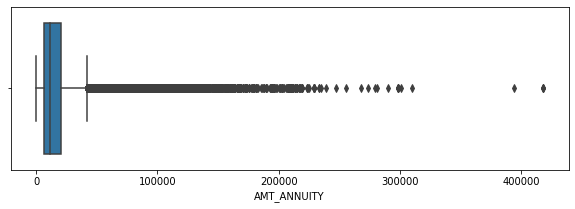

In [195]:
# Using boxplot
plt.figure(figsize=[10,3])
sns.boxplot(merged_data.AMT_ANNUITY)
plt.show()

In [196]:
# Limit value to 99%-ile

merged_data = merged_data[merged_data.AMT_ANNUITY<np.nanpercentile(merged_data.AMT_ANNUITY, 99)]

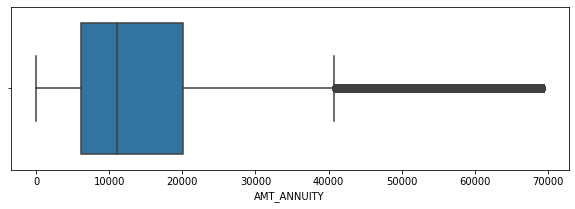

In [197]:
# Boxplot after capping values
plt.figure(figsize=[10,3])
sns.boxplot(merged_data.AMT_ANNUITY)
plt.show()

#### AMT_DOWN_PAYMENT

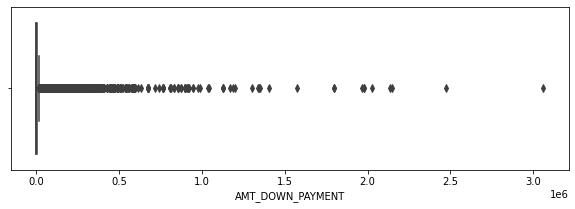

In [198]:
# Using boxplot
plt.figure(figsize=[10,3])
sns.boxplot(merged_data.AMT_DOWN_PAYMENT)
plt.show()

In [199]:
# Limit value to 99%-ile

merged_data = merged_data[merged_data.AMT_DOWN_PAYMENT<np.nanpercentile(merged_data.AMT_DOWN_PAYMENT, 99)]

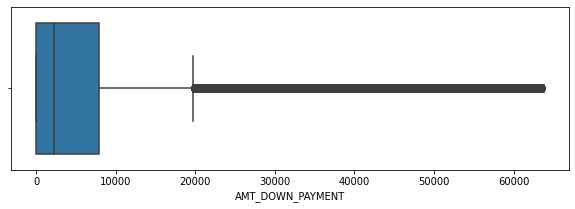

In [200]:
# Boxplot after capping values
plt.figure(figsize=[10,3])
sns.boxplot(merged_data.AMT_DOWN_PAYMENT)
plt.show()

## Data Analysis

In [201]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 628193 entries, 0 to 1429840
Data columns (total 35 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   628193 non-null  int64  
 1   TARGET                       628193 non-null  int64  
 2   NAME_CONTRACT_TYPE           628193 non-null  object 
 3   AMT_ANNUITY                  628193 non-null  float64
 4   AMT_APPLICATION              628193 non-null  float64
 5   AMT_CREDIT                   628193 non-null  float64
 6   AMT_DOWN_PAYMENT             628193 non-null  float64
 7   AMT_GOODS_PRICE              628193 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   628193 non-null  object 
 9   HOUR_APPR_PROCESS_START      628193 non-null  float64
 10  FLAG_LAST_APPL_PER_CONTRACT  628193 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       628193 non-null  float64
 12  RATE_DOWN_PAYMENT            628193 non-null  float64
 13

In [202]:
merged_data.CNT_PAYMENT.dtype

dtype('float64')

### Data Imbalance

#### Data Imbalance for 'TARGET'

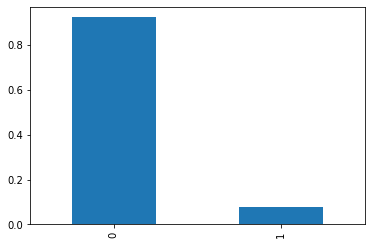

--------------------------------------------------
0    92.385143
1     7.614857
Name: TARGET, dtype: float64


In [203]:
merged_data.TARGET.value_counts(normalize=True).plot.bar()
plt.show()
print('-'*50)
print(merged_data.TARGET.value_counts(normalize=True)*100)

Data imbalance ratio between **Defaulters and Non-defaulters is nearly 7.61 : 92.38 (or) 1 : 12.13**

#### Data imbalance for 'NAME_CONTRACT_STATUS'

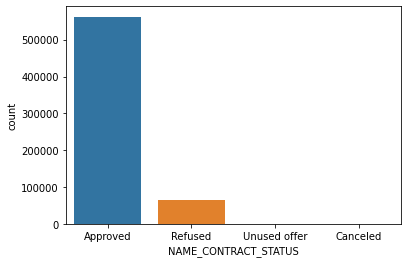

--------------------------------------------------
Approved        89.500997
Refused         10.325808
Unused offer     0.124484
Canceled         0.048711
Name: NAME_CONTRACT_STATUS, dtype: float64


In [204]:
sns.countplot(merged_data.NAME_CONTRACT_STATUS)
plt.show()
print('-'*50)
print(merged_data.NAME_CONTRACT_STATUS.value_counts(normalize=True)*100)

Data is highly imbalanced. Most of the applicants were either Approved or Rejected. Less than 1% were cancelled and unused offer

### Data Analysis - Numeric Columns

All numerical columns have data type as float

In [205]:
# Store all relevent columns in 'num_cols'

num_cols=[]

for col in merged_data.columns:
  if merged_data[col].dtype=='float64':
    num_cols.append(col)

num_cols

['AMT_ANNUITY',
 'AMT_APPLICATION',
 'AMT_CREDIT',
 'AMT_DOWN_PAYMENT',
 'AMT_GOODS_PRICE',
 'HOUR_APPR_PROCESS_START',
 'NFLAG_LAST_APPL_IN_DAY',
 'RATE_DOWN_PAYMENT',
 'DAYS_DECISION',
 'SELLERPLACE_AREA',
 'CNT_PAYMENT',
 'DAYS_FIRST_DRAWING',
 'DAYS_FIRST_DUE',
 'DAYS_LAST_DUE_1ST_VERSION',
 'DAYS_LAST_DUE',
 'DAYS_TERMINATION',
 'NFLAG_INSURED_ON_APPROVAL']

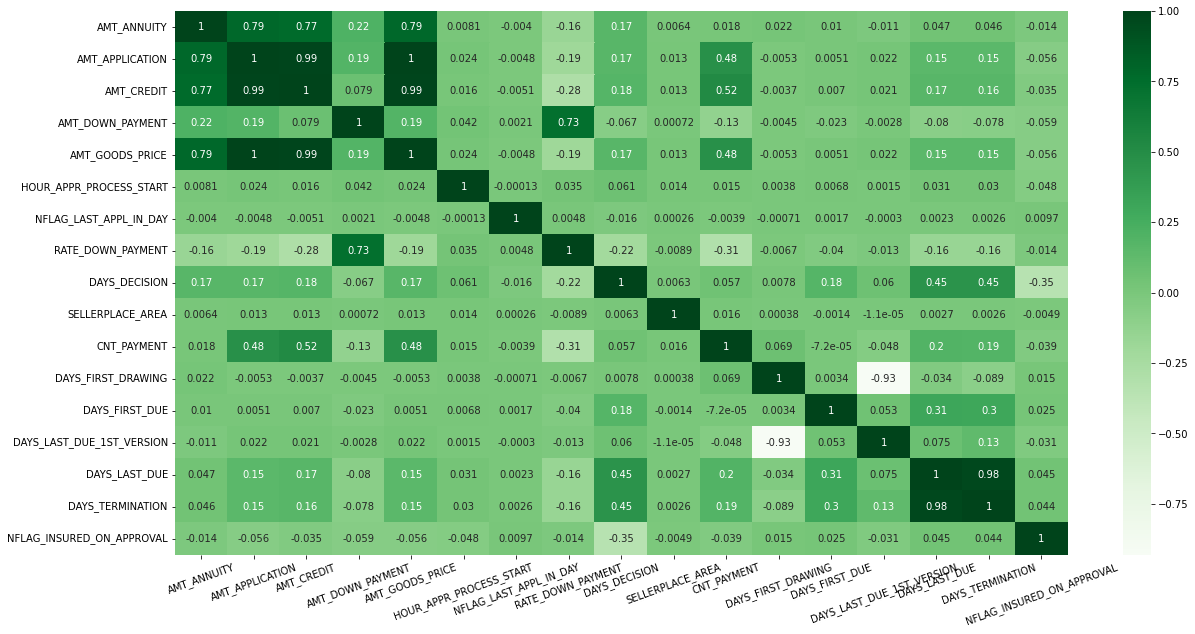

In [206]:
# Heatmap to check collinearity
plt.figure(figsize=[20,10])
sns.heatmap(merged_data[num_cols].corr(), cmap='Greens', annot=True)
plt.xticks(rotation=20)
plt.show()

Observations - 
1. AMT_ANNUITY, AMT_APPLICATION, AMT_CREDIT and AMT_GOODS_PRICE are highly correlated
2. DAYS_TERMINATION and DAYS_LAST_DUE are highly correlated

#### Amount Related columns

Relevant columns are - AMT_ANNUITY, AMT_APPLICATION, AMT_CREDIT, AMT_DOWN_PAYMENT, AMT_GOODS_PRICE

In [207]:
# amt_cols stores the relevant column headers
amt_cols = ['AMT_ANNUITY', 'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_DOWN_PAYMENT', 'AMT_GOODS_PRICE']

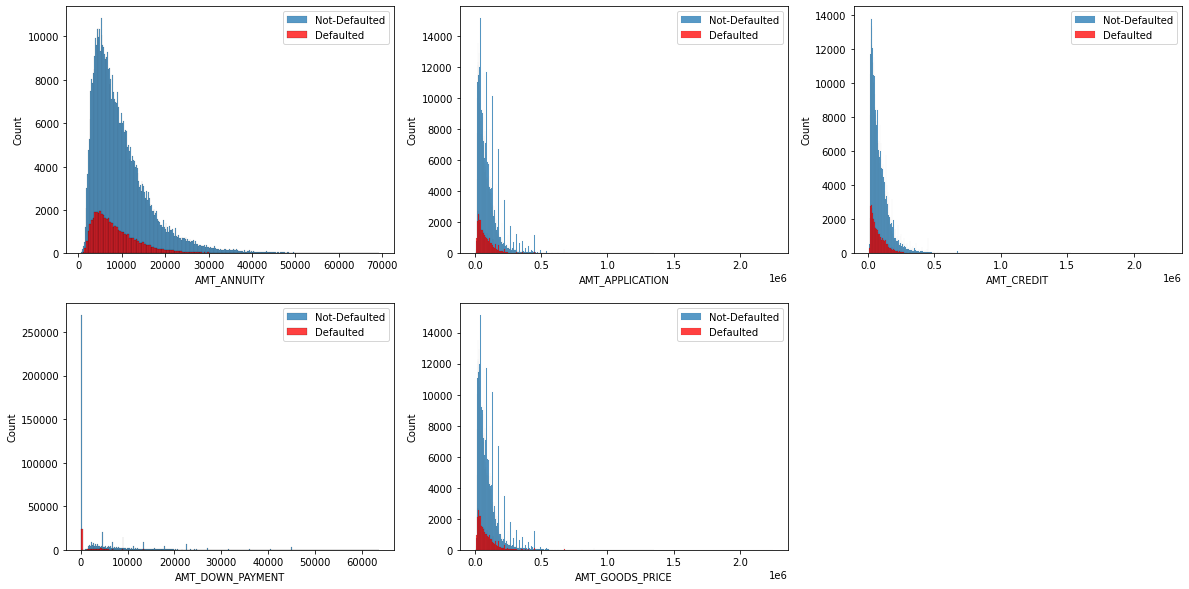

In [208]:
# distribution chart for Defaulters and Non-Defaulters

plt.figure(figsize=[20, 10])

for i, col in enumerate(amt_cols):
  plt.subplot(2,3,i+1)
  sns.histplot(merged_data[merged_data.TARGET==0][col])
  sns.histplot(merged_data[merged_data.TARGET==1][col], color='RED')
  plt.legend(['Not-Defaulted', 'Defaulted'])


plt.show()

Observations - 
1. Number of applicants are less for large loan amounts (AMT_CREDIT) which is highly correlated with the other columns

AMT_ DOWN_PAYMENT vs TARGET

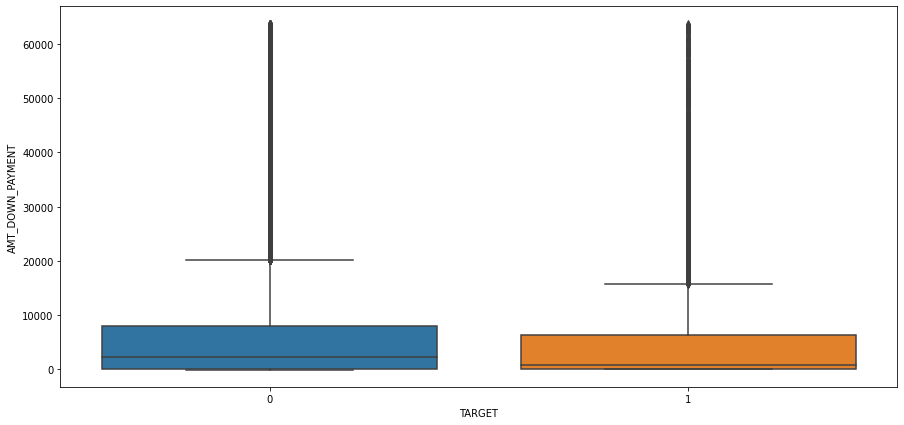

In [209]:
plt.figure(figsize=[15,7])

sns.boxplot(data = merged_data, y='AMT_DOWN_PAYMENT', x='TARGET')
plt.xlabel('TARGET')
plt.ylabel('AMT_DOWN_PAYMENT')

plt.show()

AMT_ DOWN_PAYMENT vs AMT_ANNUITY vs TARGET

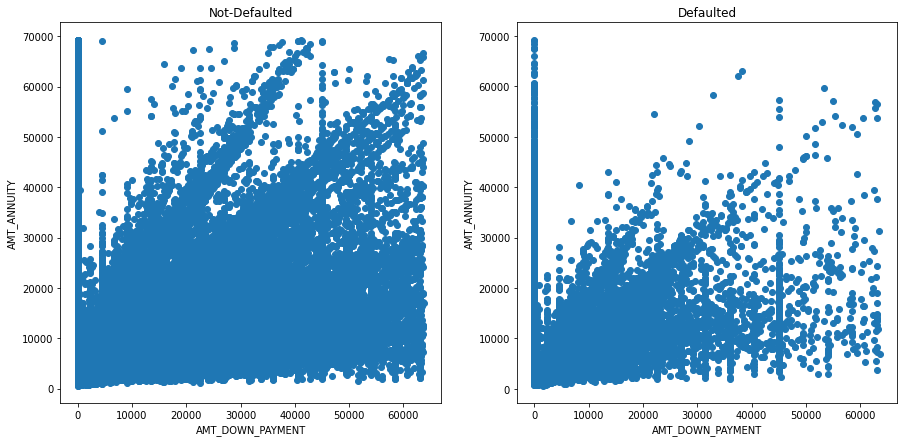

In [210]:
plt.figure(figsize=[15,7])

plt.subplot(1,2,1)
plt.scatter(data=merged_data[merged_data.TARGET==0], x='AMT_DOWN_PAYMENT', y='AMT_ANNUITY')
plt.xlabel('AMT_DOWN_PAYMENT')
plt.ylabel('AMT_ANNUITY')
plt.title('Not-Defaulted')

plt.subplot(1,2,2)
plt.scatter(data=merged_data[merged_data.TARGET==1], x='AMT_DOWN_PAYMENT', y='AMT_ANNUITY')
plt.xlabel('AMT_DOWN_PAYMENT')
plt.ylabel('AMT_ANNUITY')
plt.title('Defaulted')

plt.show()

Observation - 
1. There are less defaulters for higher values of AMT_DOWN_PAYMENT and AMT_ANNUITY

#### RATE_DOWN_PAYMENT

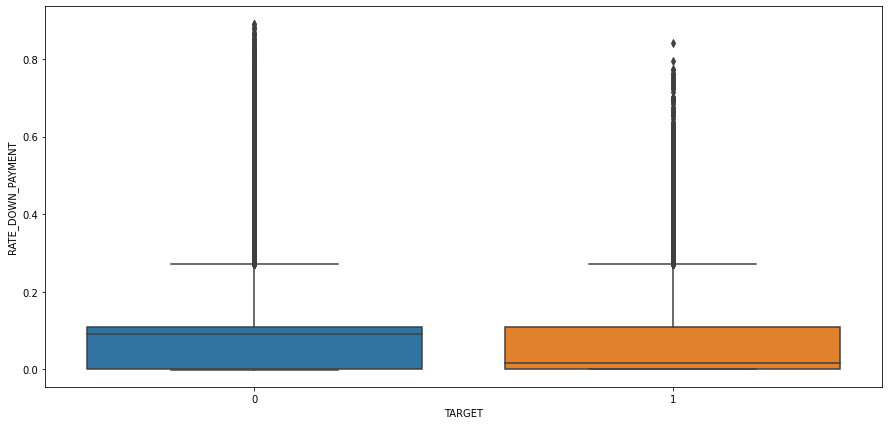

In [211]:
# boxplot for defaulters and non-defaulters
plt.figure(figsize=[15,7])
sns.boxplot(data=merged_data, y='RATE_DOWN_PAYMENT', x='TARGET')

Observations -
1. Median of defaulted group is higher. For lower rate of downpayments, the cases of default are high. 

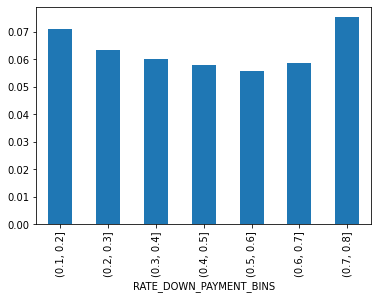

In [212]:
merged_data['RATE_DOWN_PAYMENT_BINS'] = pd.cut(merged_data.RATE_DOWN_PAYMENT, bins=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8])
merged_data.groupby(['RATE_DOWN_PAYMENT_BINS']).TARGET.mean().plot.bar()

Observations - 
1. For lower rate of downpayment, the rate of default is high
2. Cannot comment on very high down payment rates(>0.5) as these values are outliers

#### CNT_PAYMENT

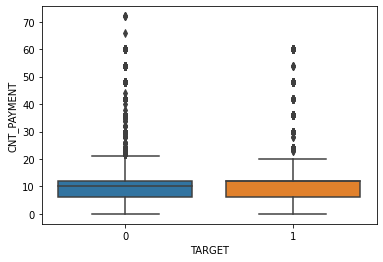

In [213]:
# Boxplot for non-defaulters and defaulters
sns.boxplot(data=merged_data, x='TARGET', y='CNT_PAYMENT')
plt.show()

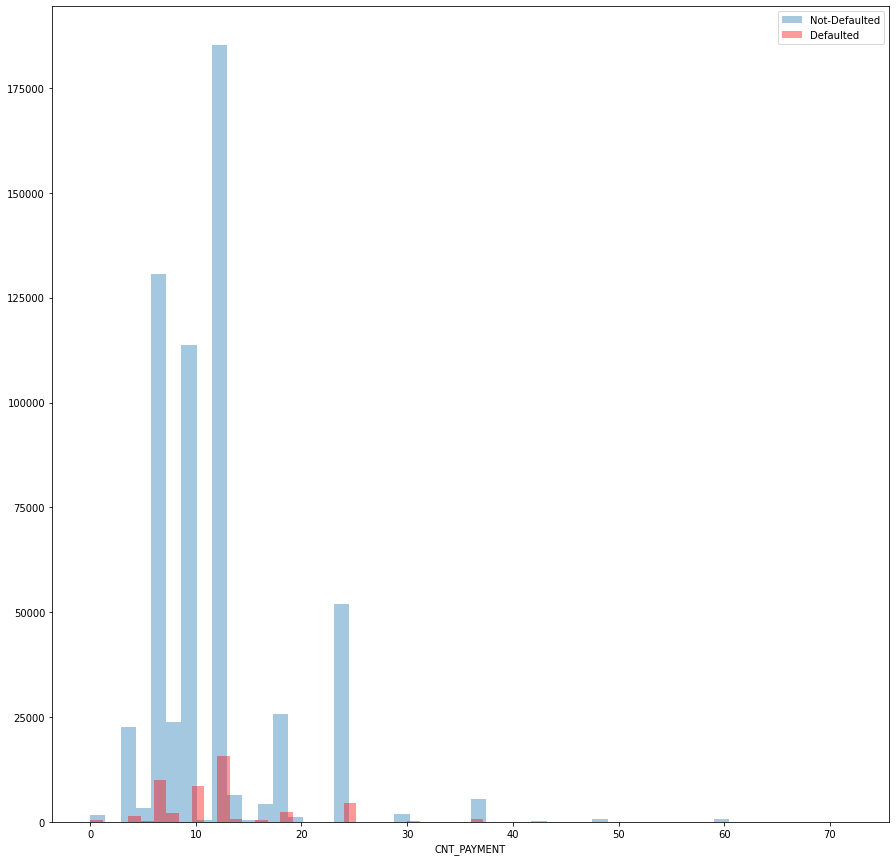

In [214]:
# Distribution plot to see trend in defaulters and non-defaulters

plt.figure(figsize=[15,15])
sns.distplot(merged_data[merged_data.TARGET==0].CNT_PAYMENT, kde=False, norm_hist=False)
sns.distplot(merged_data[merged_data.TARGET==1].CNT_PAYMENT, color='RED', kde=False, norm_hist=False)
plt.legend(['Not-Defaulted', 'Defaulted'])
plt.show()

Observations - 
1. The trend is similar. No impact on TARGET

#### HOUR_APPR_PROCESS_START

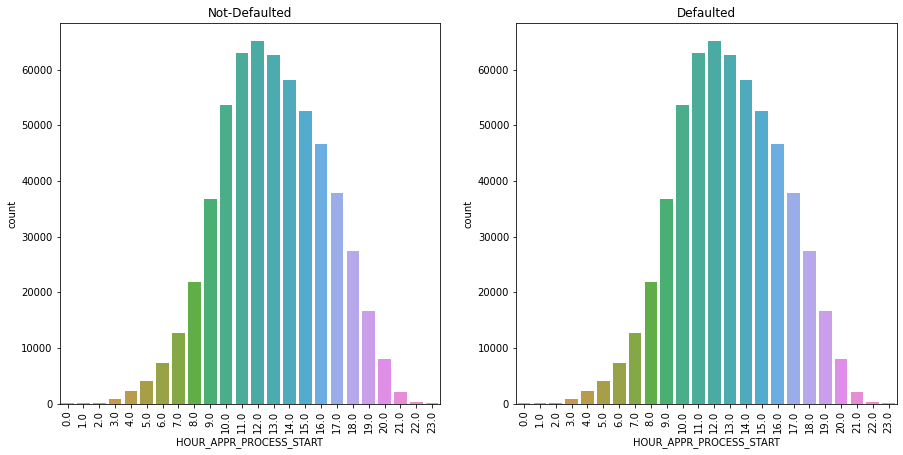

In [215]:
# Bar plot for defaulters and non-defaulters

plt.figure(figsize=[15,7])

plt.subplot(1,2,1)
sns.countplot(merged_data[merged_data.TARGET==0].HOUR_APPR_PROCESS_START)
plt.xticks(rotation=90)
plt.title('Not-Defaulted')

plt.subplot(1,2,2)
sns.countplot(merged_data[merged_data.TARGET==0].HOUR_APPR_PROCESS_START)
plt.xticks(rotation=90)
plt.title('Defaulted')

plt.show()

Observations -
1. Most applications were submitted between 10 to 16 hours.
2. No impact on TARGET

#### NFLAG_INSURED_ON_APPROVAL

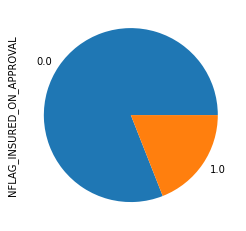

In [216]:
# Distribution of values

merged_data.NFLAG_INSURED_ON_APPROVAL.value_counts().plot.pie()
plt.show()

Observations -
1. Most of the applicants did not inquire for insurance in the previous loan

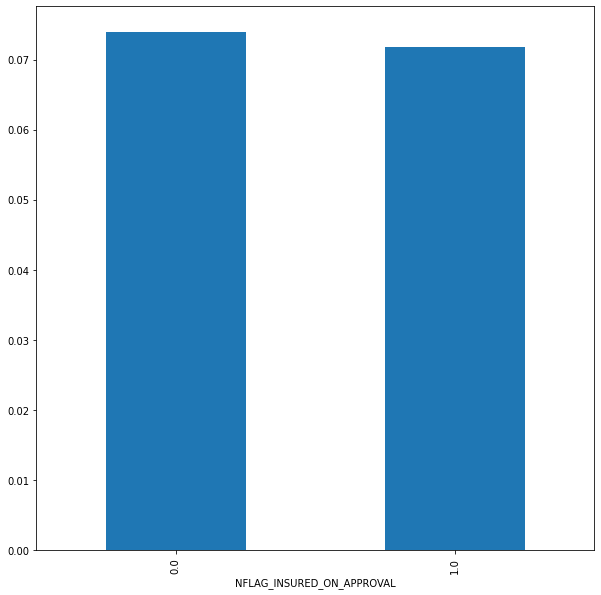

In [217]:
# Rate of default for each category of NFLAG_INSURED_ON_APPROVAL

plt.figure(figsize=[10,10])

merged_data.groupby(['NFLAG_INSURED_ON_APPROVAL']).TARGET.mean().plot.bar()
plt.show()

Observations -
1. No impact on TARGET

### Data Analysis - Categorical Columns

In [218]:
# Store all relevent columns in 'cat_cols'

cat_cols=[]

for col in merged_data.columns:
  if merged_data[col].dtype=='object':
    cat_cols.append(col)

cat_cols

['NAME_CONTRACT_TYPE',
 'WEEKDAY_APPR_PROCESS_START',
 'FLAG_LAST_APPL_PER_CONTRACT',
 'NAME_CASH_LOAN_PURPOSE',
 'NAME_CONTRACT_STATUS',
 'NAME_PAYMENT_TYPE',
 'CODE_REJECT_REASON',
 'NAME_TYPE_SUITE',
 'NAME_CLIENT_TYPE',
 'NAME_GOODS_CATEGORY',
 'NAME_PORTFOLIO',
 'NAME_PRODUCT_TYPE',
 'CHANNEL_TYPE',
 'NAME_SELLER_INDUSTRY',
 'NAME_YIELD_GROUP',
 'PRODUCT_COMBINATION']

Run For-loops to run 3 types of analysis
1. Value distribution with each category
2. Segmented analysis for TARGET=0 and 1
3. Rate of default within each category

#### Value Distribution

Consumer loans     93.213391
Cash loans          6.452794
Revolving loans     0.333815
Name: NAME_CONTRACT_TYPE, dtype: float64
--------------------------------------------------

SATURDAY     17.312991
SUNDAY       14.344795
FRIDAY       14.174147
WEDNESDAY    13.691970
THURSDAY     13.656631
TUESDAY      13.477068
MONDAY       13.342396
Name: WEEKDAY_APPR_PROCESS_START, dtype: float64
--------------------------------------------------

Y    100.0
Name: FLAG_LAST_APPL_PER_CONTRACT, dtype: float64
--------------------------------------------------

XAP                                 93.547206
XNA                                  5.471567
Other                                0.342729
Repairs                              0.253266
Everyday expenses                    0.124643
Education                            0.072271
Medicine                             0.064471
Purchase of electronic equipment     0.038523
Journey                              0.036135
Buying a used car              

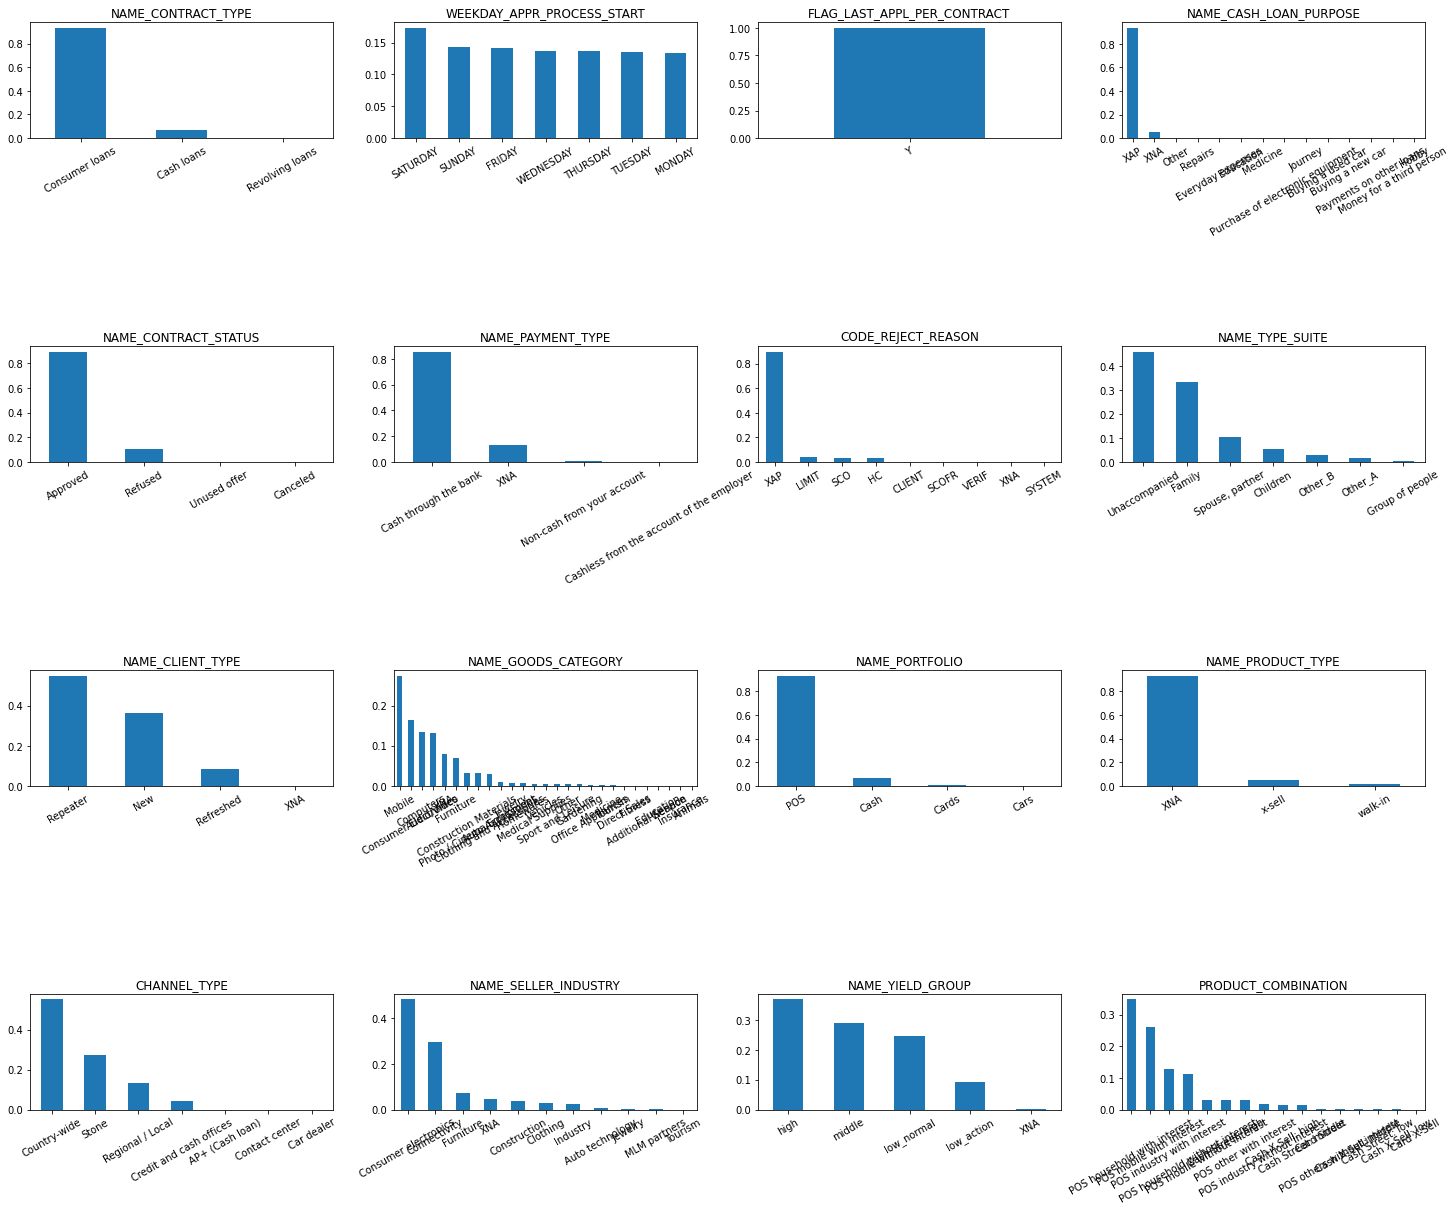

In [219]:
# Value distribution 

plt.figure(figsize=[25,20])

for i,col in enumerate(cat_cols):
  print(merged_data[col].value_counts(normalize=True)*100)
  print('-'*50)
  print()
  plt.subplot(4,4,i+1)
  merged_data[col].value_counts(normalize=True).plot.bar()
  plt.subplots_adjust(hspace=1.8, wspace=0.2)
  plt.xticks(rotation=30)
  plt.title(col)

plt.show()


#### Segmented analysis for Target=1 and 0

In [220]:
merged_data_0 = merged_data[merged_data.TARGET==0]
merged_data_1 = merged_data[merged_data.TARGET==1]

NAME_CONTRACT_TYPE
TARGET=0

Consumer loans     93.161795
Cash loans          6.538734
Revolving loans     0.299471
Name: NAME_CONTRACT_TYPE, dtype: float64
--------------------------------------------------
TARGET=1
Consumer loans     93.839368
Cash loans          5.410151
Revolving loans     0.750481
Name: NAME_CONTRACT_TYPE, dtype: float64



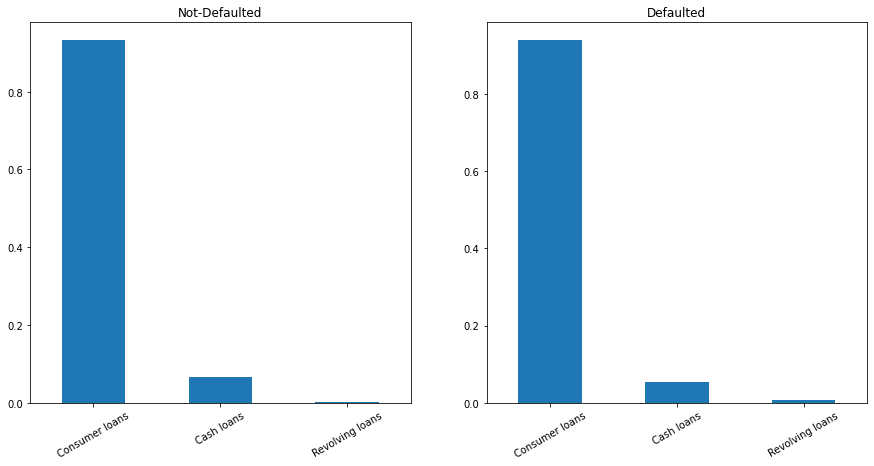

WEEKDAY_APPR_PROCESS_START
TARGET=0

SATURDAY     17.354490
SUNDAY       14.392348
FRIDAY       14.147843
WEDNESDAY    13.683819
THURSDAY     13.645394
TUESDAY      13.464471
MONDAY       13.311634
Name: WEEKDAY_APPR_PROCESS_START, dtype: float64
--------------------------------------------------
TARGET=1
SATURDAY     16.809516
FRIDAY       14.493269
THURSDAY     13.792959
WEDNESDAY    13.790869
SUNDAY       13.767874
MONDAY       13.715612
TUESDAY      13.629902
Name: WEEKDAY_APPR_PROCESS_START, dtype: float64



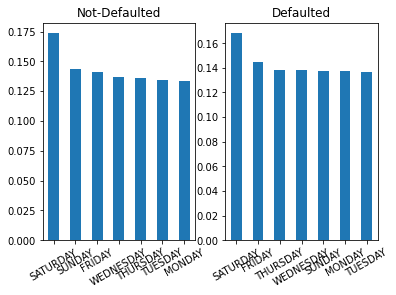

FLAG_LAST_APPL_PER_CONTRACT
TARGET=0

Y    100.0
Name: FLAG_LAST_APPL_PER_CONTRACT, dtype: float64
--------------------------------------------------
TARGET=1
Y    100.0
Name: FLAG_LAST_APPL_PER_CONTRACT, dtype: float64



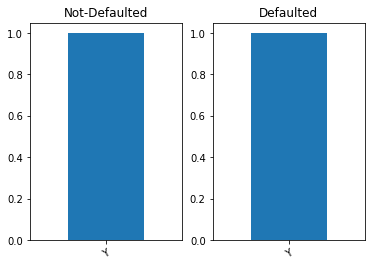

NAME_CASH_LOAN_PURPOSE
TARGET=0

XAP                                 93.461266
XNA                                  5.551928
Other                                0.342031
Repairs                              0.256739
Everyday expenses                    0.127852
Education                            0.072025
Medicine                             0.066338
Purchase of electronic equipment     0.039286
Journey                              0.035840
Buying a used car                    0.033255
Buying a new car                     0.006720
Payments on other loans              0.005686
Money for a third person             0.000862
Hobby                                0.000172
Name: NAME_CASH_LOAN_PURPOSE, dtype: float64
--------------------------------------------------
TARGET=1
XAP                                 94.589849
XNA                                  4.496613
Other                                0.351200
Repairs                              0.211138
Everyday expenses                 

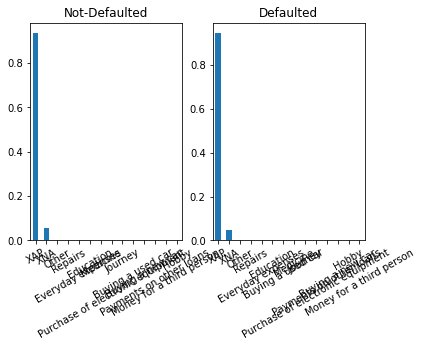

NAME_CONTRACT_STATUS
TARGET=0

Approved        89.753204
Refused         10.079658
Unused offer     0.120615
Canceled         0.046523
Name: NAME_CONTRACT_STATUS, dtype: float64
--------------------------------------------------
TARGET=1
Approved        86.441174
Refused         13.312150
Unused offer     0.171419
Canceled         0.075257
Name: NAME_CONTRACT_STATUS, dtype: float64



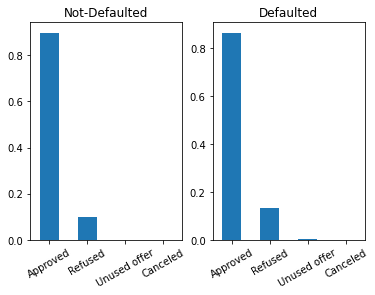

NAME_PAYMENT_TYPE
TARGET=0

Cash through the bank                        85.582840
XNA                                          13.417086
Non-cash from your account                    0.890659
Cashless from the account of the employer     0.109415
Name: NAME_PAYMENT_TYPE, dtype: float64
--------------------------------------------------
TARGET=1
Cash through the bank                        84.770884
XNA                                          14.202693
Non-cash from your account                    0.934443
Cashless from the account of the employer     0.091981
Name: NAME_PAYMENT_TYPE, dtype: float64



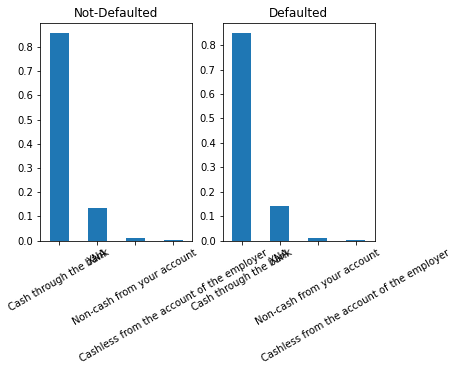

CODE_REJECT_REASON
TARGET=0

XAP       89.798348
LIMIT      3.661367
SCO        3.146512
HC         3.071041
CLIENT     0.120615
SCOFR      0.083052
VERIF      0.078745
XNA        0.039975
SYSTEM     0.000345
Name: CODE_REJECT_REASON, dtype: float64
--------------------------------------------------
TARGET=1
XAP       86.516431
LIMIT      5.671461
HC         4.047161
SCO        3.248599
SCOFR      0.229952
CLIENT     0.171419
VERIF      0.060624
XNA        0.052262
SYSTEM     0.002090
Name: CODE_REJECT_REASON, dtype: float64



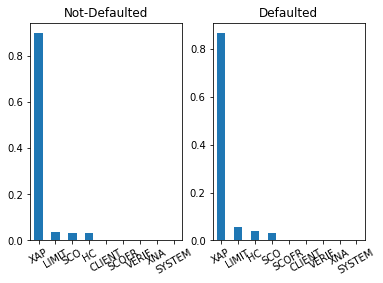

NAME_TYPE_SUITE
TARGET=0

Unaccompanied      45.955210
Family             33.344975
Spouse, partner    10.488955
Children            5.385982
Other_B             2.918830
Other_A             1.550863
Group of people     0.355185
Name: NAME_TYPE_SUITE, dtype: float64
--------------------------------------------------
TARGET=1
Unaccompanied      47.079628
Family             31.917496
Spouse, partner    10.921231
Children            4.508644
Other_B             3.374872
Other_A             1.788252
Group of people     0.409877
Name: NAME_TYPE_SUITE, dtype: float64



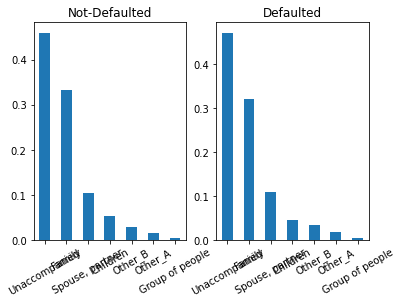

NAME_CLIENT_TYPE
TARGET=0

Repeater     55.249786
New          36.086926
Refreshed     8.606771
XNA           0.056517
Name: NAME_CLIENT_TYPE, dtype: float64
--------------------------------------------------
TARGET=1
Repeater     52.059119
New          41.077849
Refreshed     6.806589
XNA           0.056443
Name: NAME_CLIENT_TYPE, dtype: float64



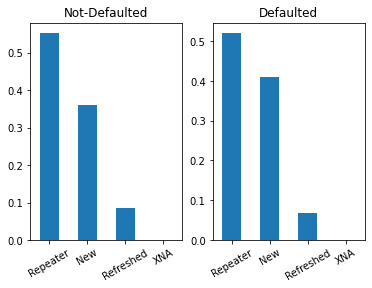

NAME_GOODS_CATEGORY
TARGET=0

Mobile                      27.183441
Consumer Electronics        16.413001
Computers                   13.321973
Audio/Video                 13.192397
XNA                          7.982673
Furniture                    7.121306
Construction Materials       3.312099
Photo / Cinema Equipment     3.189244
Clothing and Accessories     3.007115
Auto Accessories             0.932185
Jewelry                      0.794511
Homewares                    0.673551
Medical Supplies             0.523471
Vehicles                     0.396480
Sport and Leisure            0.388554
Other                        0.377354
Gardening                    0.360985
Office Appliances            0.308086
Medicine                     0.208665
Tourism                      0.185231
Direct Sales                 0.051348
Fitness                      0.027052
Additional Service           0.016714
Education                    0.013785
Weapon                       0.009822
Insurance           

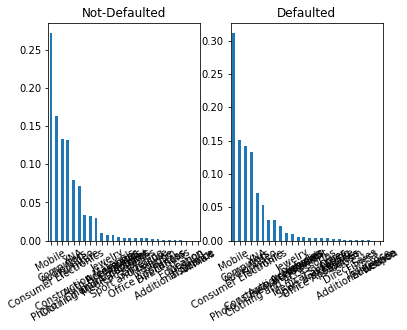

NAME_PORTFOLIO
TARGET=0

POS      93.159900
Cash      6.538734
Cards     0.299471
Cars      0.001895
Name: NAME_PORTFOLIO, dtype: float64
--------------------------------------------------
TARGET=1
POS      93.839368
Cash      5.410151
Cards     0.750481
Name: NAME_PORTFOLIO, dtype: float64



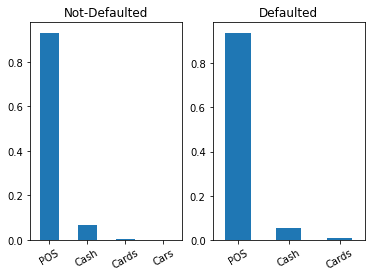

NAME_PRODUCT_TYPE
TARGET=0

XNA        93.161795
x-sell      4.970044
walk-in     1.868160
Name: NAME_PRODUCT_TYPE, dtype: float64
--------------------------------------------------
TARGET=1
XNA        93.839368
x-sell      3.873652
walk-in     2.286981
Name: NAME_PRODUCT_TYPE, dtype: float64



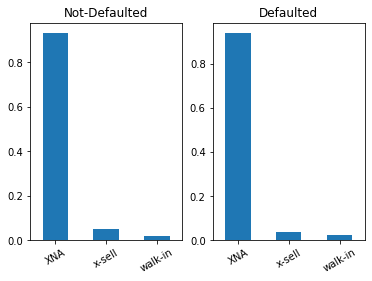

CHANNEL_TYPE
TARGET=0

Country-wide               54.923263
Stone                      27.330764
Regional / Local           13.199289
Credit and cash offices     4.532383
AP+ (Cash loan)             0.008788
Contact center              0.003618
Car dealer                  0.001895
Name: CHANNEL_TYPE, dtype: float64
--------------------------------------------------
TARGET=1
Country-wide               57.220503
Stone                      26.091228
Regional / Local           13.080107
Credit and cash offices     3.587256
AP+ (Cash loan)             0.018814
Contact center              0.002090
Name: CHANNEL_TYPE, dtype: float64



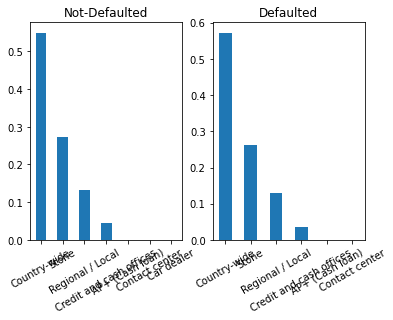

NAME_SELLER_INDUSTRY
TARGET=0

Consumer electronics    48.362473
Connectivity            29.326432
Furniture                7.286205
XNA                      4.660580
Construction             3.873822
Clothing                 2.982647
Industry                 2.456419
Auto technology          0.575852
Jewelry                  0.318080
MLM partners             0.109415
Tourism                  0.048074
Name: NAME_SELLER_INDUSTRY, dtype: float64
--------------------------------------------------
TARGET=1
Consumer electronics    47.244753
Connectivity            34.248265
Furniture                5.566937
XNA                      3.754495
Construction             3.319676
Industry                 2.316247
Clothing                 2.251442
Auto technology          0.821557
Jewelry                  0.382557
MLM partners             0.064805
Tourism                  0.029267
Name: NAME_SELLER_INDUSTRY, dtype: float64



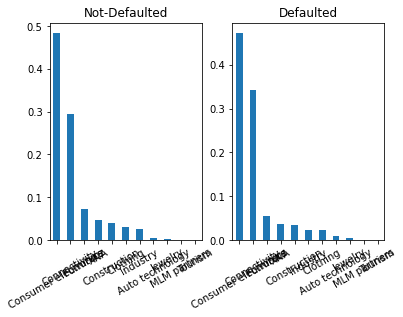

NAME_YIELD_GROUP
TARGET=0

high          36.533203
middle        29.013521
low_normal    24.713754
low_action     9.440052
XNA            0.299471
Name: NAME_YIELD_GROUP, dtype: float64
--------------------------------------------------
TARGET=1
high          40.333640
middle        28.779580
low_normal    22.031524
low_action     8.104775
XNA            0.750481
Name: NAME_YIELD_GROUP, dtype: float64



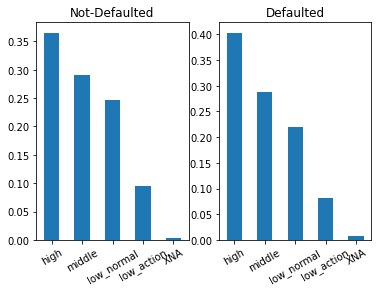

PRODUCT_COMBINATION
TARGET=0

POS household with interest       34.754298
POS mobile with interest          25.897336
POS industry with interest        12.907917
POS household without interest    11.473455
Cash Street: high                  3.198548
POS mobile without interest        3.154782
POS other with interest            2.951459
POS industry without interest      1.689994
Cash X-Sell: high                  1.454105
Cash Street: middle                1.421022
POS others without interest        0.332554
Cash X-Sell: middle                0.304123
Card Street                        0.297059
Cash Street: low                   0.111138
Cash X-Sell: low                   0.049797
Card X-Sell                        0.002412
Name: PRODUCT_COMBINATION, dtype: float64
--------------------------------------------------
TARGET=1
POS household with interest       35.433565
POS mobile with interest          30.169747
POS industry with interest        10.619617
POS household without interest  

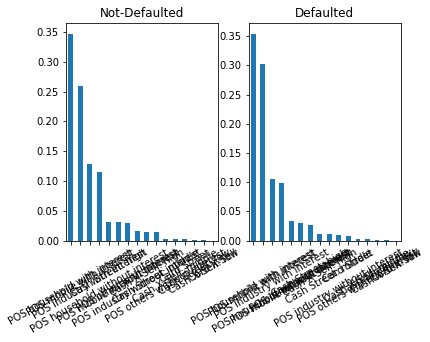

In [221]:
plt.figure(figsize=[15,7])

for i, col in enumerate(cat_cols):
  print(col)
  print('TARGET=0')
  print()
  print(merged_data_0[col].value_counts(normalize=True)*100)
  print('-'*50)
  print('TARGET=1')
  print(merged_data_1[col].value_counts(normalize=True)*100)
  print()

  plt.subplot(1,2,1)
  merged_data_0[col].value_counts(normalize=True).plot.bar()
  plt.title('Not-Defaulted')
  plt.xticks(rotation=30)
  plt.subplot(1,2,2)
  merged_data_1[col].value_counts(normalize=True).plot.bar()
  plt.title('Defaulted')
  plt.xticks(rotation=30)
  plt.show()
  print('='*50)


#### Rate of default within each category

NAME_CONTRACT_TYPE
Revolving loans    17.119695
Consumer loans      7.665995
Cash loans          6.384448
Name: TARGET, dtype: float64
--------------------------------------------------


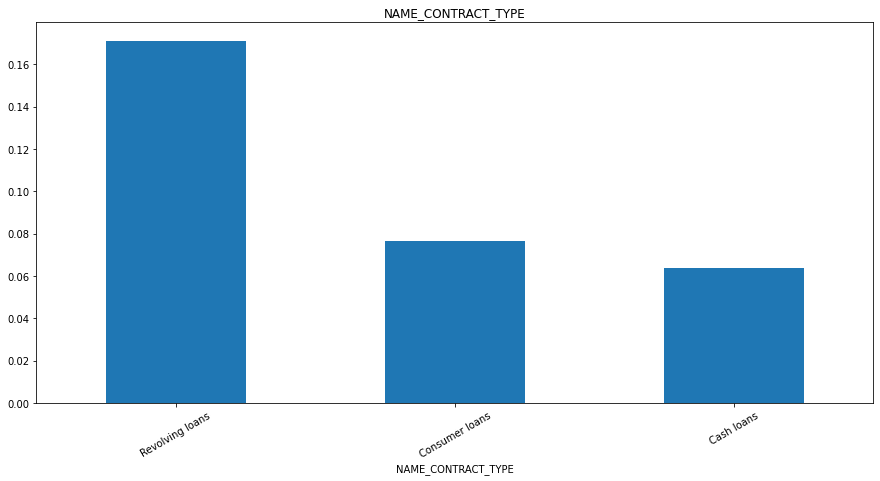

WEEKDAY_APPR_PROCESS_START
MONDAY       7.827861
FRIDAY       7.786301
TUESDAY      7.701212
THURSDAY     7.690873
WEDNESDAY    7.669860
SATURDAY     7.393411
SUNDAY       7.308601
Name: TARGET, dtype: float64
--------------------------------------------------


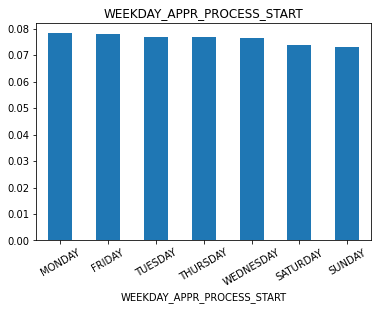

FLAG_LAST_APPL_PER_CONTRACT
Y    7.614857
Name: TARGET, dtype: float64
--------------------------------------------------


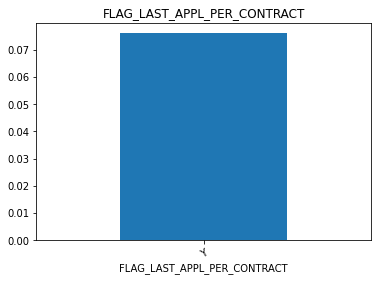

NAME_CASH_LOAN_PURPOSE
Hobby                               50.000000
Money for a third person            16.666667
Payments on other loans             15.384615
Buying a used car                   11.872146
Buying a new car                     9.302326
Journey                              8.370044
Education                            7.929515
Other                                7.803065
XAP                                  7.699730
Repairs                              6.348209
XNA                                  6.258001
Purchase of electronic equipment     5.785124
Everyday expenses                    5.236271
Medicine                             4.938272
Name: TARGET, dtype: float64
--------------------------------------------------


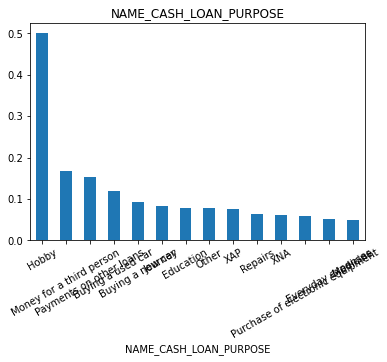

NAME_CONTRACT_STATUS
Canceled        11.764706
Unused offer    10.485934
Refused          9.817162
Approved         7.354524
Name: TARGET, dtype: float64
--------------------------------------------------


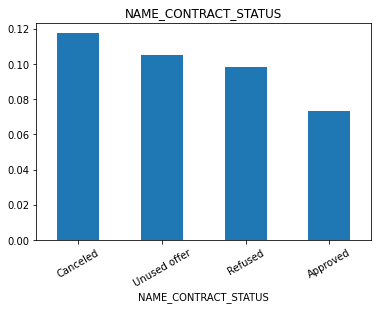

NAME_PAYMENT_TYPE
XNA                                          8.024947
Non-cash from your account                   7.959402
Cash through the bank                        7.548065
Cashless from the account of the employer    6.480118
Name: TARGET, dtype: float64
--------------------------------------------------


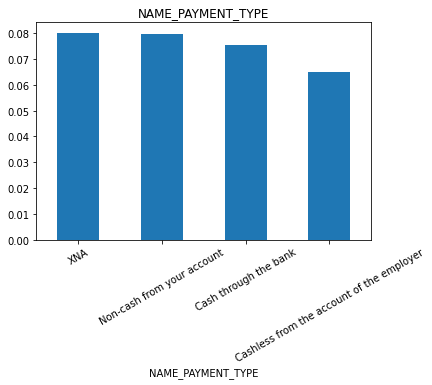

CODE_REJECT_REASON
SYSTEM    33.333333
SCOFR     18.581081
LIMIT     11.322093
CLIENT    10.485934
HC         9.798067
XNA        9.727626
SCO        7.842544
XAP        7.357027
VERIF      5.967078
Name: TARGET, dtype: float64
--------------------------------------------------


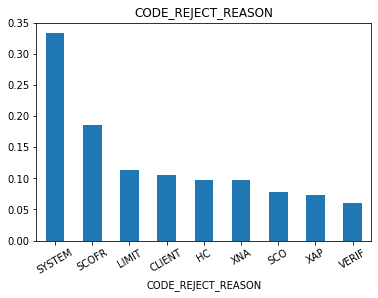

NAME_TYPE_SUITE
Other_B            8.298114
Group of people    8.283233
Other_A            8.277234
Spouse, partner    7.534778
Unaccompanied      7.422598
Family             6.969124
Children           6.148576
Name: TARGET, dtype: float64
--------------------------------------------------


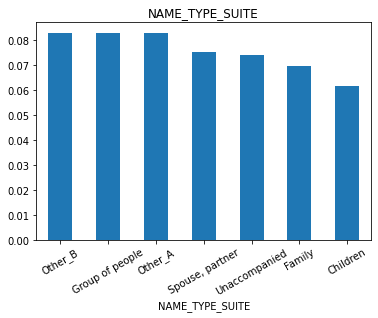

NAME_CLIENT_TYPE
New          8.577677
XNA          7.605634
Repeater     7.206793
Refreshed    6.119611
Name: TARGET, dtype: float64
--------------------------------------------------


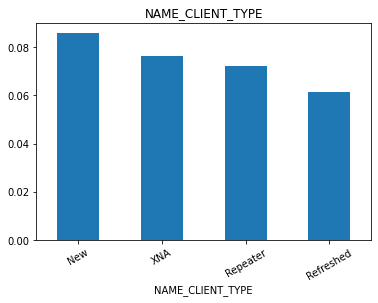

NAME_GOODS_CATEGORY
Insurance                   10.526316
Vehicles                    10.257410
Jewelry                      9.124951
Auto Accessories             9.029763
Mobile                       8.615336
Office Appliances            8.307692
Computers                    8.074335
Weapon                       8.064516
Direct Sales                 8.024691
Audio/Video                  7.698706
Photo / Cinema Equipment     7.455000
Sport and Leisure            7.354150
Consumer Electronics         7.066548
Construction Materials       6.978320
XNA                          6.885879
Additional Service           6.730769
Gardening                    6.723063
Homewares                    6.706444
Medicine                     6.196747
Education                    5.882353
Furniture                    5.860781
Clothing and Accessories     5.807427
Other                        5.765921
Medical Supplies             5.564190
Tourism                      4.444444
Fitness                      4

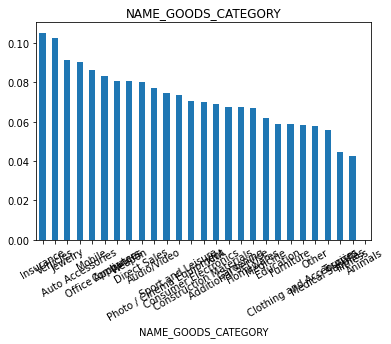

NAME_PORTFOLIO
Cards    17.119695
POS       7.666139
Cash      6.384448
Cars      0.000000
Name: TARGET, dtype: float64
--------------------------------------------------


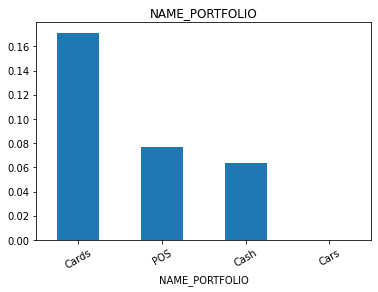

NAME_PRODUCT_TYPE
walk-in    9.165550
XNA        7.665995
x-sell     6.036420
Name: TARGET, dtype: float64
--------------------------------------------------


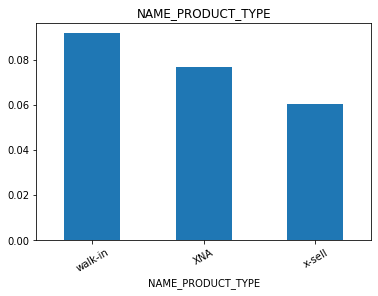

CHANNEL_TYPE
AP+ (Cash loan)            15.000000
Country-wide                7.908171
Regional / Local            7.551291
Stone                       7.294692
Credit and cash offices     6.124197
Contact center              4.545455
Car dealer                  0.000000
Name: TARGET, dtype: float64
--------------------------------------------------


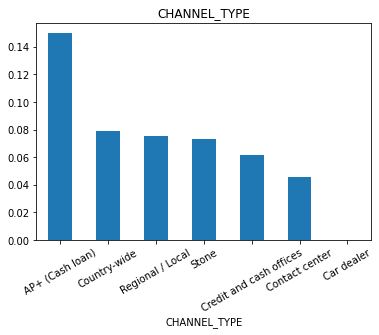

NAME_SELLER_INDUSTRY
Auto technology         10.522088
Jewelry                  9.019221
Connectivity             8.780637
Consumer electronics     7.451983
Industry                 7.211664
Construction             6.597424
XNA                      6.226598
Furniture                5.924492
Clothing                 5.857399
Tourism                  4.778157
MLM partners             4.654655
Name: TARGET, dtype: float64
--------------------------------------------------


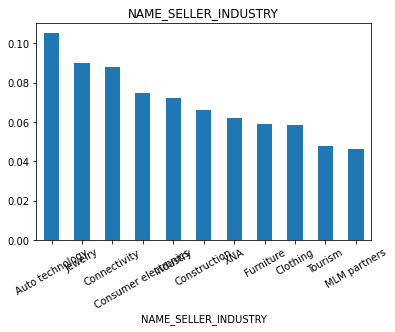

NAME_YIELD_GROUP
XNA           17.119695
high           8.340935
middle         7.558098
low_normal     6.844973
low_action     6.608936
Name: TARGET, dtype: float64
--------------------------------------------------


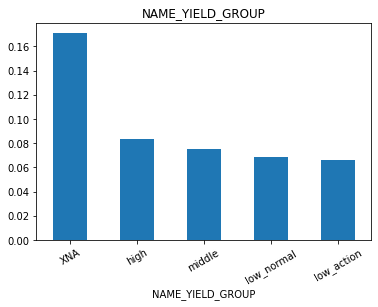

PRODUCT_COMBINATION
Card Street                       17.195005
POS mobile with interest           8.761056
POS other with interest            7.953141
POS mobile without interest        7.888514
POS household with interest        7.752151
POS others without interest        7.256127
Card X-Sell                        6.666667
POS household without interest     6.649376
Cash Street: middle                6.475391
Cash Street: high                  6.417625
Cash X-Sell: high                  6.410114
POS industry with interest         6.350635
Cash X-Sell: middle                6.017039
Cash Street: low                   5.976676
POS industry without interest      4.711940
Cash X-Sell: low                   3.986711
Name: TARGET, dtype: float64
--------------------------------------------------


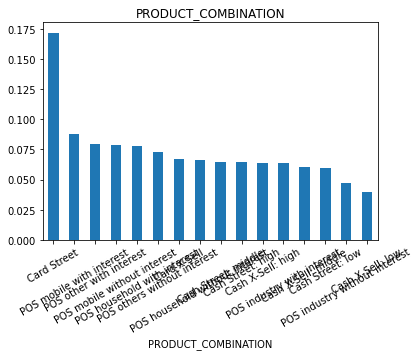

In [222]:
plt.figure(figsize=[15,7])

for i, col in enumerate(cat_cols):

  print(merged_data.groupby([col]).TARGET.mean().sort_values(ascending=False)*100)
  print('-'*50)

  merged_data.groupby([col]).TARGET.mean().sort_values(ascending=False).plot.bar()
  plt.xticks(rotation=30)
  plt.title(col)       
  plt.show()
  print('='*50)


####  Observations


1. NAME_CONTRACT_TYPE
  * Majority of previous loans are consumer loans
  * Similar trend in both segments of TARGET
  * Default rate is highest for Revolving Loans> consumer loans> Cash loans

3. NAME_CLIENT_TYPE
  * Repeater is the most common client type and Refreshed is the least common
  * New Client type are slightly more in the defaulter group
  * Slight difference in default rates. New clients have the highest and Refreshed clients have the lowest

4. NAME_PORTFOLIO
  * Most of the Loan Portfolios are POS for previous loans(>80%)
  * Similar trend in both segments of TARGET
  * Card portfolio has a higher rate of defaulters than other portfolios(17%)

5. NAME_CONTRACT_STATUS
  * 89% of the applications were approved, while 10% were refused. A very small portion of them were cencelled or unused
  * The ratio of approved applicants for previous loans who have defaulted is slightly less than the ones who have not defaulted
  * Applicants whose Previous loan was cancelled have the highest rate of defaulters(11%) but their count is very low so cannot infer anything here. 
  * Approved applicants have the lowest rate of defaulters(7.35%)


